In [1]:
from utils_legacy import *
from teacher_model import *

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
import scipy
from tqdm import tqdm_notebook, tqdm
%matplotlib inline

In [3]:
particle_type = 'pion'

# data_train, data_val, scaler = get_merged_typed_dataset(particle_type, dtype=np.float32, log=True)

# torch.save(data_train, f"data/data_train_{particle_type}.pt")
# torch.save(data_val, f"data/data_val_{particle_type}.pt")
# torch.save(scaler, f"data/scaler_{particle_type}.pt")

data_train, data_val, scaler = (
    torch.load(f"data/data_train_{particle_type}.pt")
    , torch.load(f"data/data_val_{particle_type}.pt")
    , torch.load(f"data/scaler_{particle_type}.pt")
)

In [4]:
from data import *

train_dataset = RichDataset(data_train.values)
val_dataset = SingleDataset(data_val.values)

In [5]:
from torch.utils.data import DataLoader

noise_size = 64

coll_train = collate_fn_rich(noise_size)
coll_val = collate_fn_single(noise_size)

train_loader = DataLoader(train_dataset, batch_size=4096, collate_fn=coll_train)
val_loader = DataLoader(val_dataset, batch_size=8192, collate_fn=coll_val)

In [6]:
from teacher_trainer import *

teacher_trainer = TeacherTrainer(
    train_loader
    , val_loader
    , noise_size=noise_size
    , hidden_size=128
    , num_layers=5
    , cramer_size=256
    , lam=10
    , epochs=100
    , critic_boost=1
    , lr=1e-3
)

  0%|          | 1/489 [00:00<01:32,  5.26it/s]

(epoch 1)


100%|██████████| 123/123 [00:11<00:00, 10.82it/s]


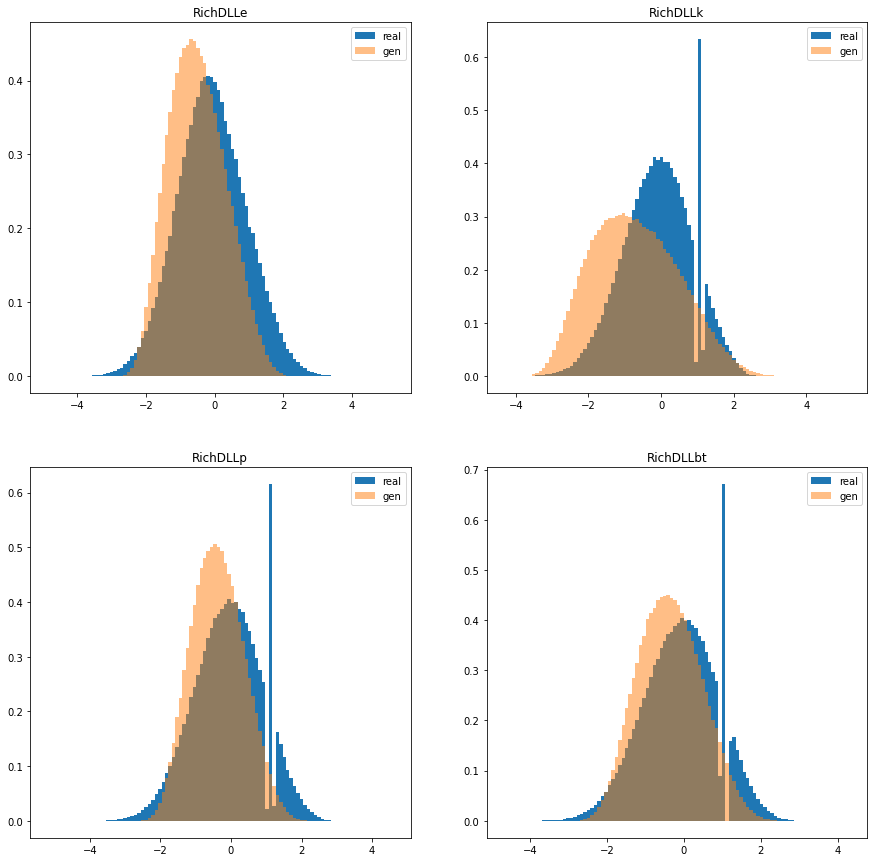

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 2)


100%|██████████| 123/123 [00:11<00:00, 10.72it/s]


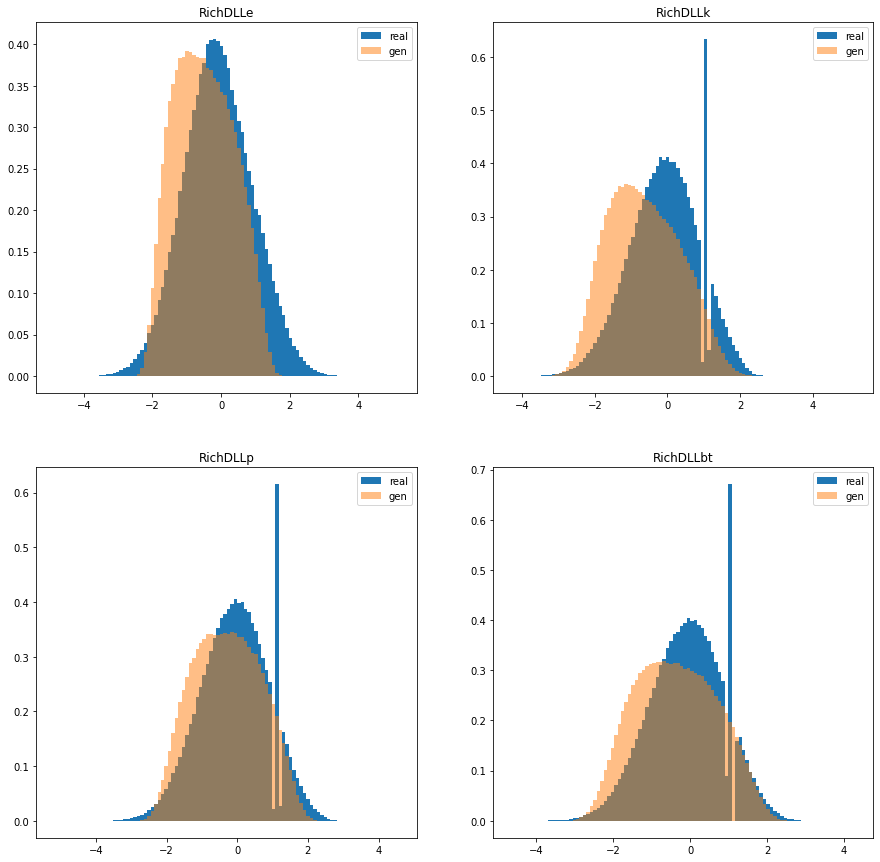

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 3)


100%|██████████| 123/123 [00:11<00:00, 10.70it/s]


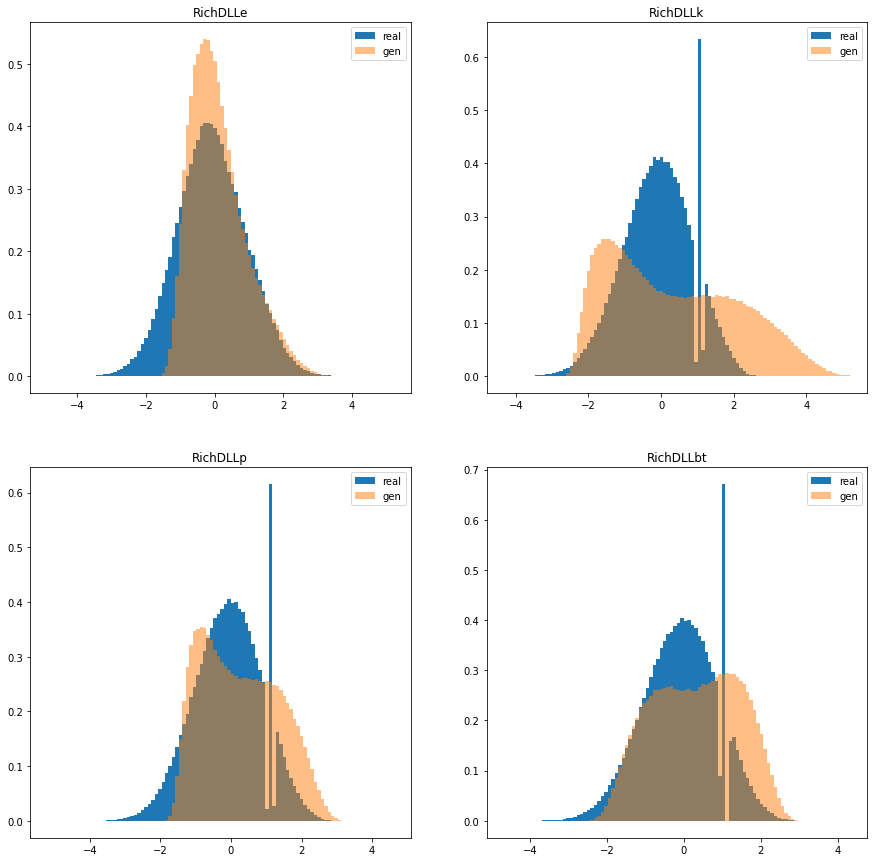

  0%|          | 1/489 [00:00<01:21,  6.01it/s]

(epoch 4)


100%|██████████| 123/123 [00:11<00:00, 10.77it/s]


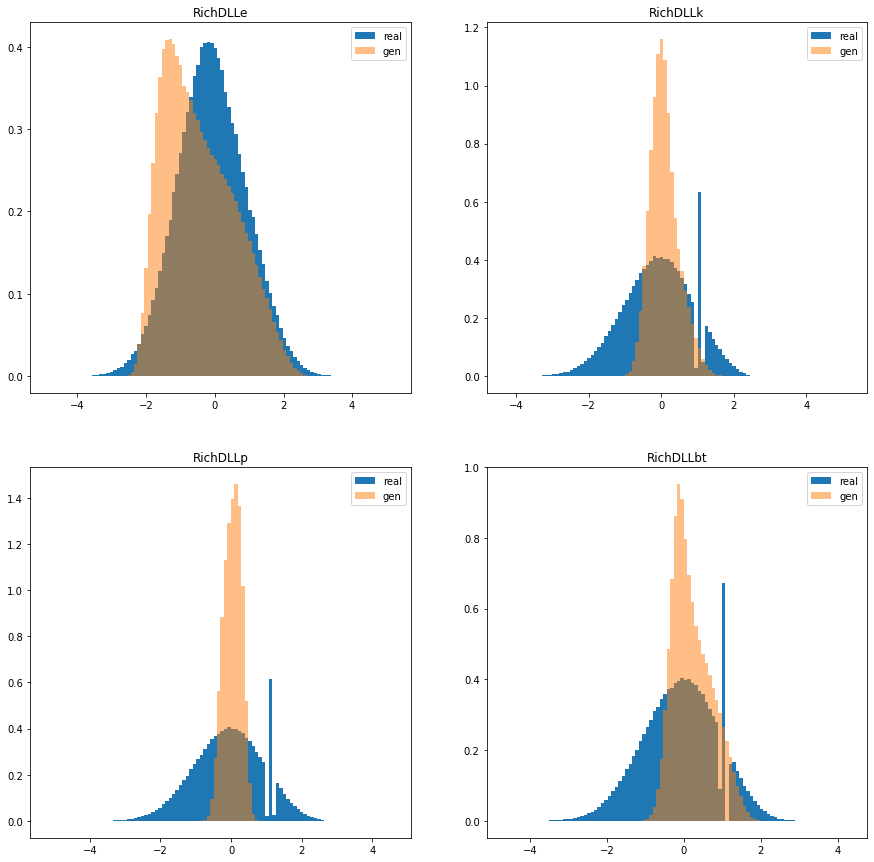

  0%|          | 1/489 [00:00<01:20,  6.09it/s]

(epoch 5)


100%|██████████| 123/123 [00:11<00:00, 10.83it/s]


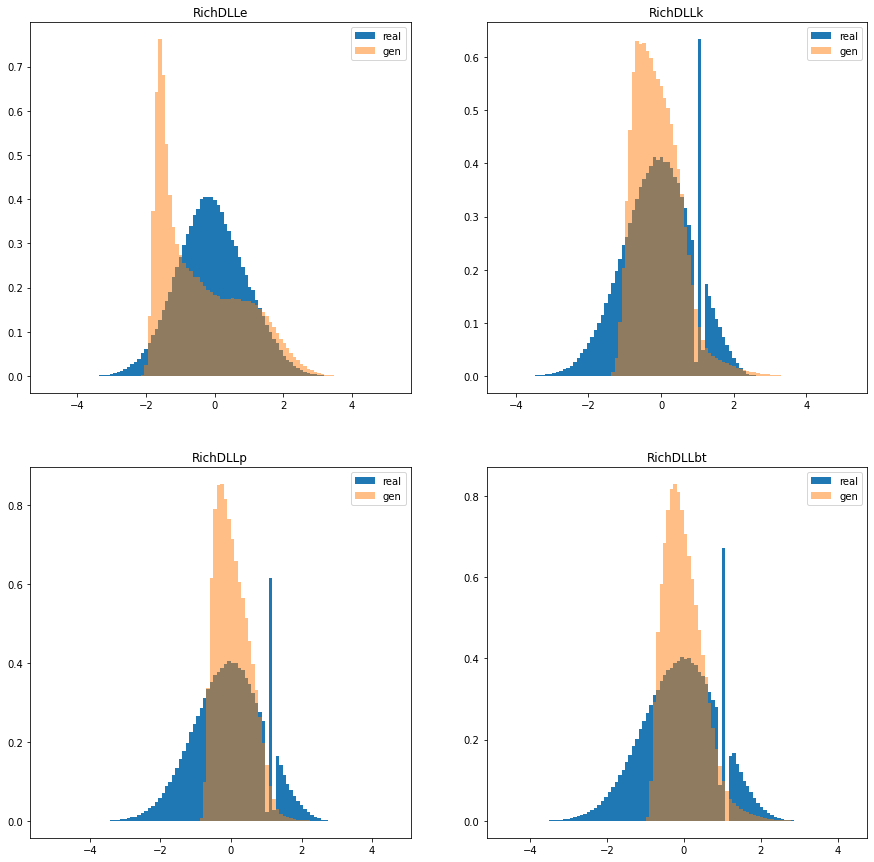

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 6)


100%|██████████| 123/123 [00:11<00:00, 10.77it/s]


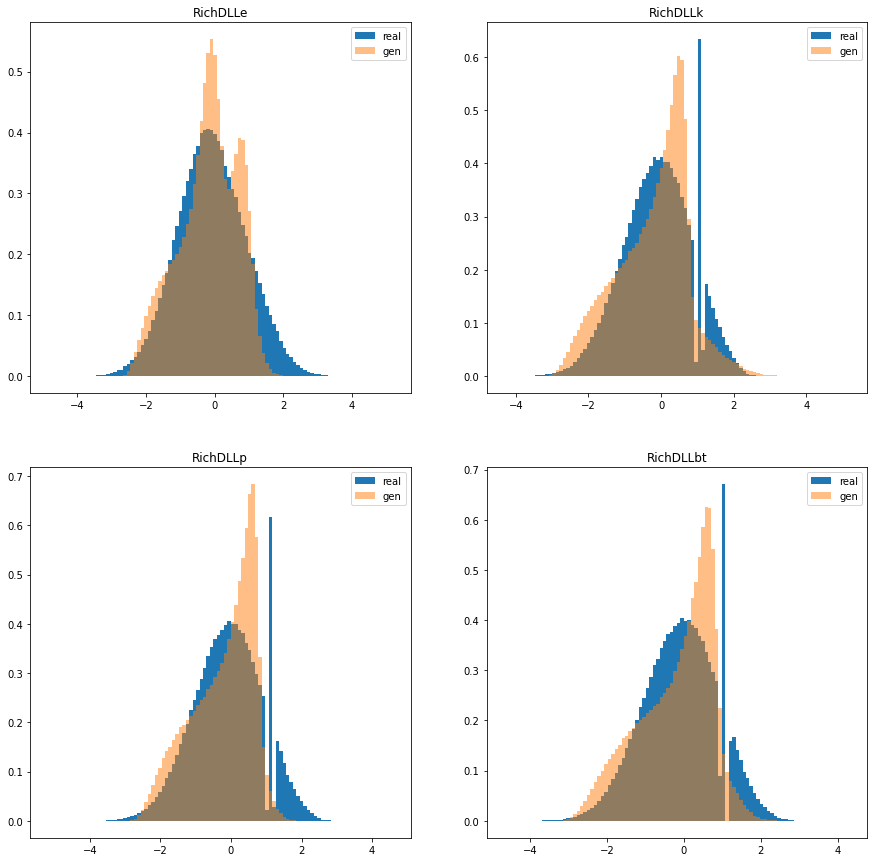

  0%|          | 1/489 [00:00<01:22,  5.93it/s]

(epoch 7)


100%|██████████| 123/123 [00:11<00:00, 10.74it/s]


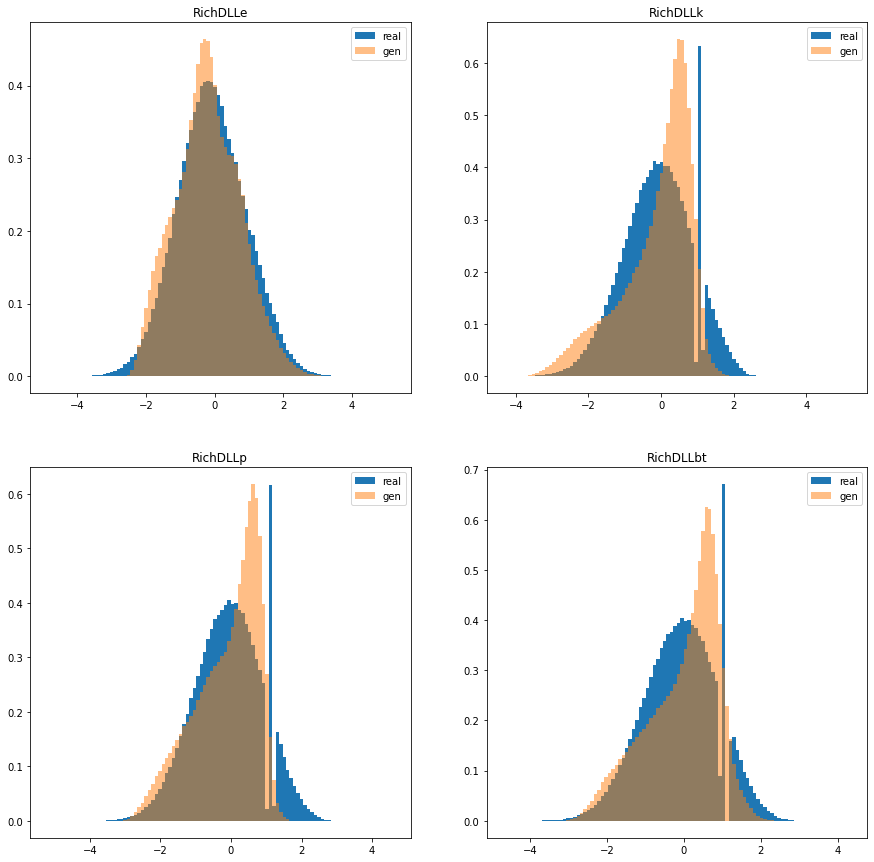

  0%|          | 1/489 [00:00<01:22,  5.93it/s]

(epoch 8)


100%|██████████| 123/123 [00:11<00:00, 10.72it/s]


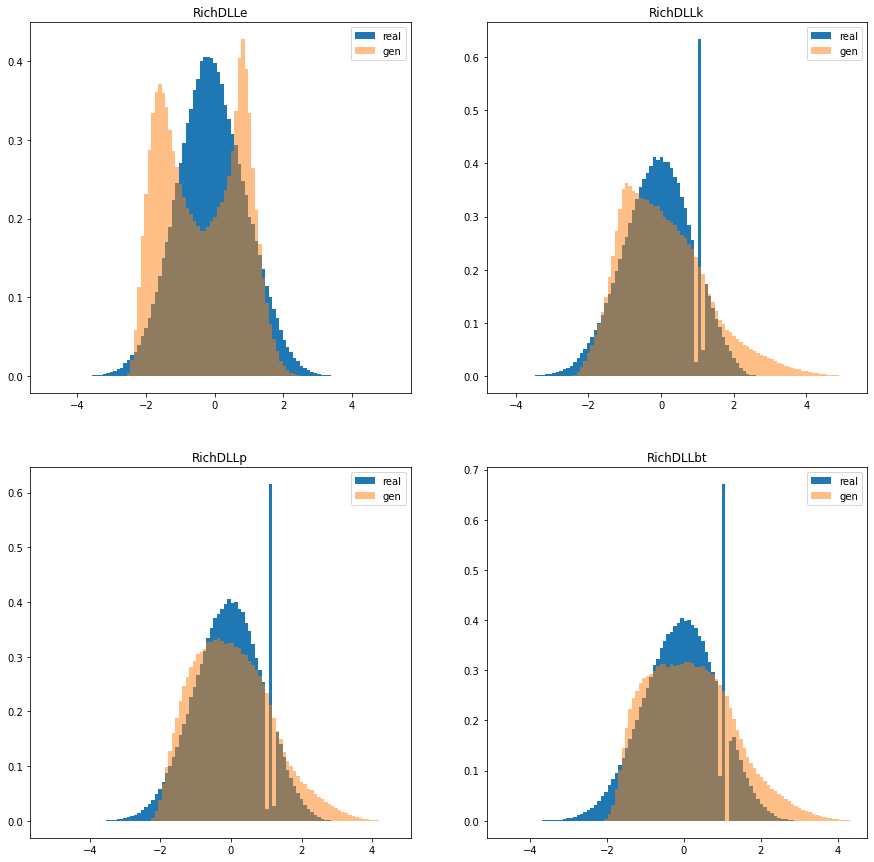

  0%|          | 1/489 [00:00<01:20,  6.04it/s]

(epoch 9)


100%|██████████| 123/123 [00:11<00:00, 10.76it/s]


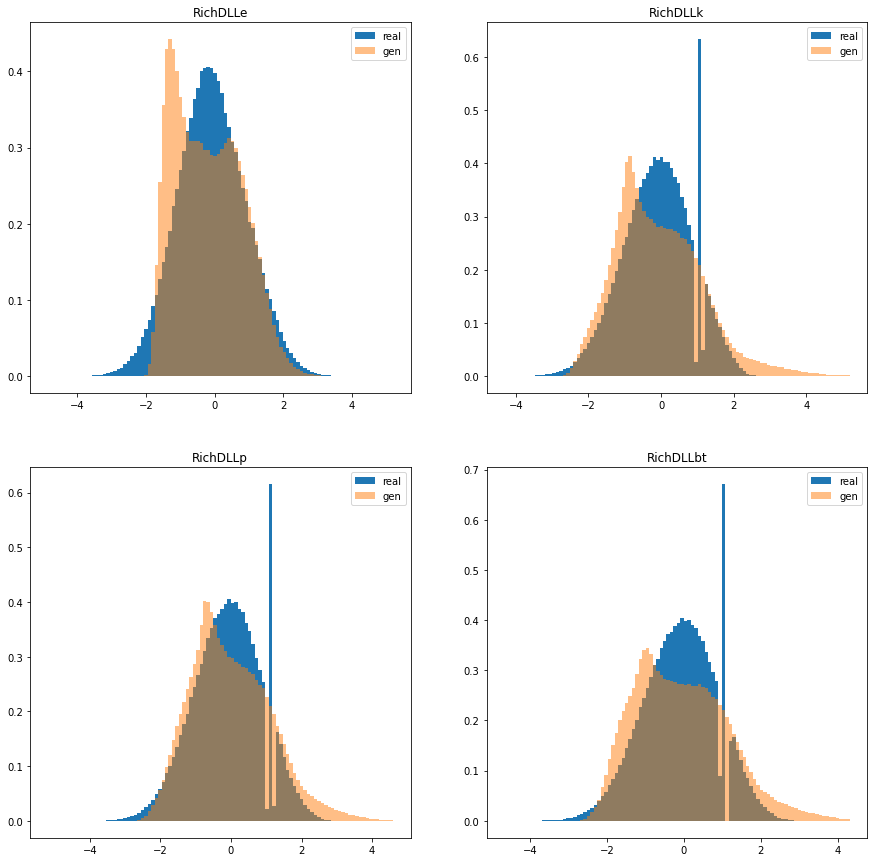

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 10)


100%|██████████| 123/123 [00:11<00:00, 10.75it/s]


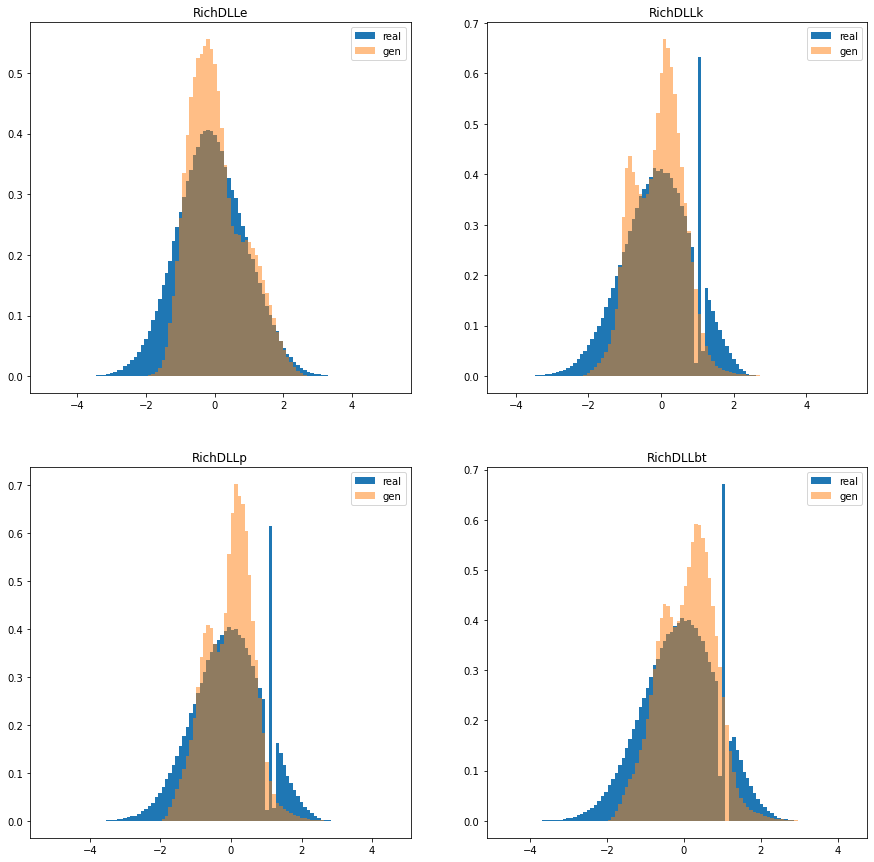

  0%|          | 1/489 [00:00<01:21,  6.01it/s]

(epoch 11)


100%|██████████| 123/123 [00:11<00:00, 10.79it/s]


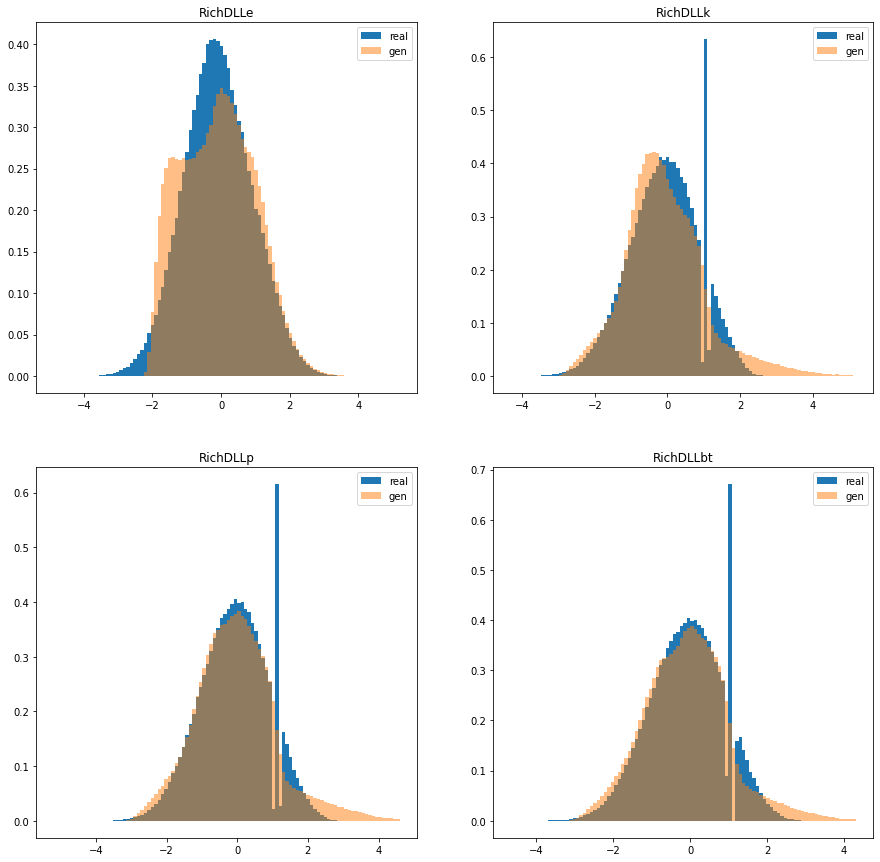

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 12)


100%|██████████| 123/123 [00:11<00:00, 10.73it/s]


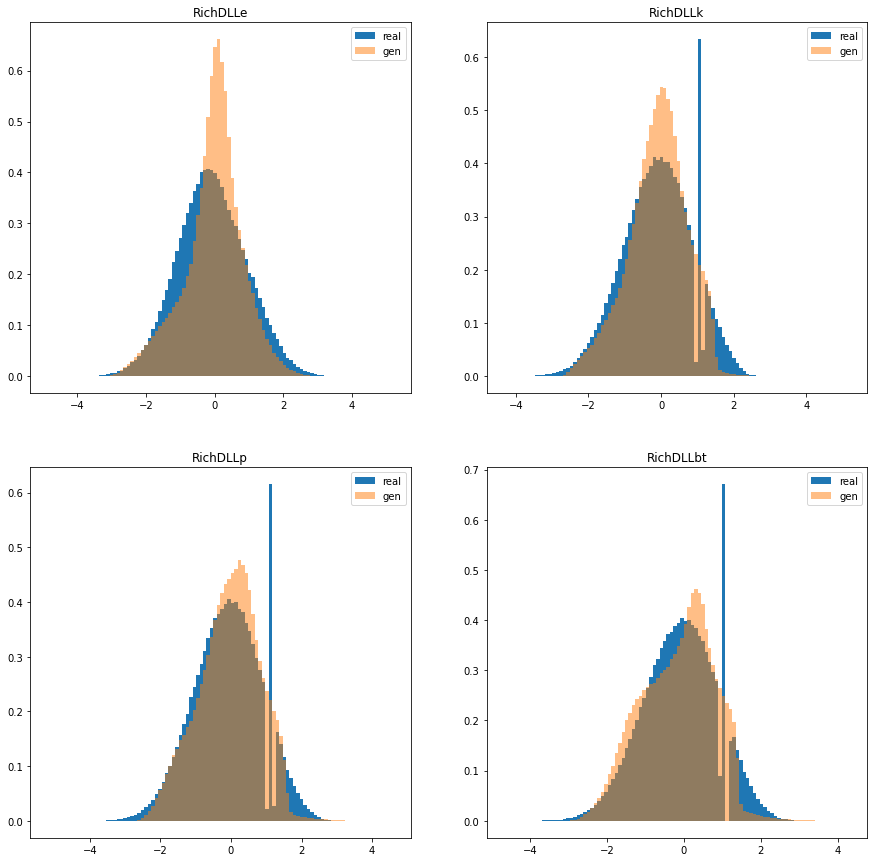

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 13)


100%|██████████| 123/123 [00:11<00:00, 10.81it/s]


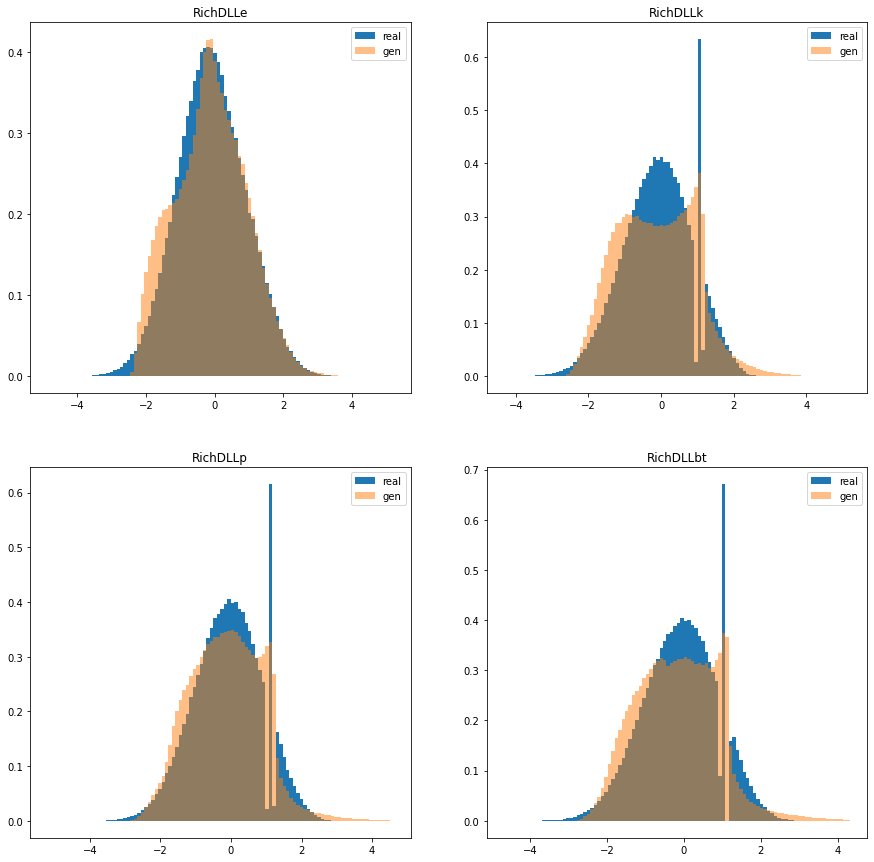

  0%|          | 1/489 [00:00<01:20,  6.03it/s]

(epoch 14)


100%|██████████| 123/123 [00:11<00:00, 10.73it/s]


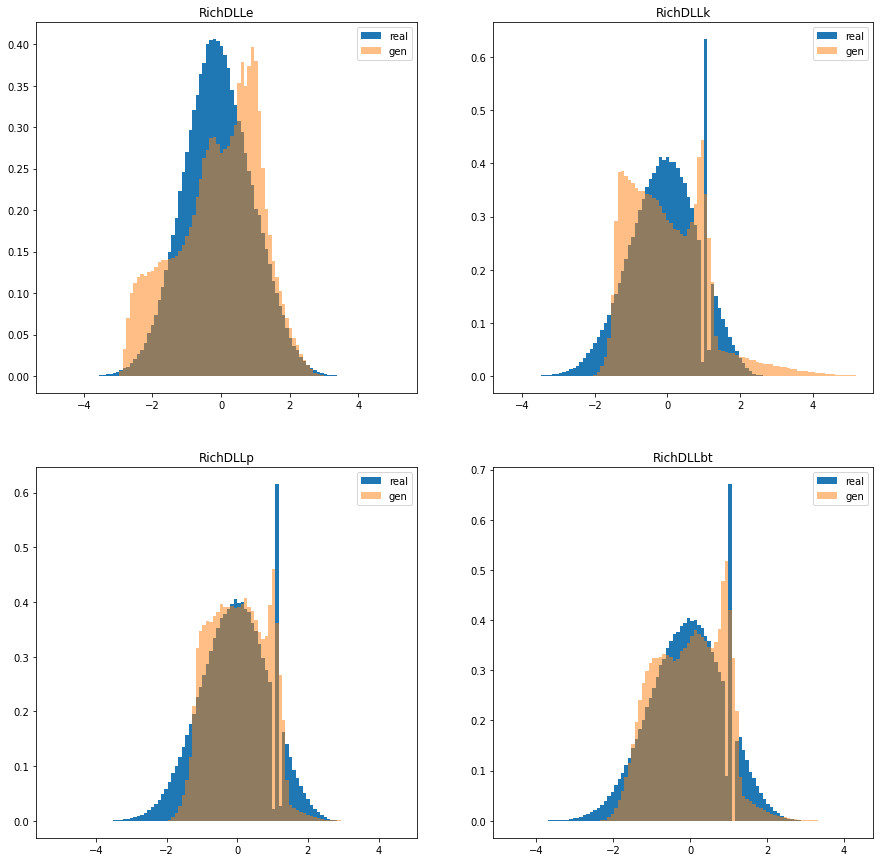

  0%|          | 1/489 [00:00<01:20,  6.03it/s]

(epoch 15)


100%|██████████| 123/123 [00:11<00:00, 10.83it/s]


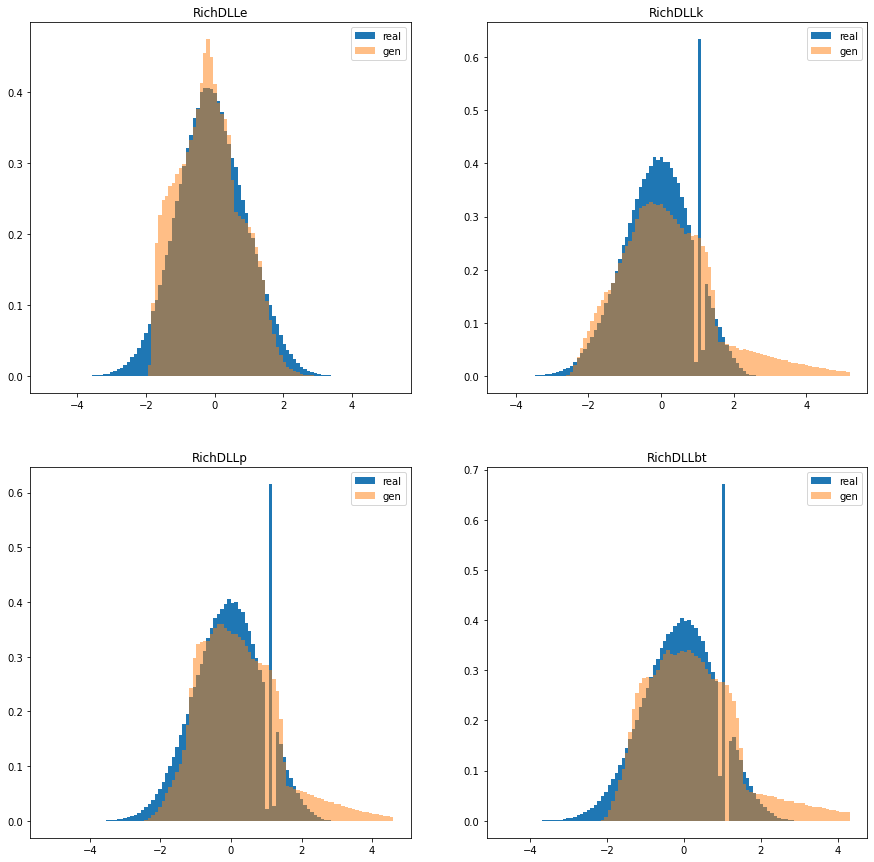

  0%|          | 1/489 [00:00<01:19,  6.16it/s]

(epoch 16)


100%|██████████| 123/123 [00:11<00:00, 10.76it/s]


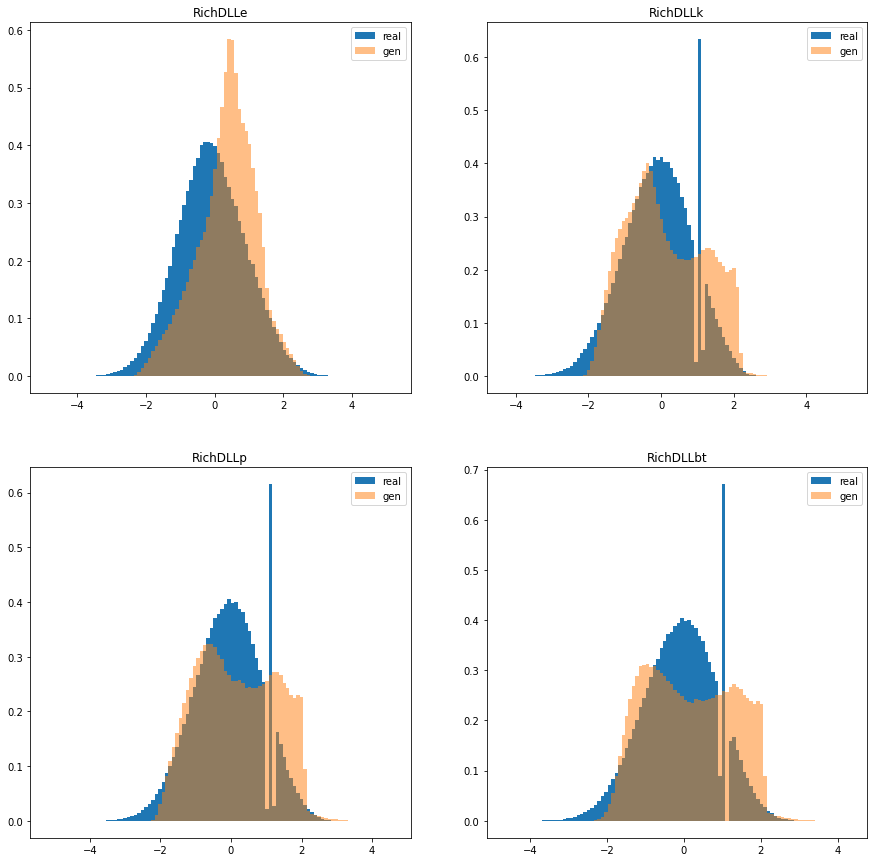

  0%|          | 1/489 [00:00<01:19,  6.10it/s]

(epoch 17)


100%|██████████| 123/123 [00:11<00:00, 10.81it/s]


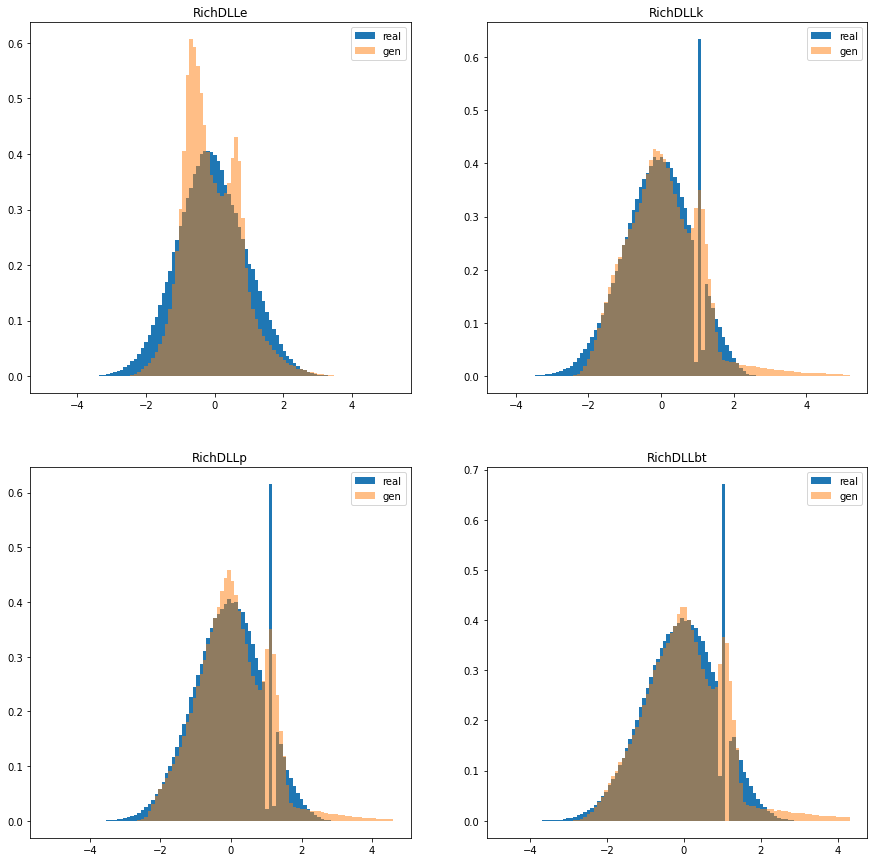

  0%|          | 1/489 [00:00<01:20,  6.09it/s]

(epoch 18)


100%|██████████| 123/123 [00:11<00:00, 10.75it/s]


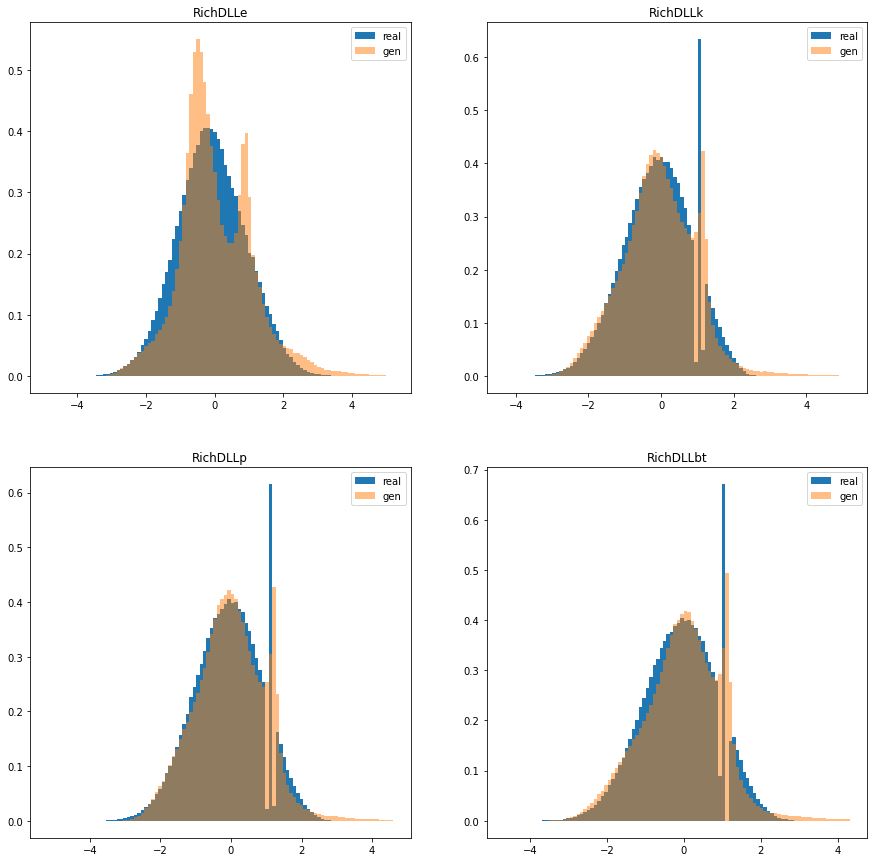

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 19)


100%|██████████| 123/123 [00:11<00:00, 10.77it/s]


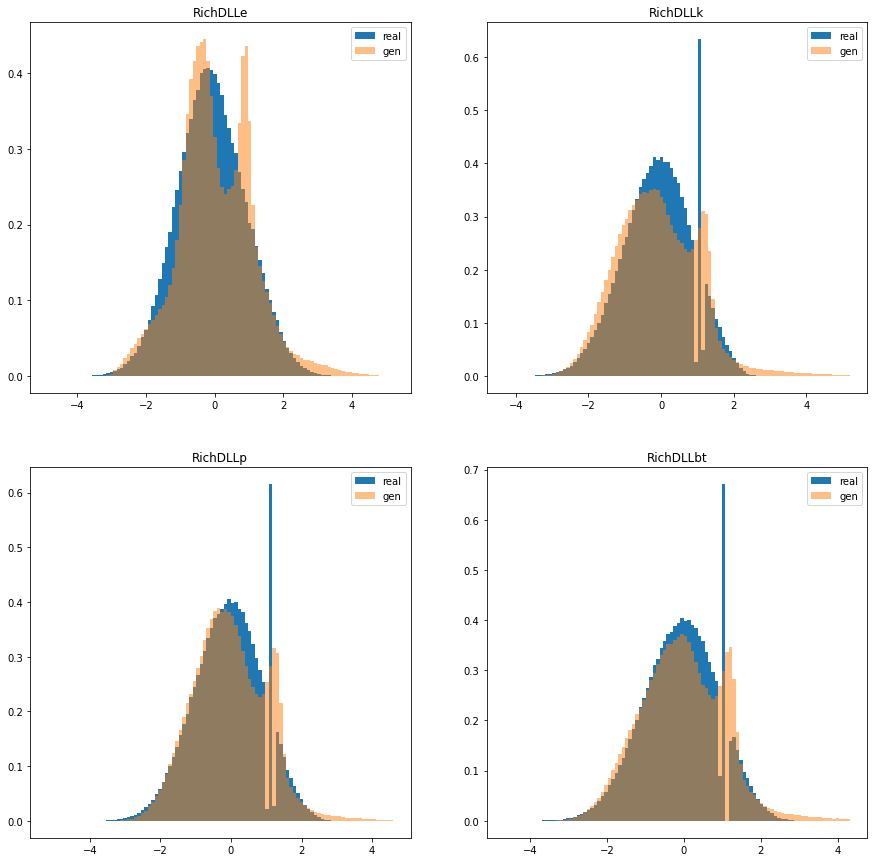

  0%|          | 1/489 [00:00<01:20,  6.09it/s]

(epoch 20)


100%|██████████| 123/123 [00:11<00:00, 10.87it/s]


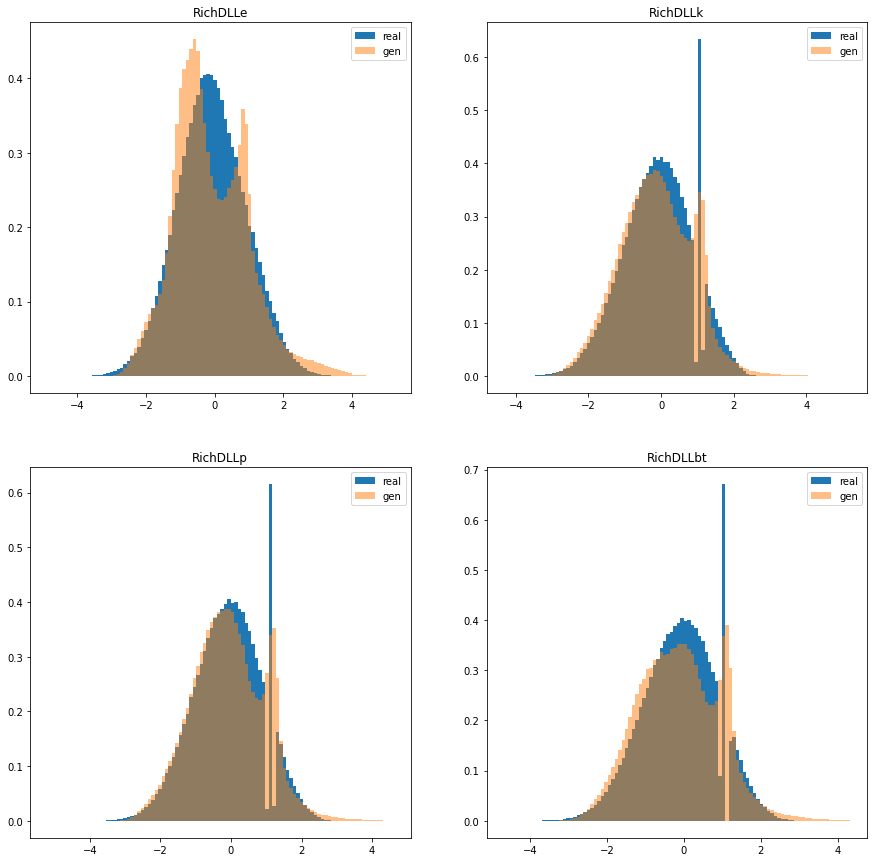

  0%|          | 1/489 [00:00<01:19,  6.15it/s]

(epoch 21)


100%|██████████| 123/123 [00:11<00:00, 10.79it/s]


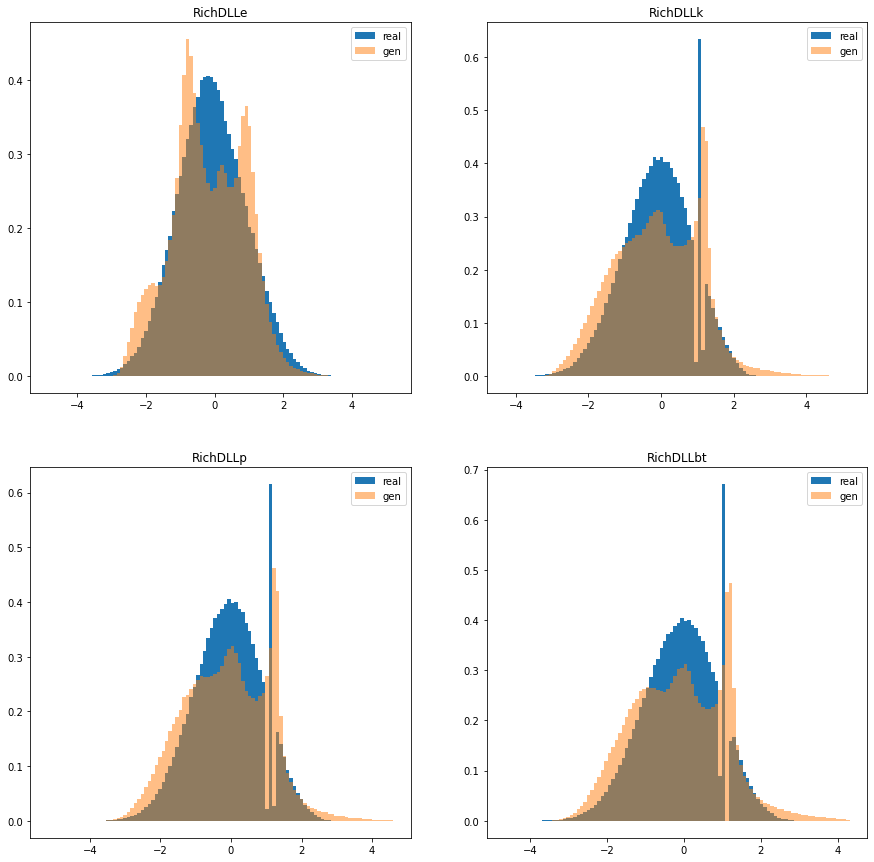

  0%|          | 1/489 [00:00<01:20,  6.07it/s]

(epoch 22)


100%|██████████| 123/123 [00:11<00:00, 10.30it/s]


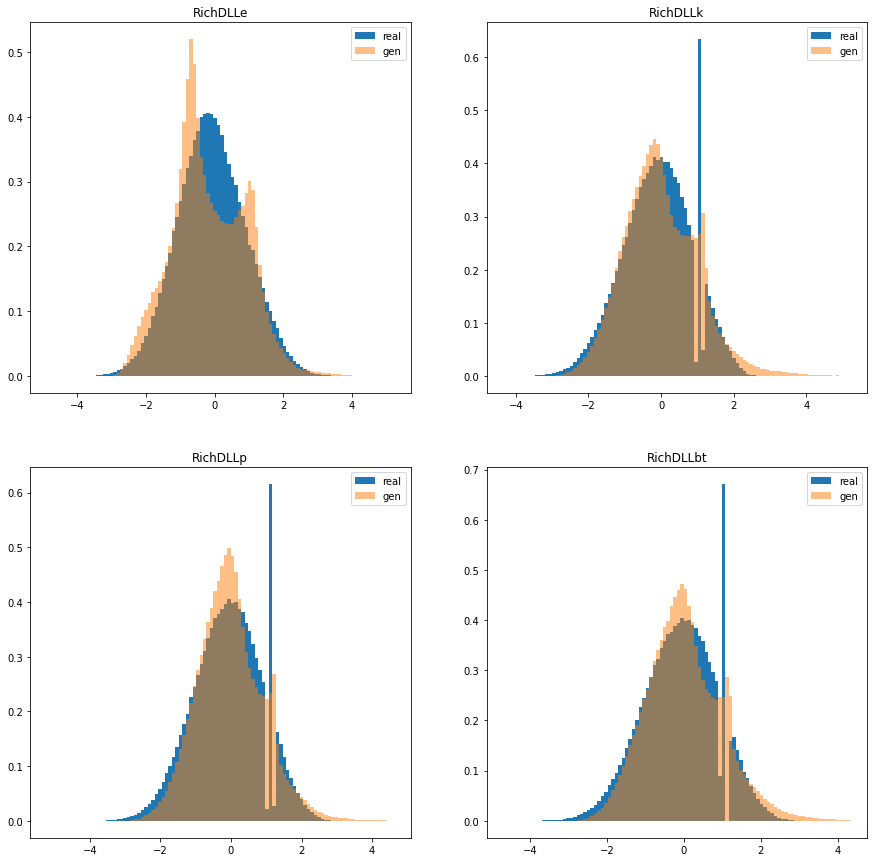

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 23)


100%|██████████| 123/123 [00:11<00:00, 10.44it/s]


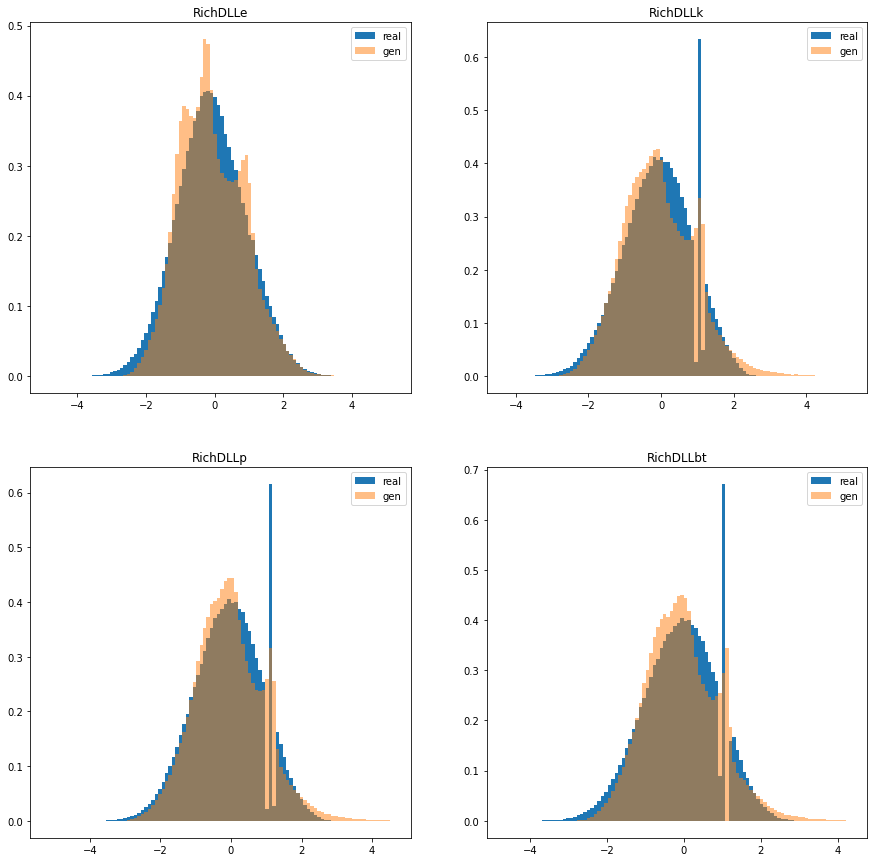

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 24)


100%|██████████| 123/123 [00:11<00:00, 10.96it/s]


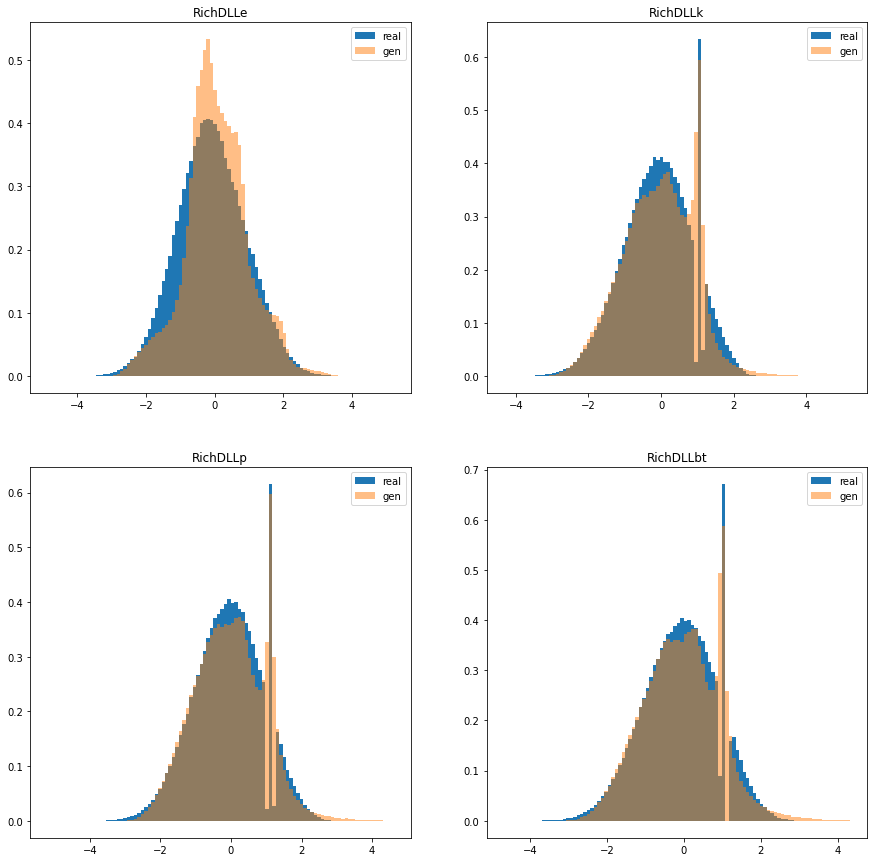

  0%|          | 1/489 [00:00<01:22,  5.95it/s]

(epoch 25)


100%|██████████| 123/123 [00:11<00:00, 10.31it/s]


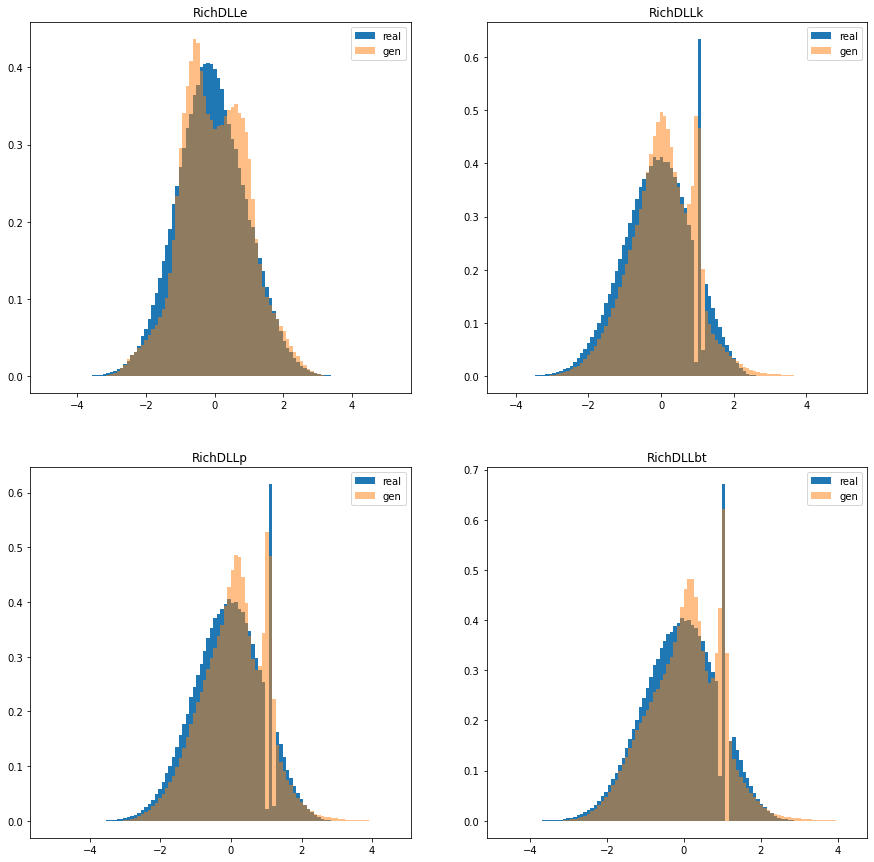

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 26)


100%|██████████| 123/123 [00:11<00:00, 10.95it/s]


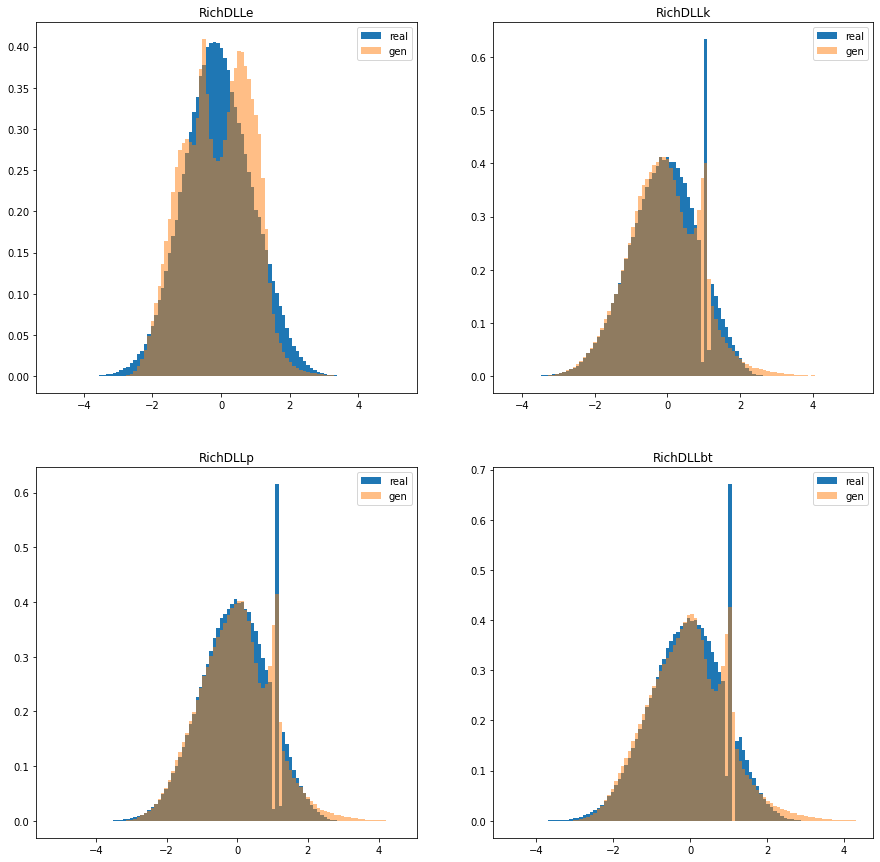

  0%|          | 1/489 [00:00<01:19,  6.13it/s]

(epoch 27)


100%|██████████| 123/123 [00:11<00:00, 10.92it/s]


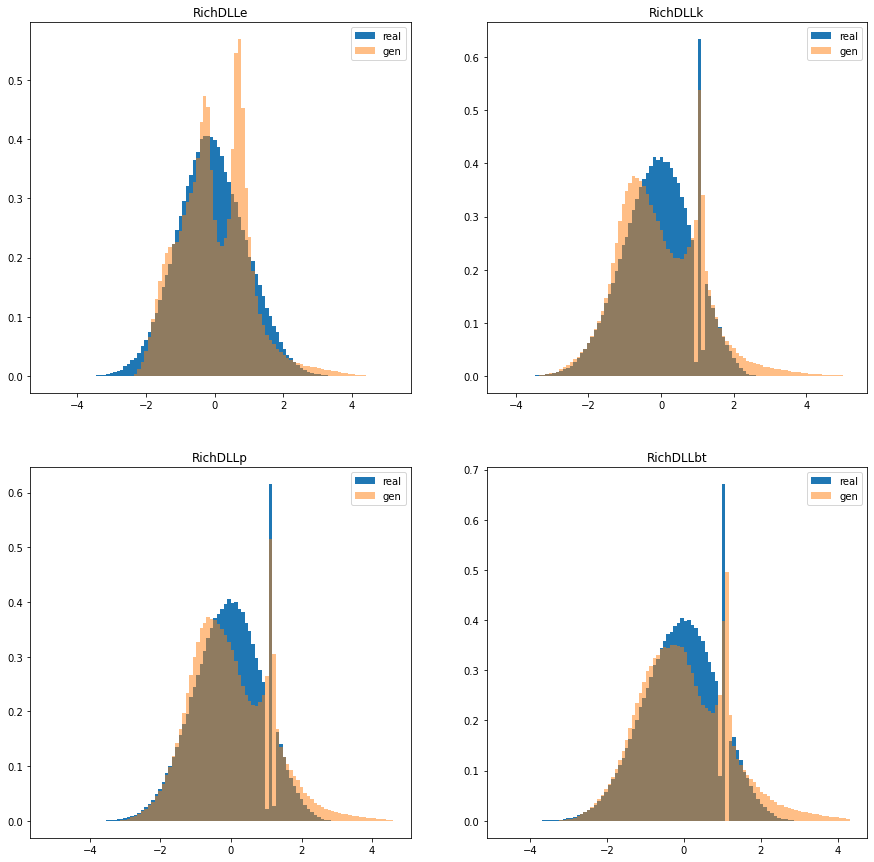

  0%|          | 1/489 [00:00<01:19,  6.13it/s]

(epoch 28)


100%|██████████| 123/123 [00:12<00:00, 10.17it/s]


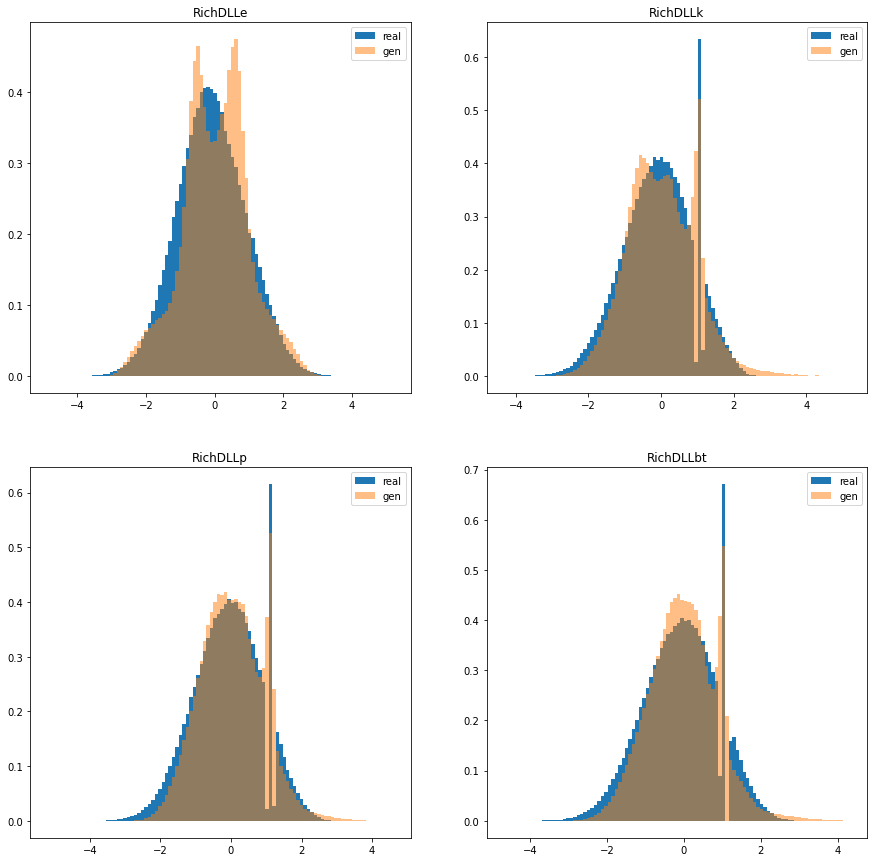

  0%|          | 1/489 [00:00<01:21,  6.00it/s]

(epoch 29)


100%|██████████| 123/123 [00:11<00:00, 10.45it/s]


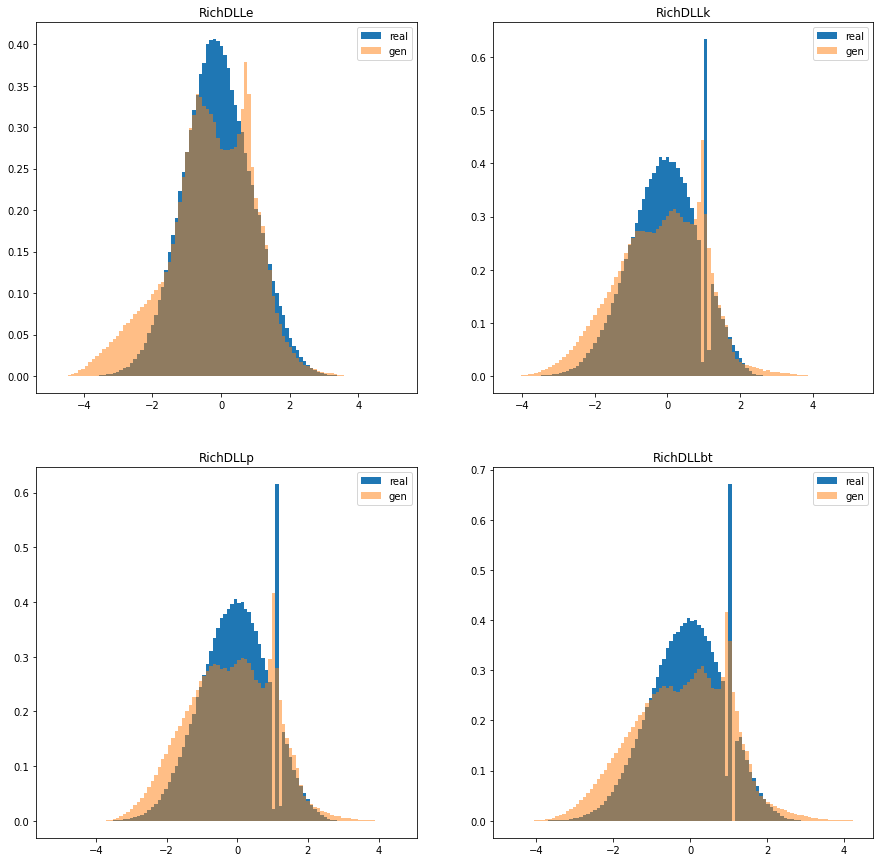

  0%|          | 1/489 [00:00<01:18,  6.18it/s]

(epoch 30)


100%|██████████| 123/123 [00:12<00:00, 10.07it/s]


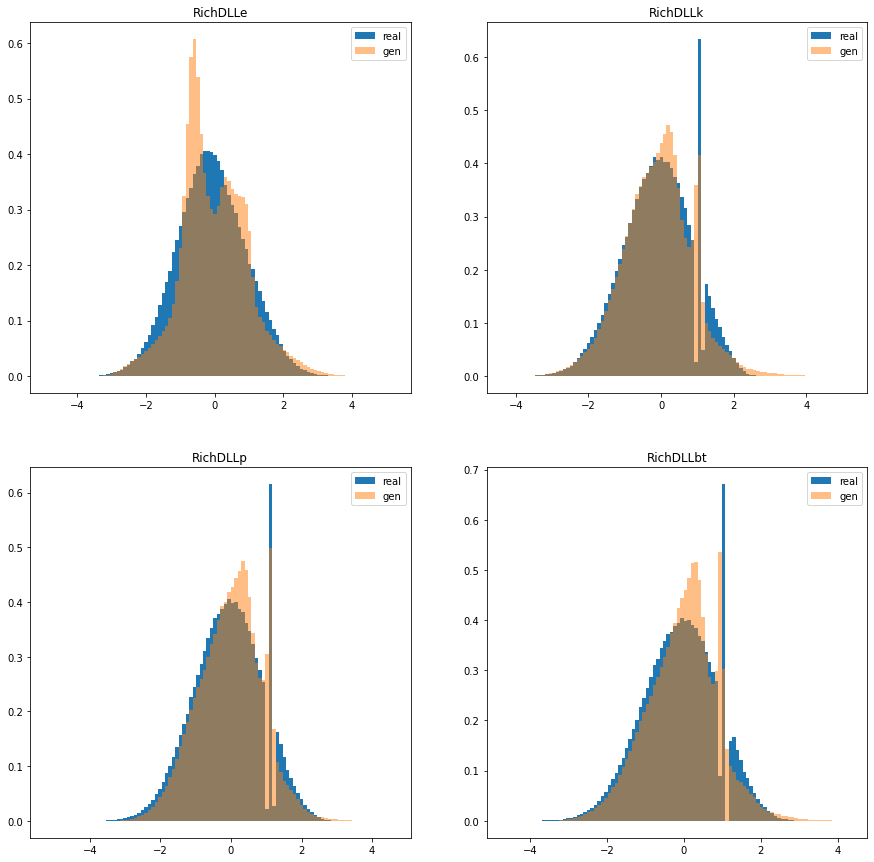

  0%|          | 1/489 [00:00<01:29,  5.47it/s]

(epoch 31)


100%|██████████| 123/123 [00:11<00:00, 10.56it/s]


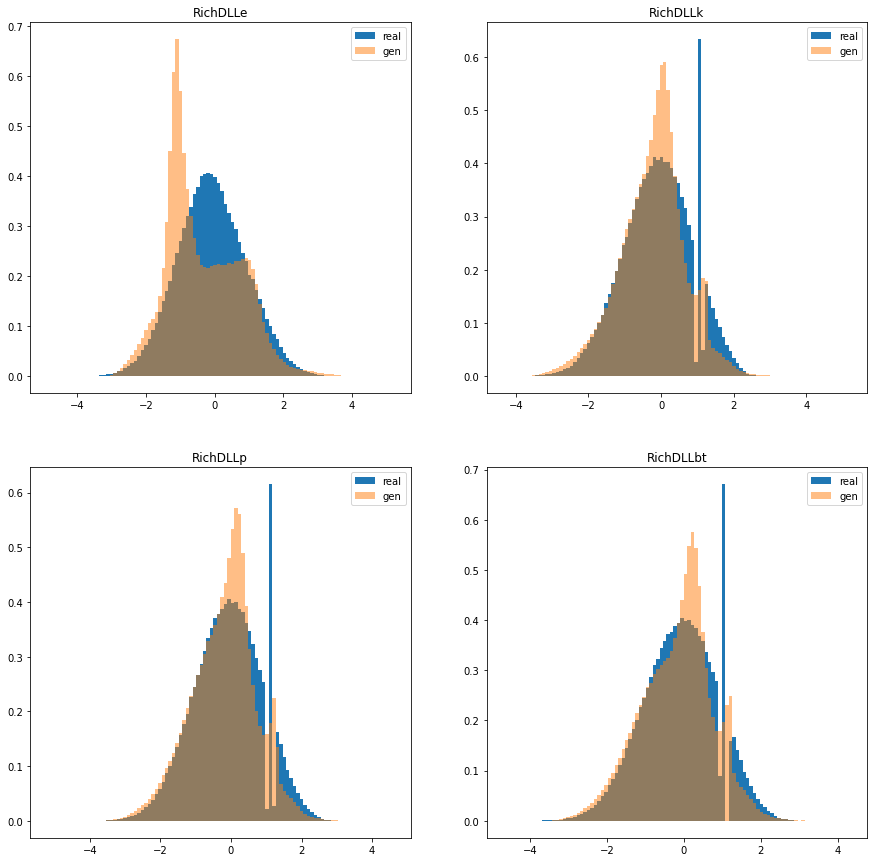

  0%|          | 1/489 [00:00<01:23,  5.85it/s]

(epoch 32)


100%|██████████| 123/123 [00:11<00:00, 10.30it/s]


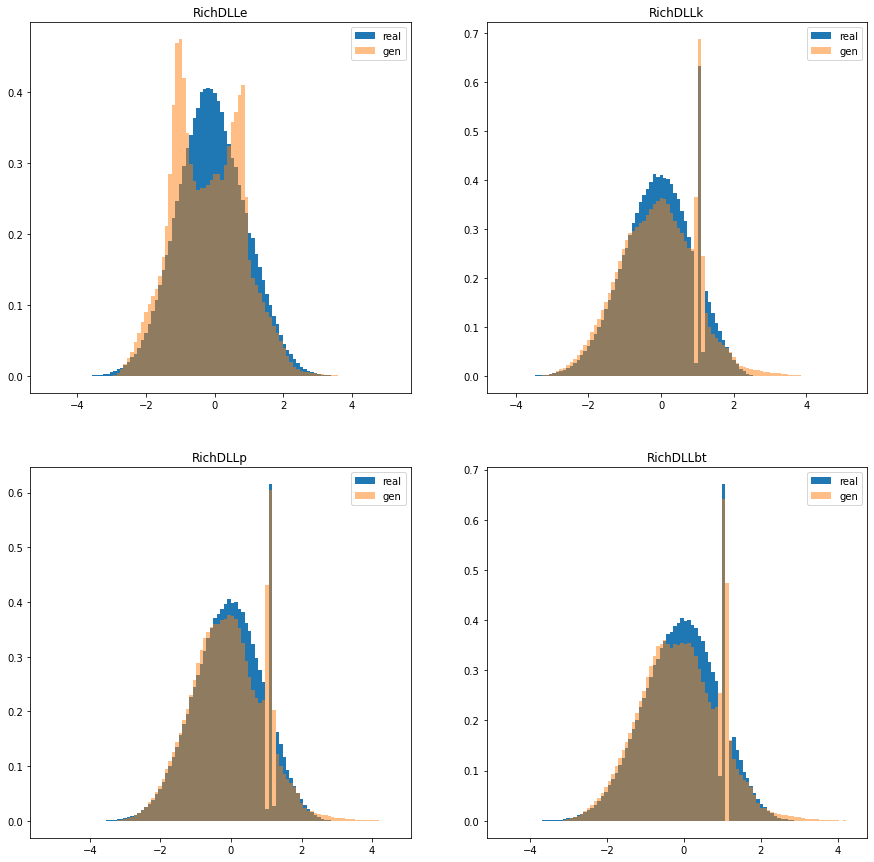

  0%|          | 1/489 [00:00<01:21,  6.00it/s]

(epoch 33)


100%|██████████| 123/123 [00:11<00:00, 10.71it/s]


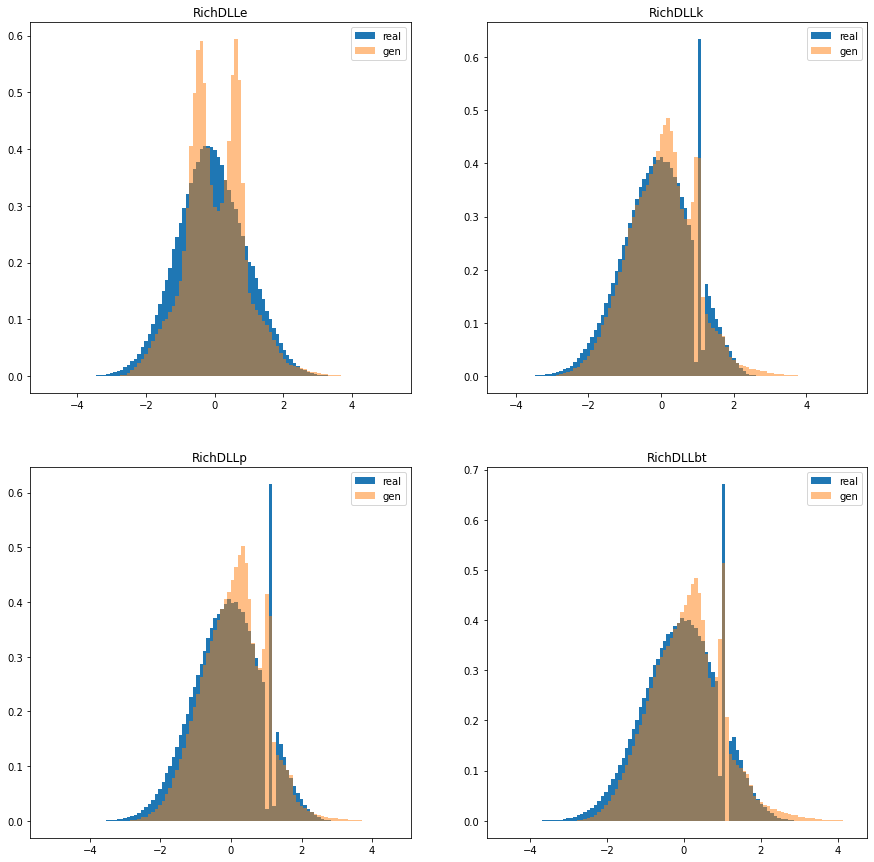

  0%|          | 1/489 [00:00<01:21,  5.98it/s]

(epoch 34)


100%|██████████| 123/123 [00:12<00:00,  9.69it/s]


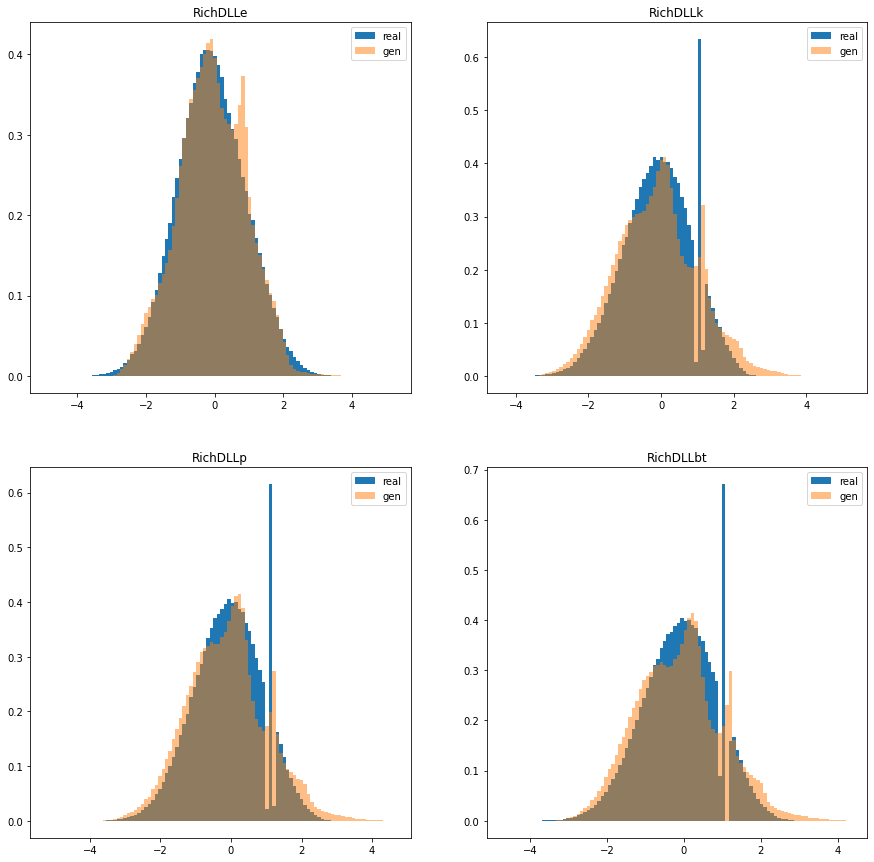

  0%|          | 1/489 [00:00<01:20,  6.06it/s]

(epoch 35)


100%|██████████| 123/123 [00:12<00:00,  9.65it/s]


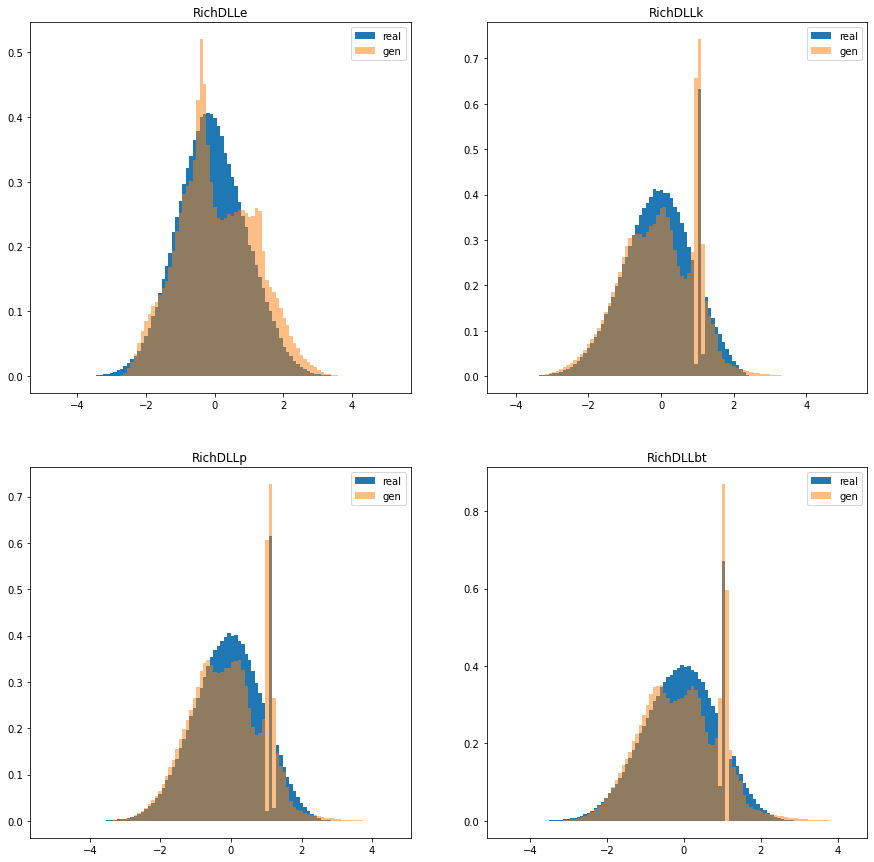

  0%|          | 1/489 [00:00<01:26,  5.66it/s]

(epoch 36)


100%|██████████| 123/123 [00:12<00:00, 10.06it/s]


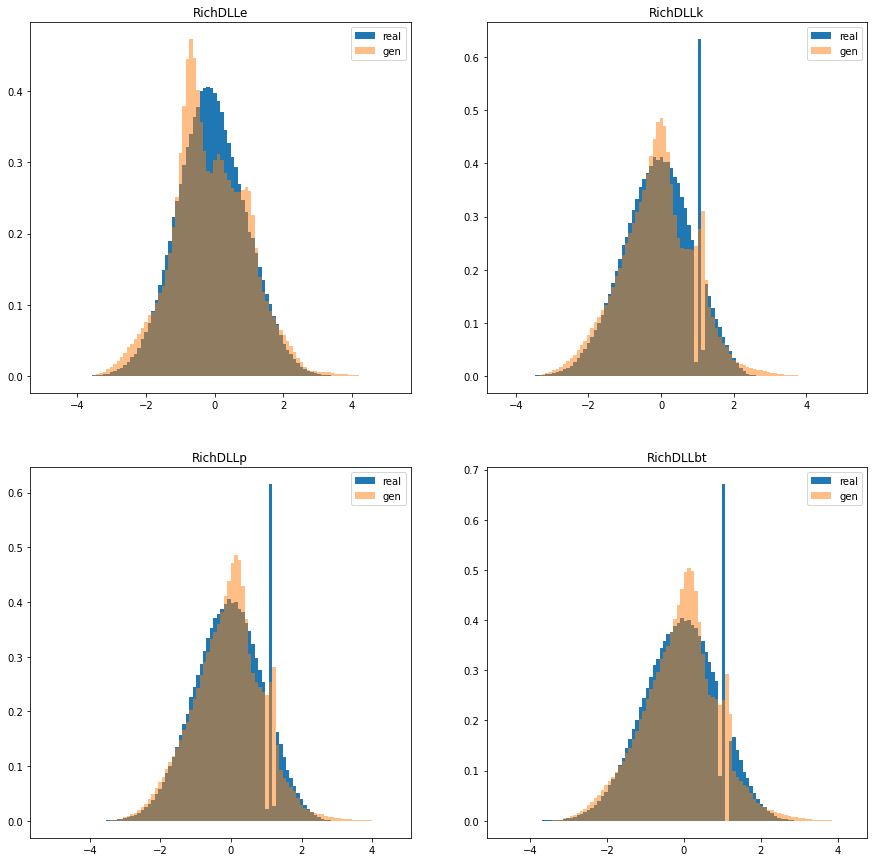

  0%|          | 1/489 [00:00<01:20,  6.04it/s]

(epoch 37)


100%|██████████| 123/123 [00:12<00:00, 10.05it/s]


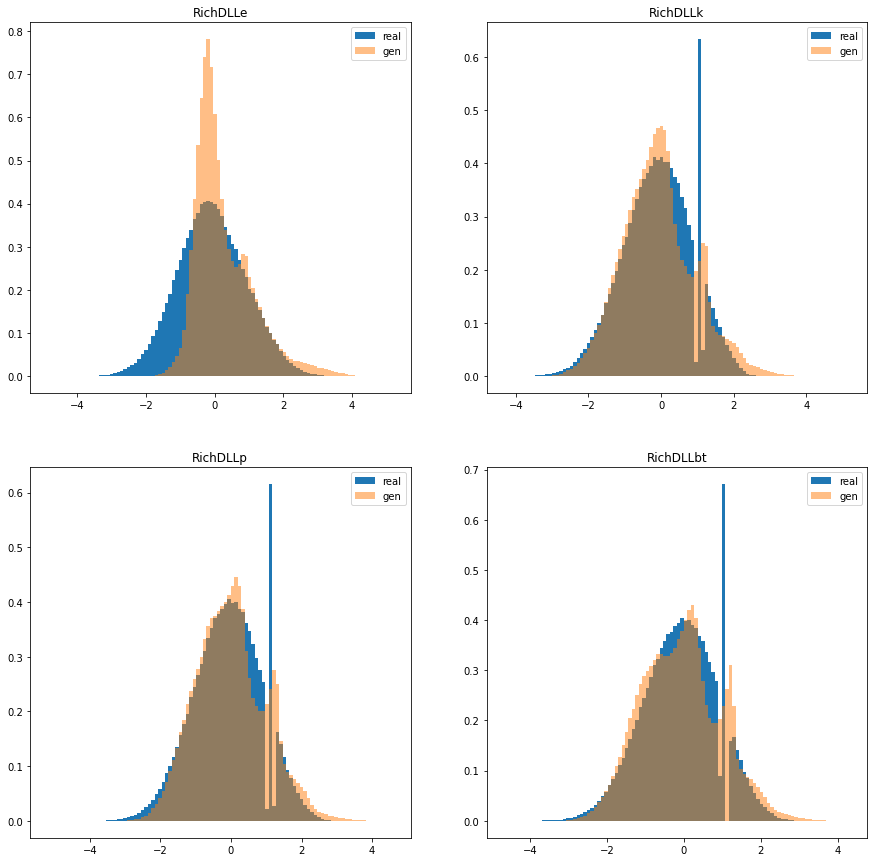

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 38)


100%|██████████| 123/123 [00:11<00:00, 10.58it/s]


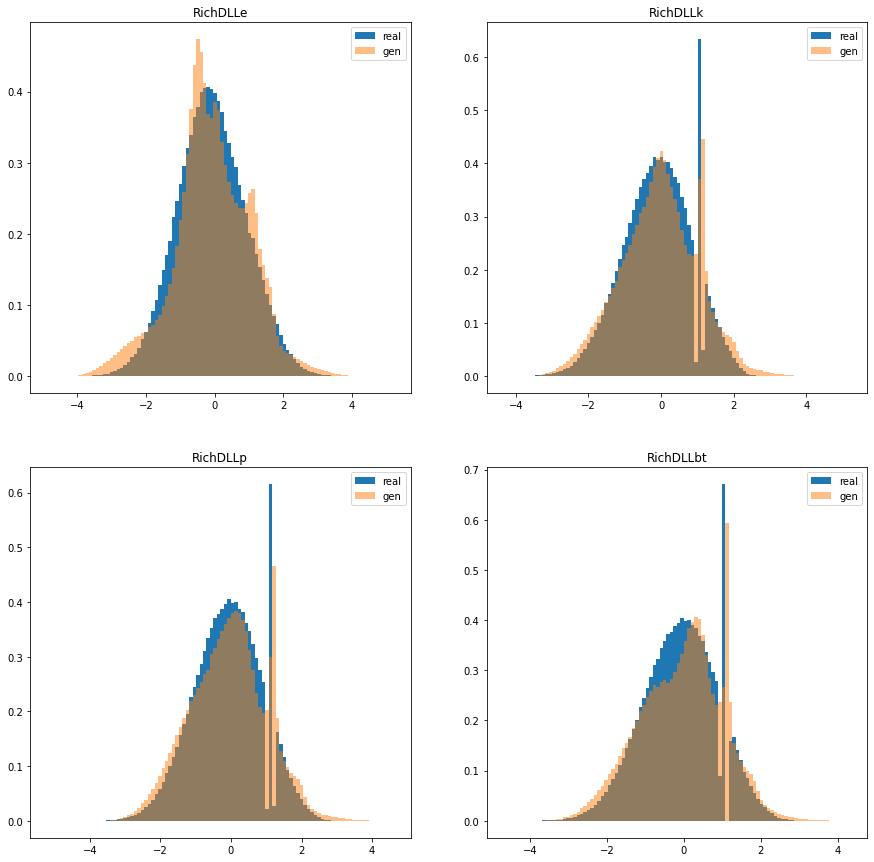

  0%|          | 1/489 [00:00<01:23,  5.87it/s]

(epoch 39)


100%|██████████| 123/123 [00:12<00:00,  9.88it/s]


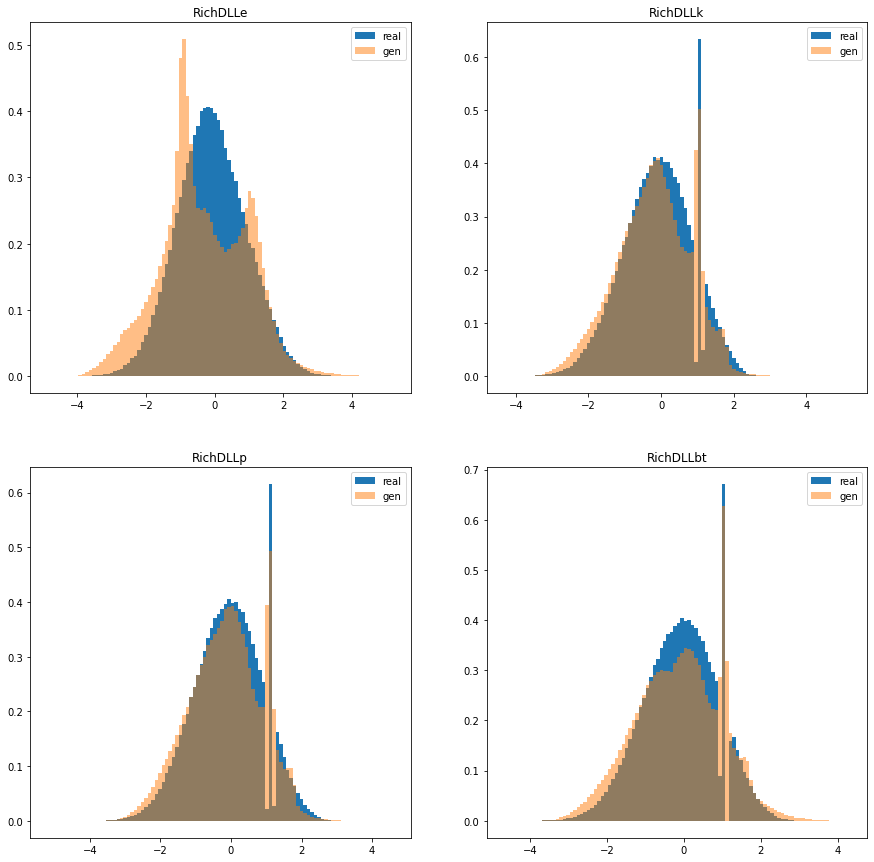

  0%|          | 1/489 [00:00<01:31,  5.32it/s]

(epoch 40)


100%|██████████| 123/123 [00:11<00:00, 10.26it/s]


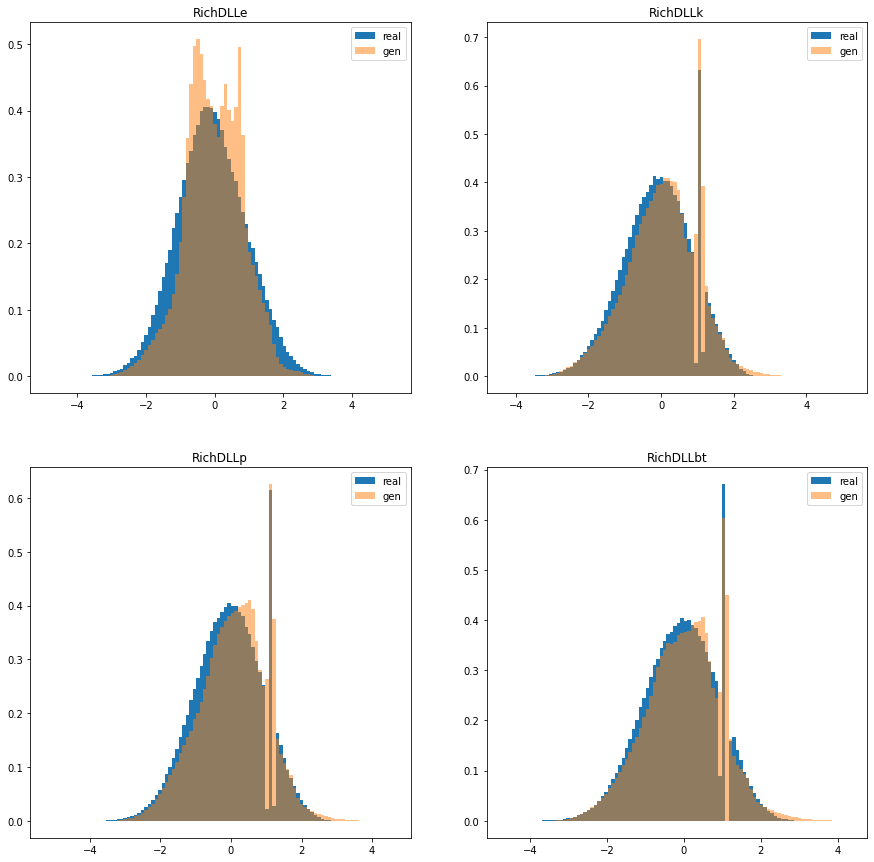

  0%|          | 1/489 [00:00<01:20,  6.06it/s]

(epoch 41)


100%|██████████| 123/123 [00:12<00:00, 10.21it/s]


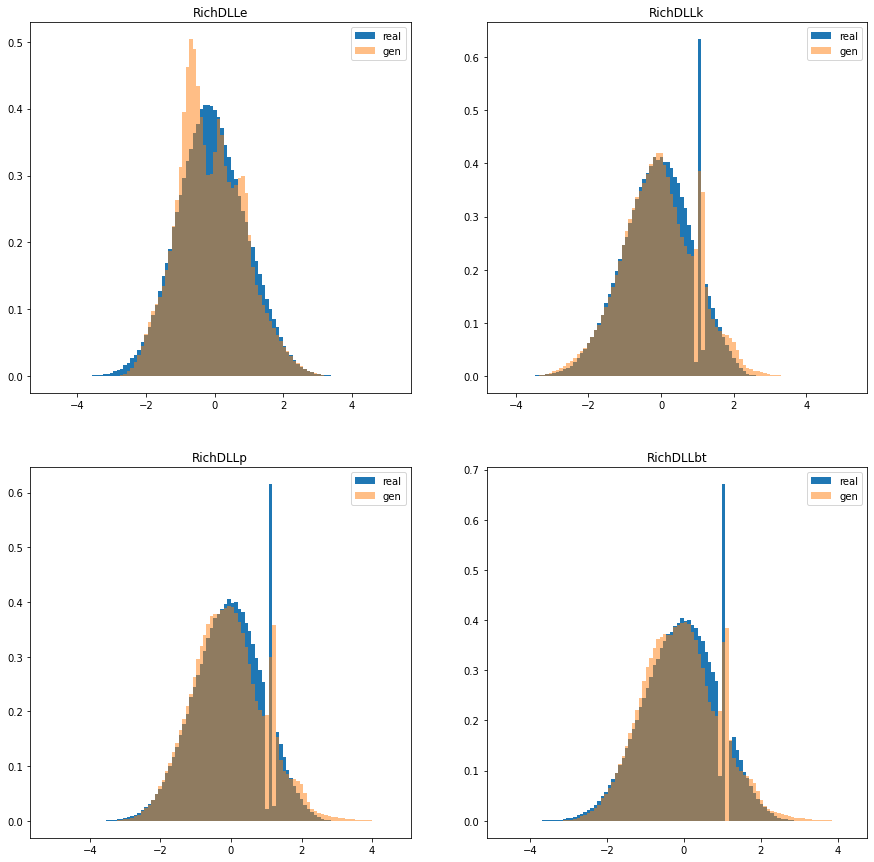

  0%|          | 1/489 [00:00<01:22,  5.95it/s]

(epoch 42)


100%|██████████| 123/123 [00:12<00:00,  9.95it/s]


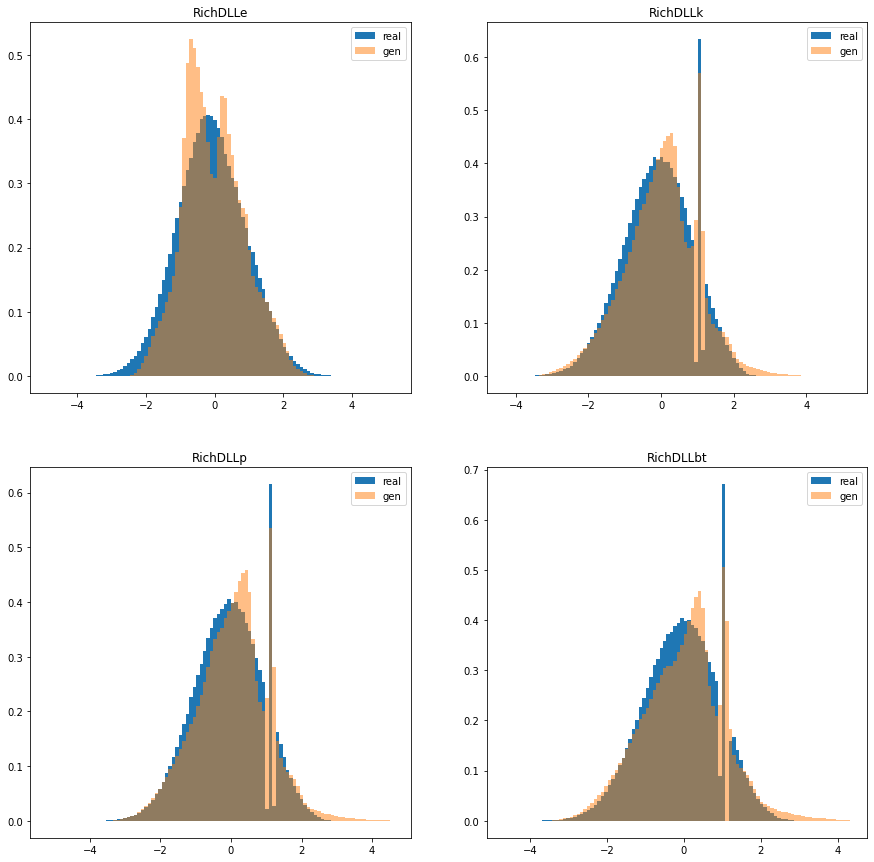

  0%|          | 1/489 [00:00<01:22,  5.91it/s]

(epoch 43)


100%|██████████| 123/123 [00:11<00:00, 10.66it/s]


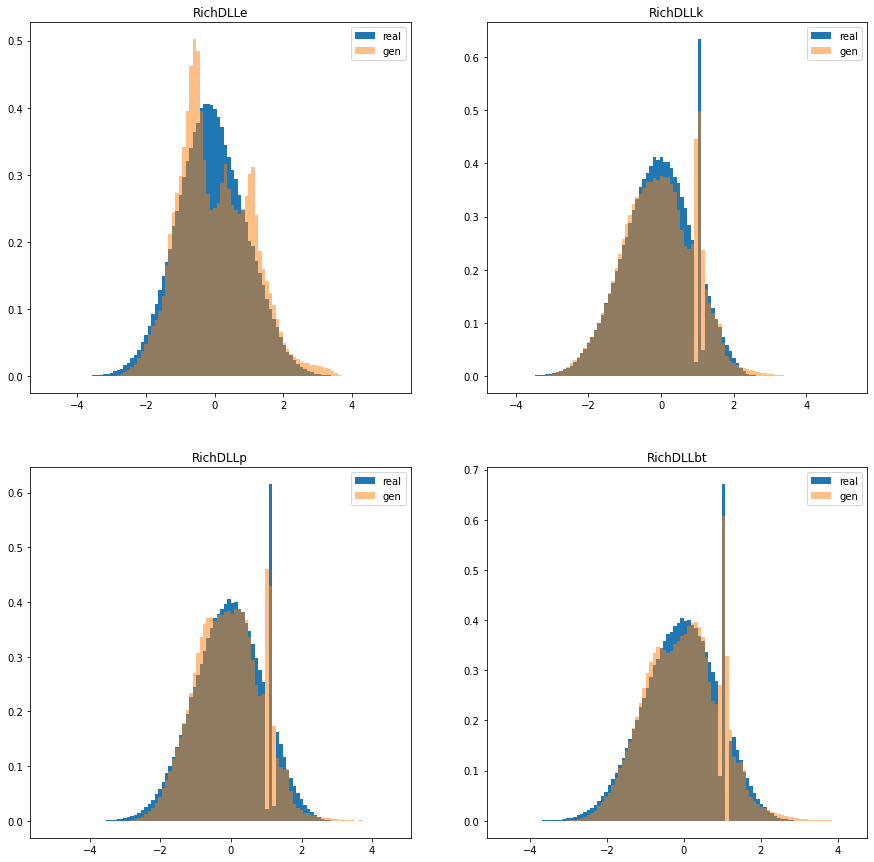

  0%|          | 1/489 [00:00<01:22,  5.91it/s]

(epoch 44)


100%|██████████| 123/123 [00:11<00:00, 10.64it/s]


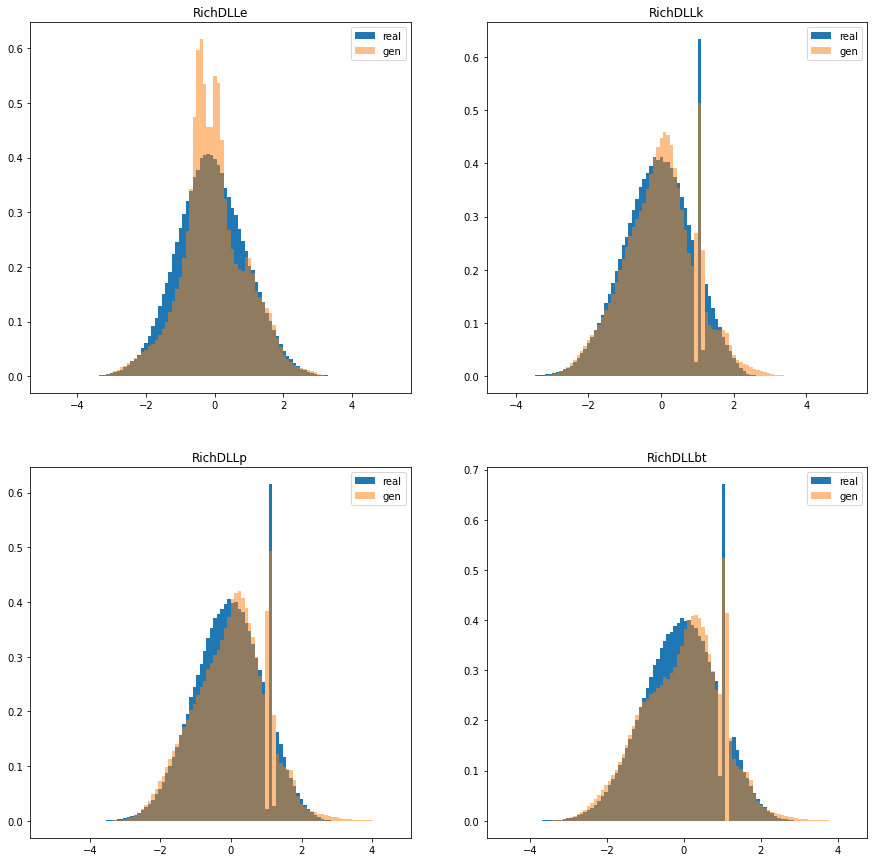

  0%|          | 1/489 [00:00<01:20,  6.03it/s]

(epoch 45)


100%|██████████| 123/123 [00:11<00:00, 10.64it/s]


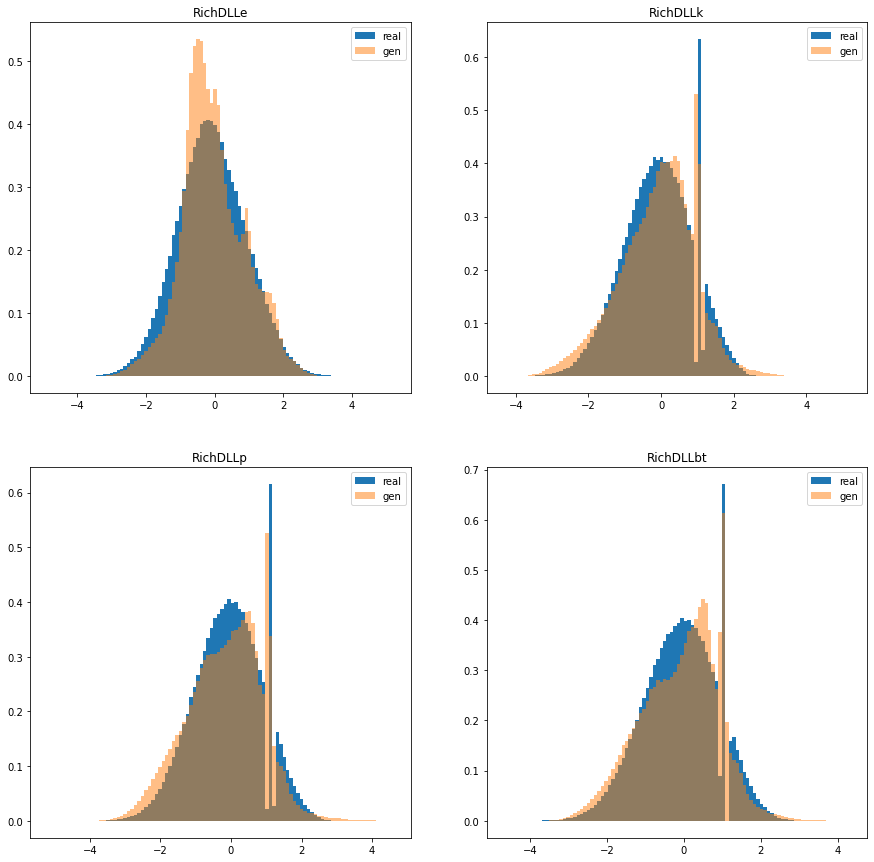

  0%|          | 1/489 [00:00<01:22,  5.94it/s]

(epoch 46)


100%|██████████| 123/123 [00:12<00:00,  9.85it/s]


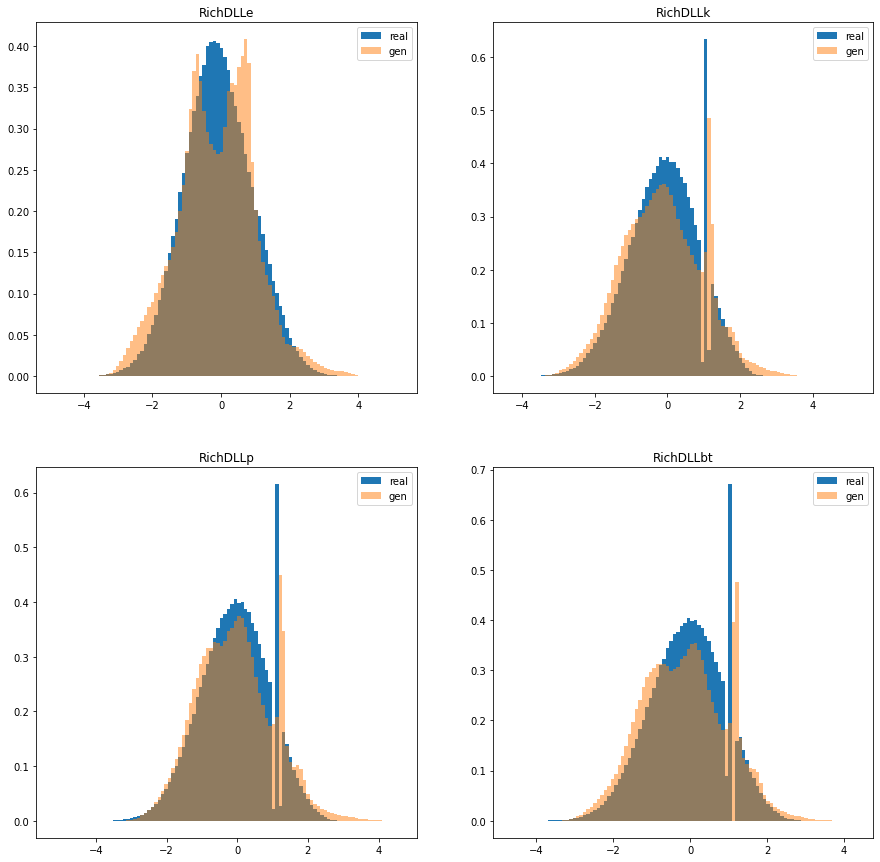

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 47)


100%|██████████| 123/123 [00:11<00:00, 10.73it/s]


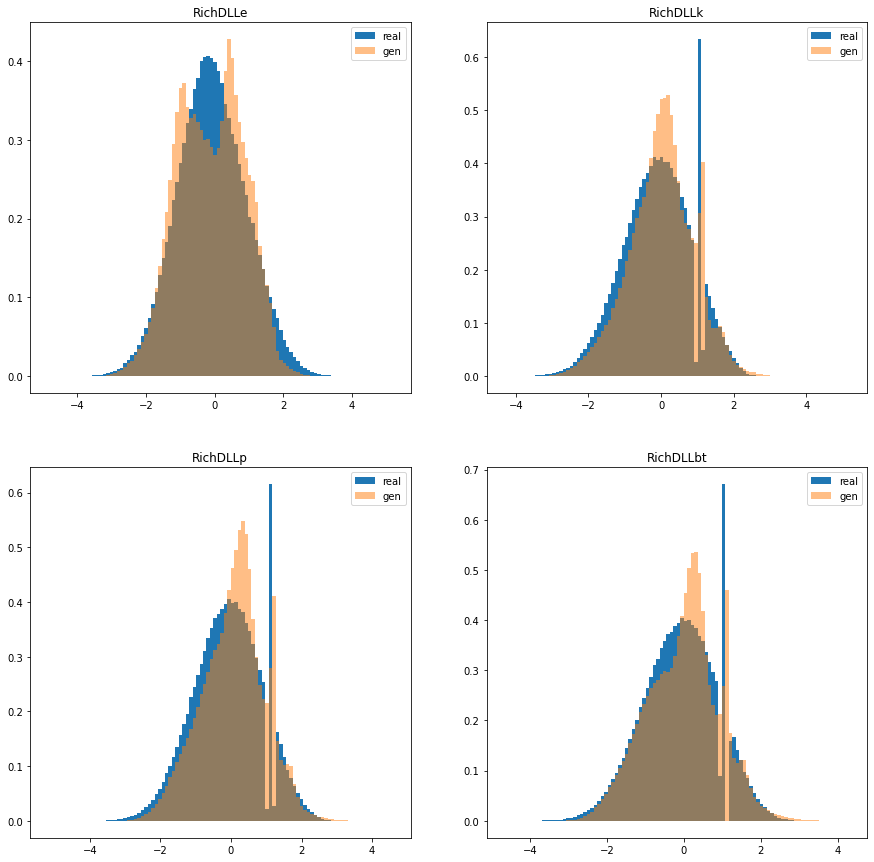

  0%|          | 1/489 [00:00<01:20,  6.09it/s]

(epoch 48)


100%|██████████| 123/123 [00:11<00:00, 10.89it/s]


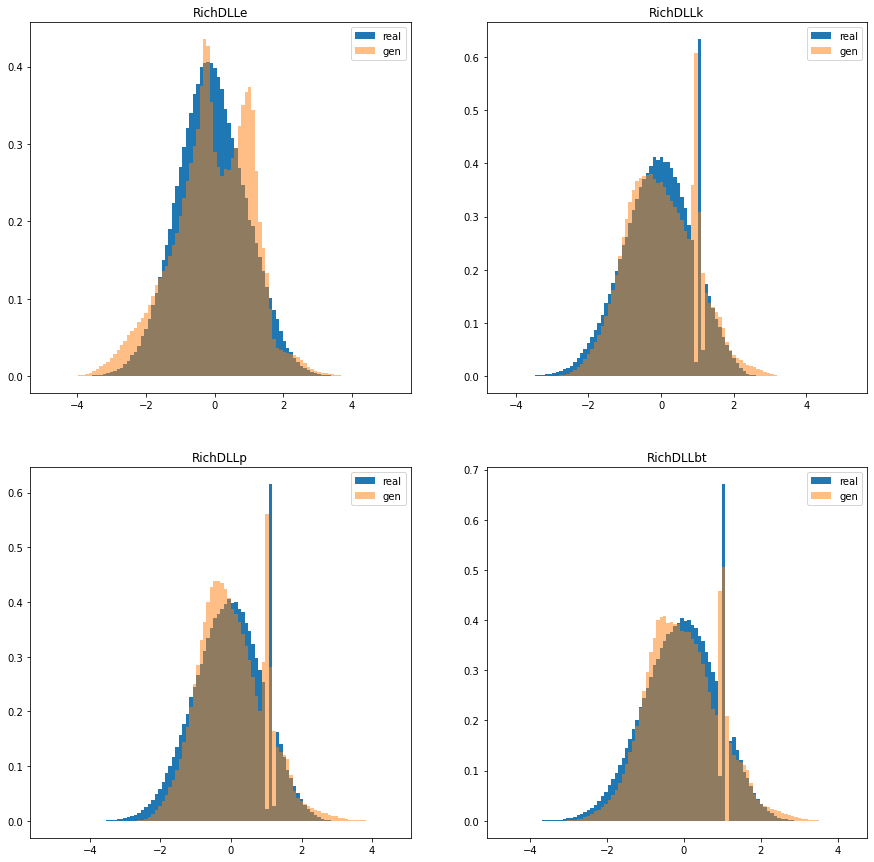

  0%|          | 1/489 [00:00<01:20,  6.06it/s]

(epoch 49)


100%|██████████| 123/123 [00:12<00:00, 10.06it/s]


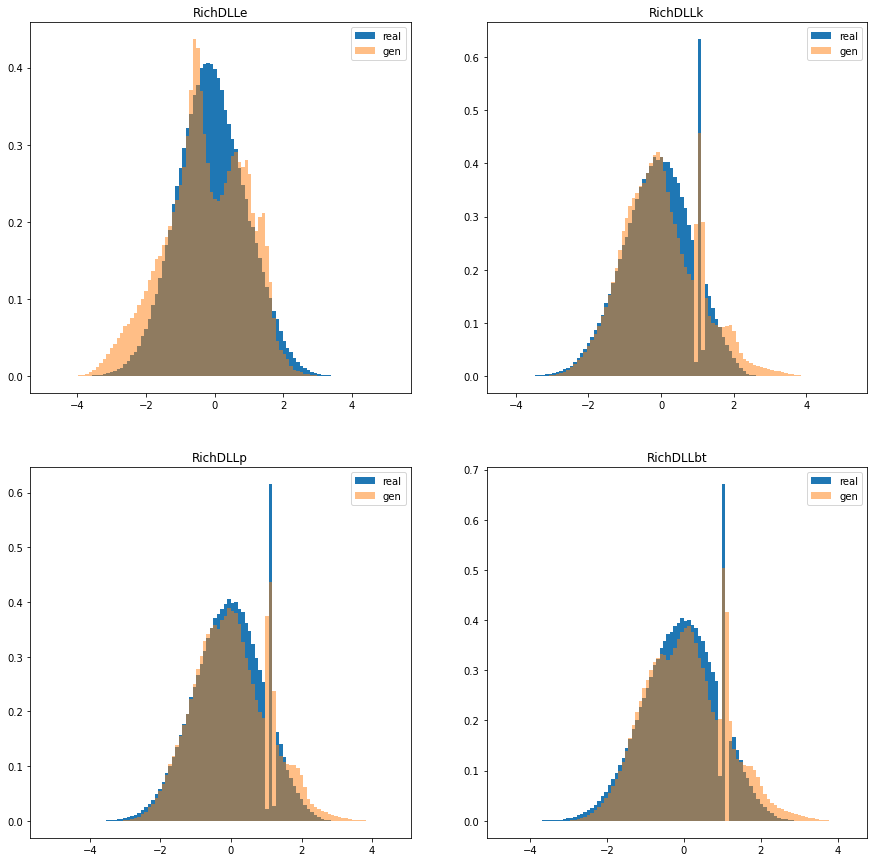

  0%|          | 1/489 [00:00<01:17,  6.29it/s]

(epoch 50)


100%|██████████| 123/123 [00:12<00:00, 10.21it/s]


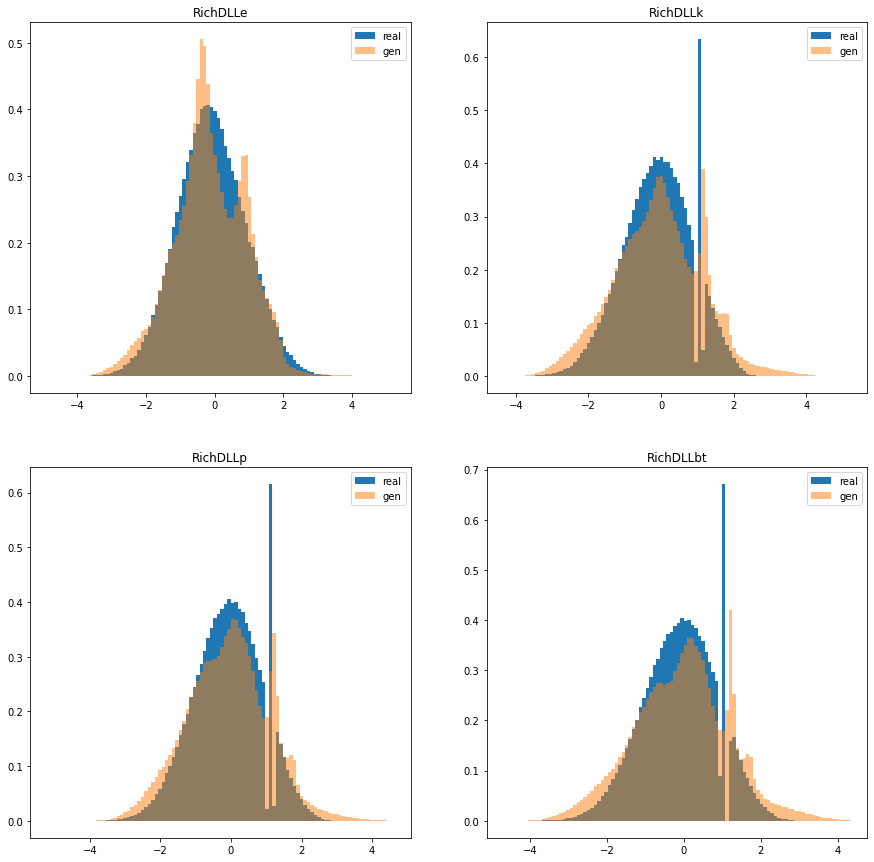

  0%|          | 1/489 [00:00<01:19,  6.13it/s]

(epoch 51)


100%|██████████| 123/123 [00:11<00:00, 10.84it/s]


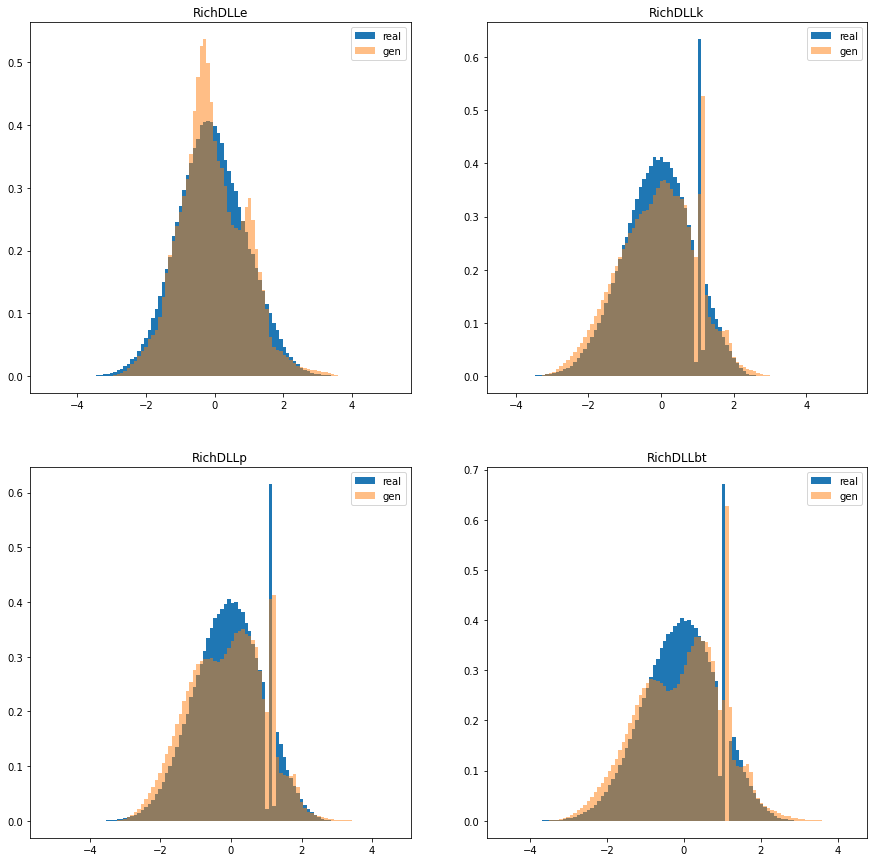

  0%|          | 1/489 [00:00<01:18,  6.22it/s]

(epoch 52)


100%|██████████| 123/123 [00:11<00:00, 10.68it/s]


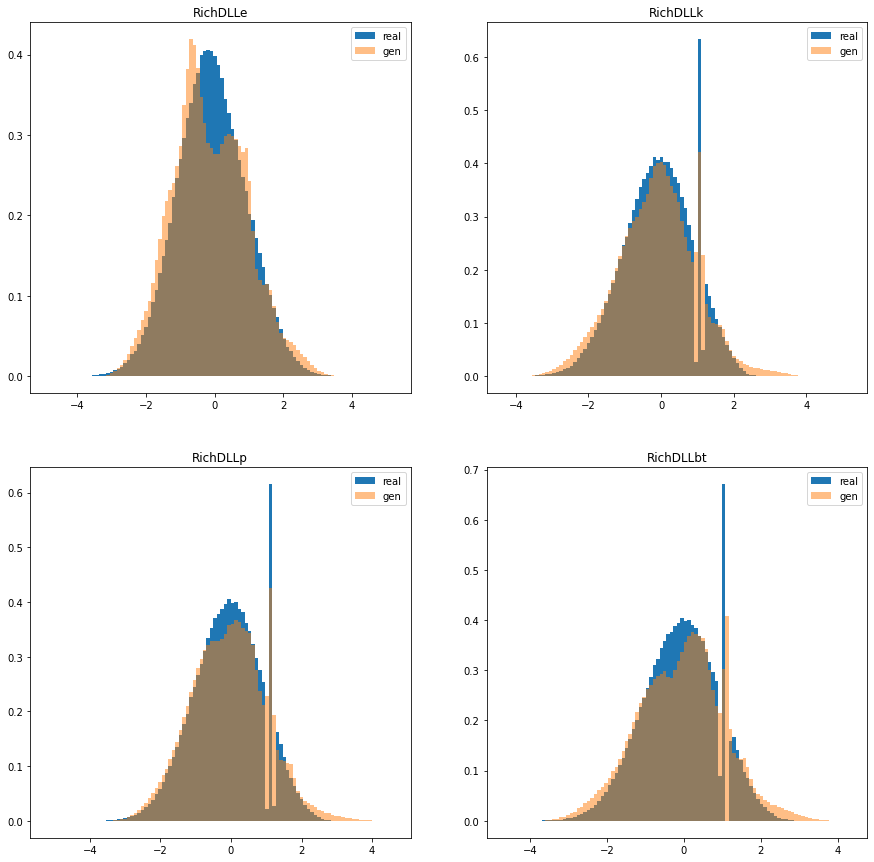

  0%|          | 1/489 [00:00<01:18,  6.21it/s]

(epoch 53)


100%|██████████| 123/123 [00:11<00:00, 10.87it/s]


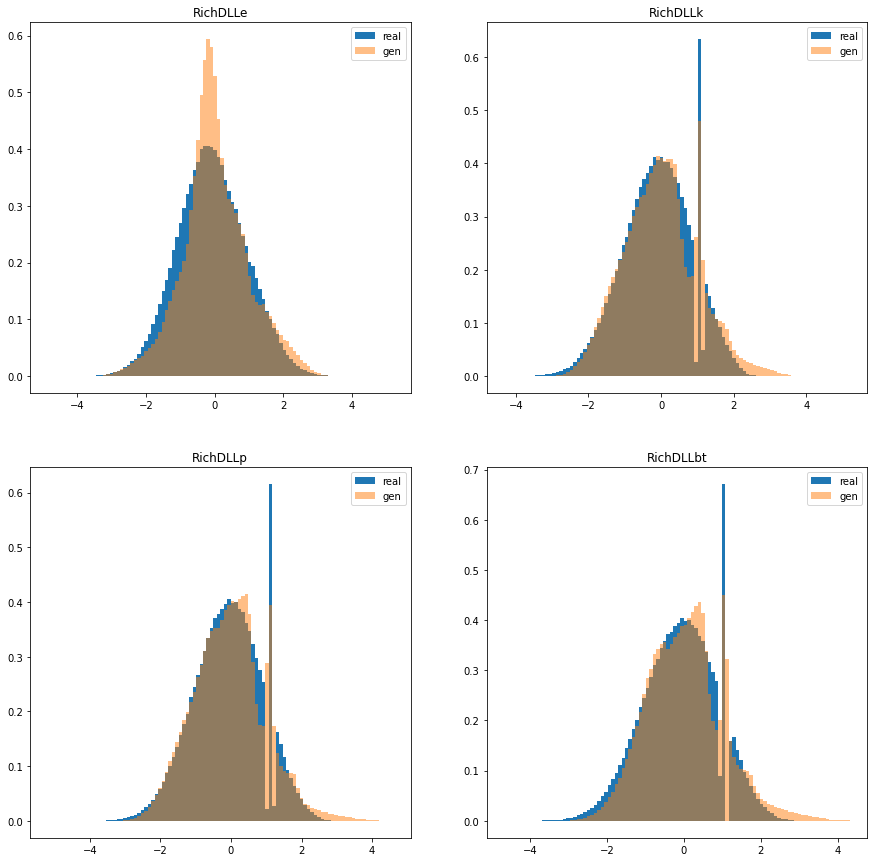

  0%|          | 1/489 [00:00<01:18,  6.24it/s]

(epoch 54)


100%|██████████| 123/123 [00:11<00:00, 10.80it/s]


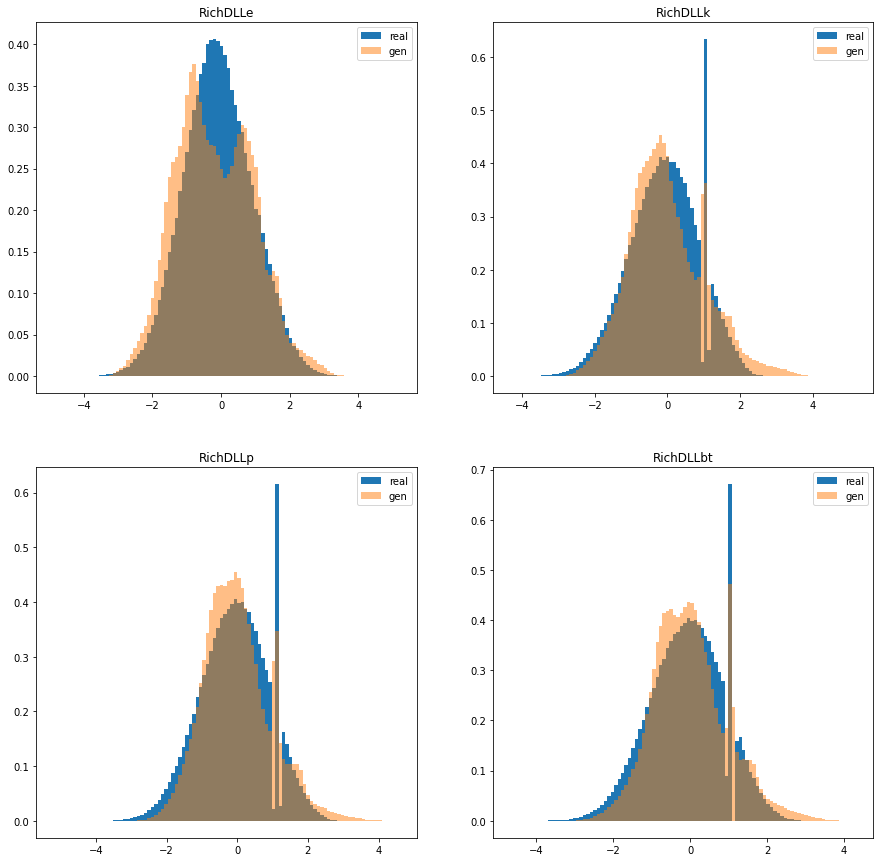

  0%|          | 1/489 [00:00<01:18,  6.23it/s]

(epoch 55)


100%|██████████| 123/123 [00:11<00:00, 10.84it/s]


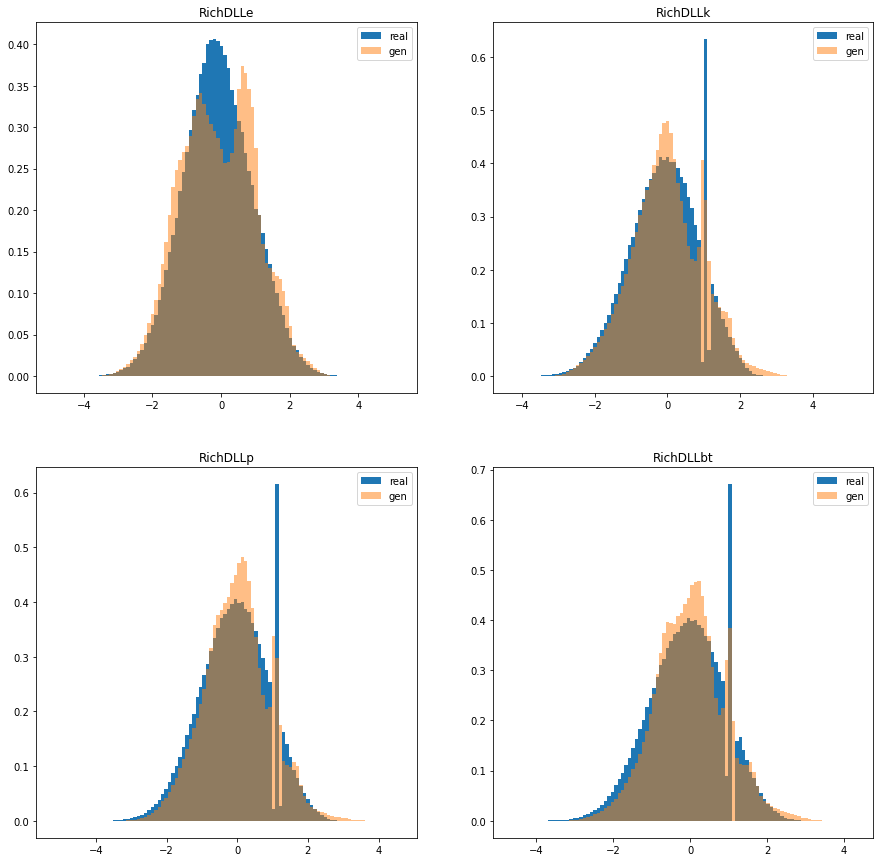

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 56)


100%|██████████| 123/123 [00:11<00:00, 10.81it/s]


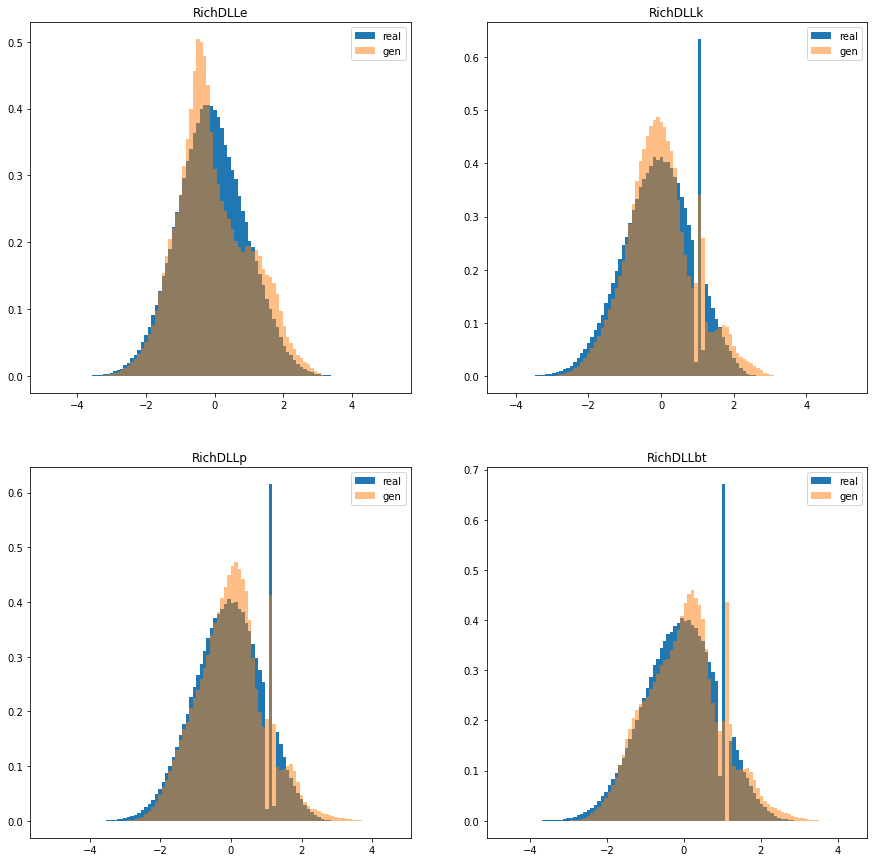

  0%|          | 1/489 [00:00<01:19,  6.17it/s]

(epoch 57)


100%|██████████| 123/123 [00:11<00:00, 10.44it/s]


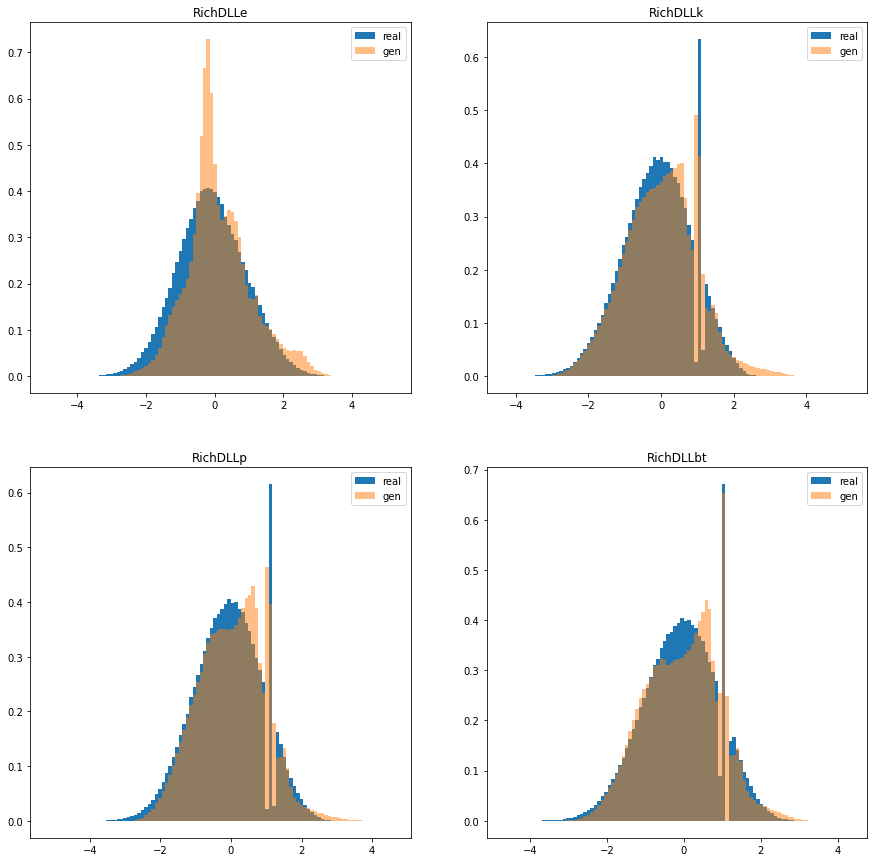

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 58)


100%|██████████| 123/123 [00:12<00:00,  9.93it/s]


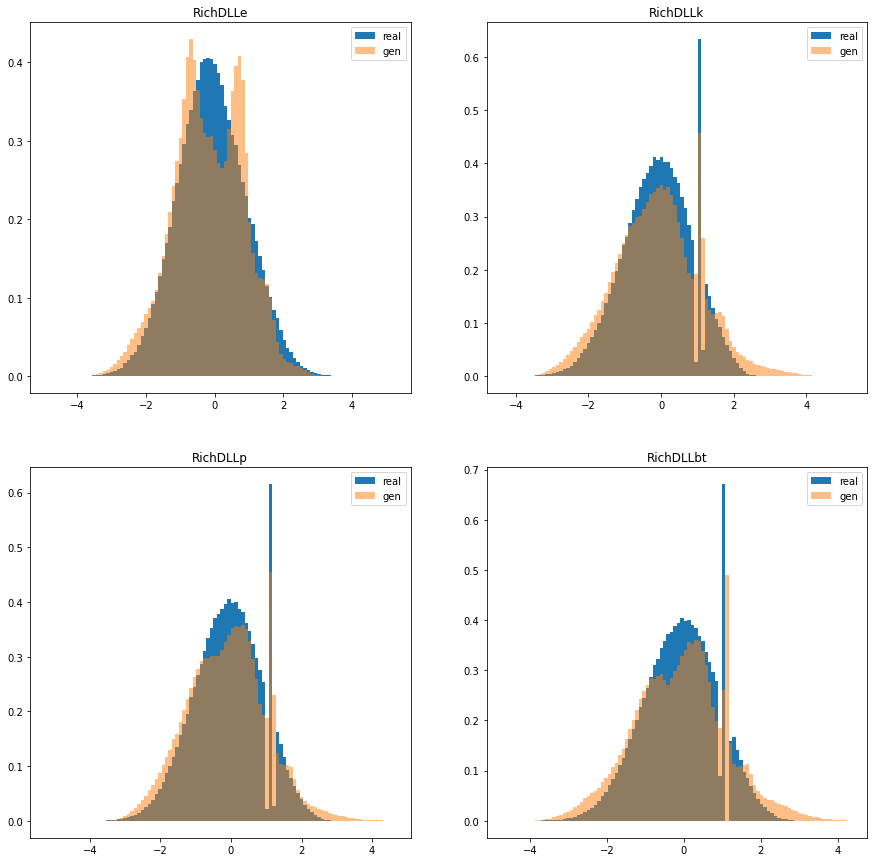

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 59)


100%|██████████| 123/123 [00:11<00:00, 10.80it/s]


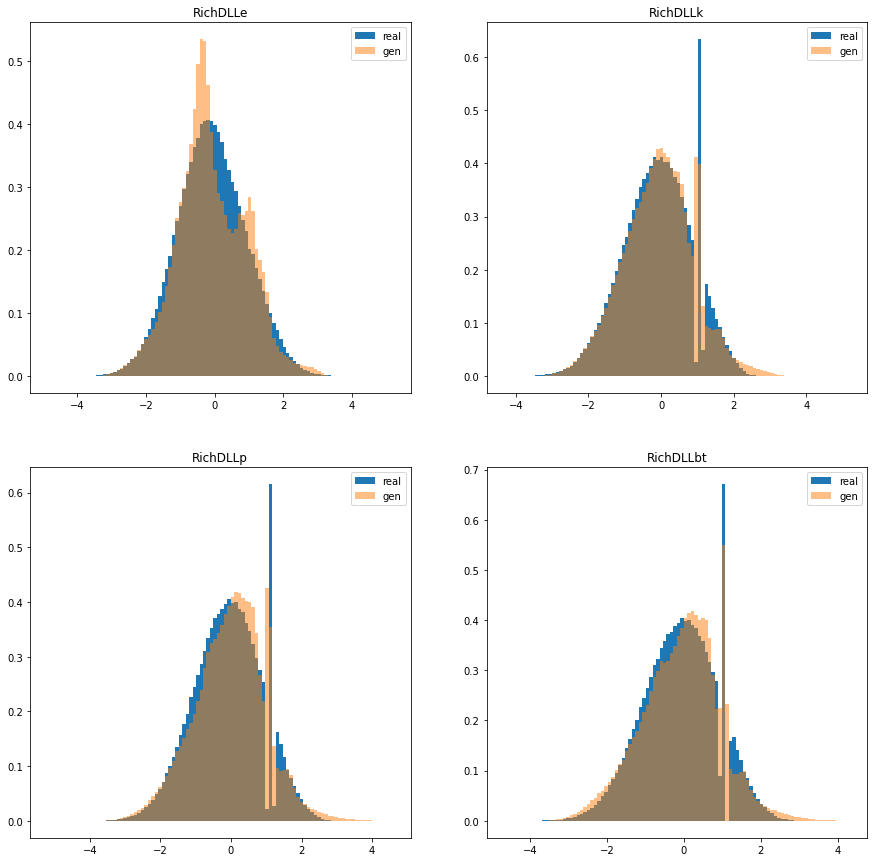

  0%|          | 1/489 [00:00<01:21,  6.00it/s]

(epoch 60)


100%|██████████| 123/123 [00:11<00:00, 10.80it/s]


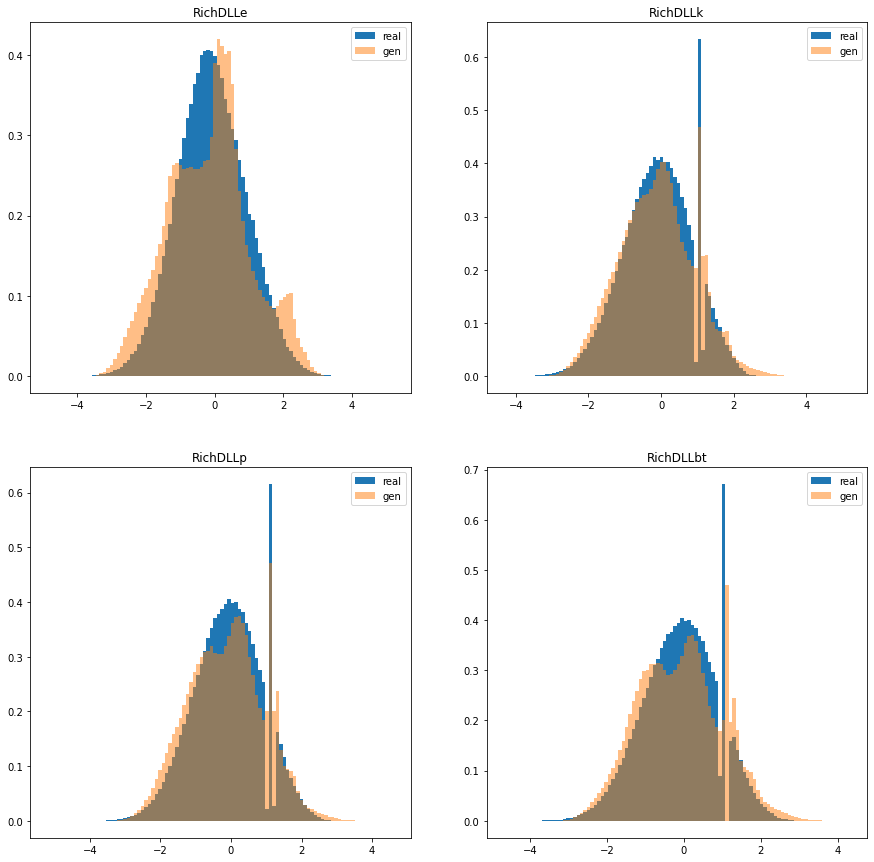

  0%|          | 1/489 [00:00<01:27,  5.55it/s]

(epoch 61)


100%|██████████| 123/123 [00:11<00:00, 10.63it/s]


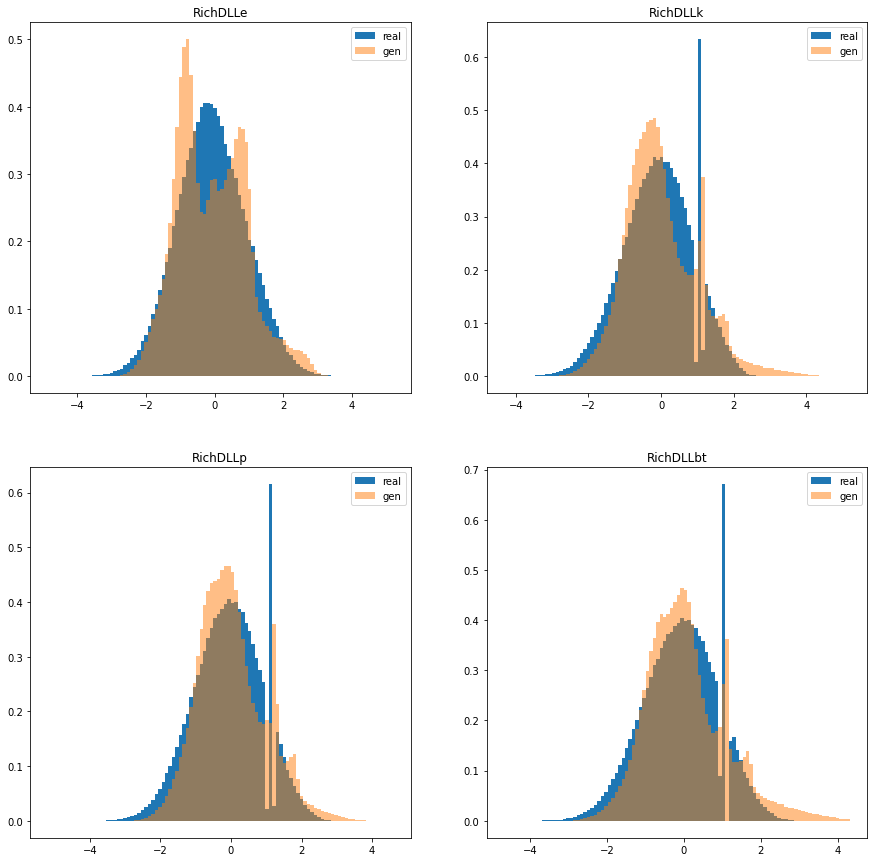

  0%|          | 1/489 [00:00<01:18,  6.20it/s]

(epoch 62)


100%|██████████| 123/123 [00:11<00:00, 10.28it/s]


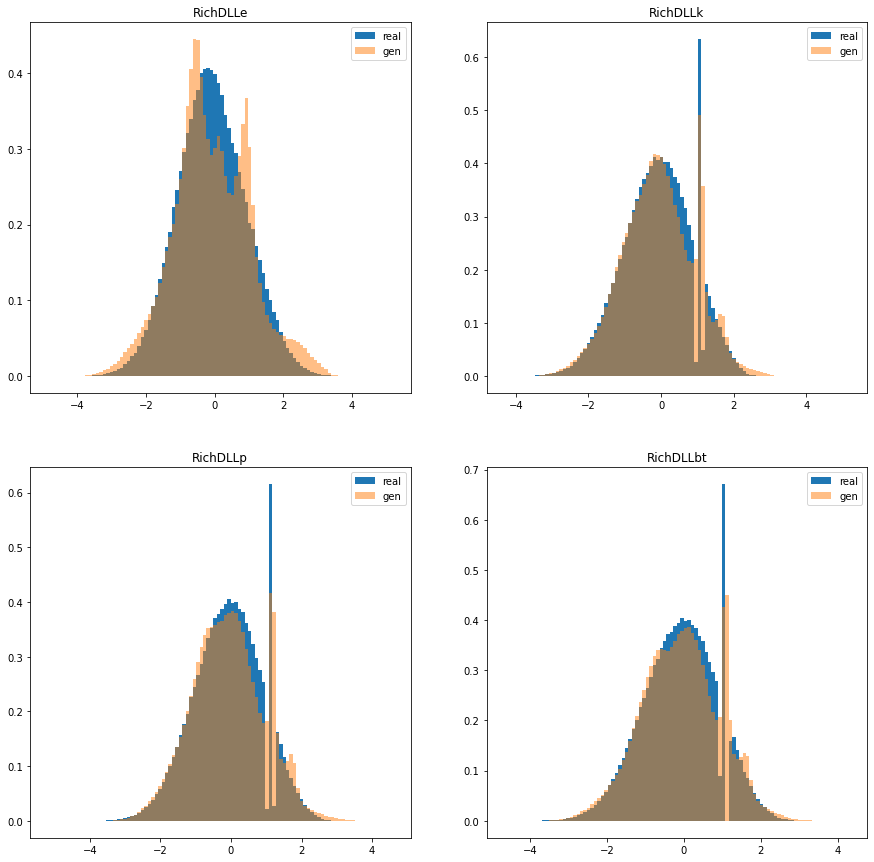

  0%|          | 1/489 [00:00<01:20,  6.09it/s]

(epoch 63)


100%|██████████| 123/123 [00:11<00:00, 10.77it/s]


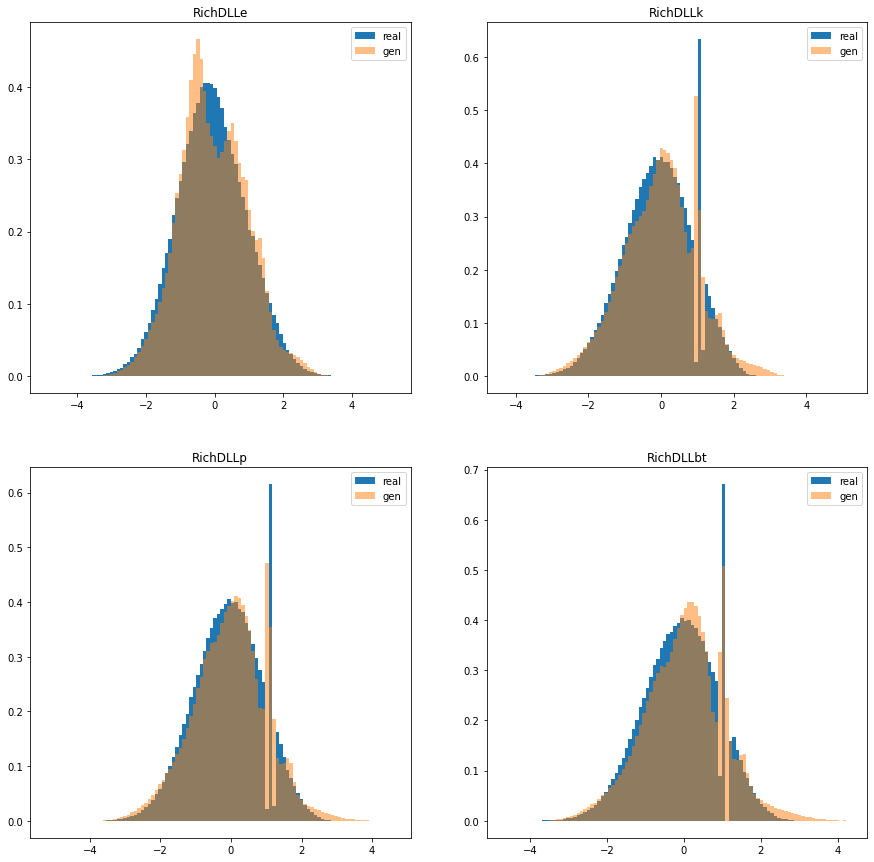

  0%|          | 1/489 [00:00<01:19,  6.14it/s]

(epoch 64)


100%|██████████| 123/123 [00:11<00:00, 10.76it/s]


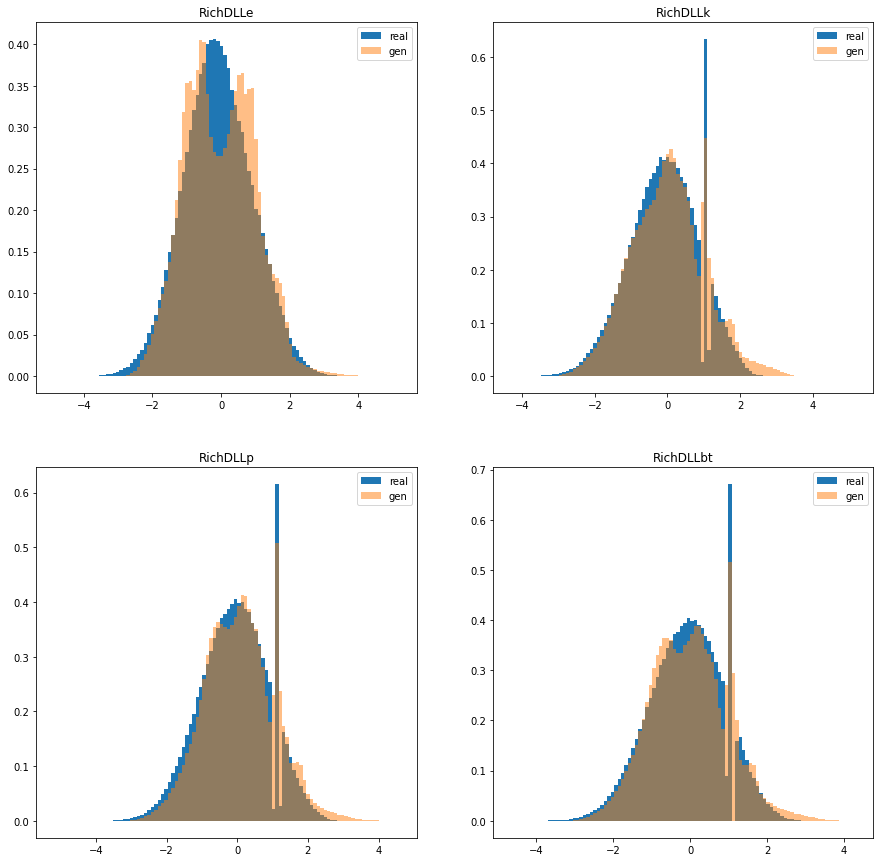

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 65)


100%|██████████| 123/123 [00:11<00:00, 10.78it/s]


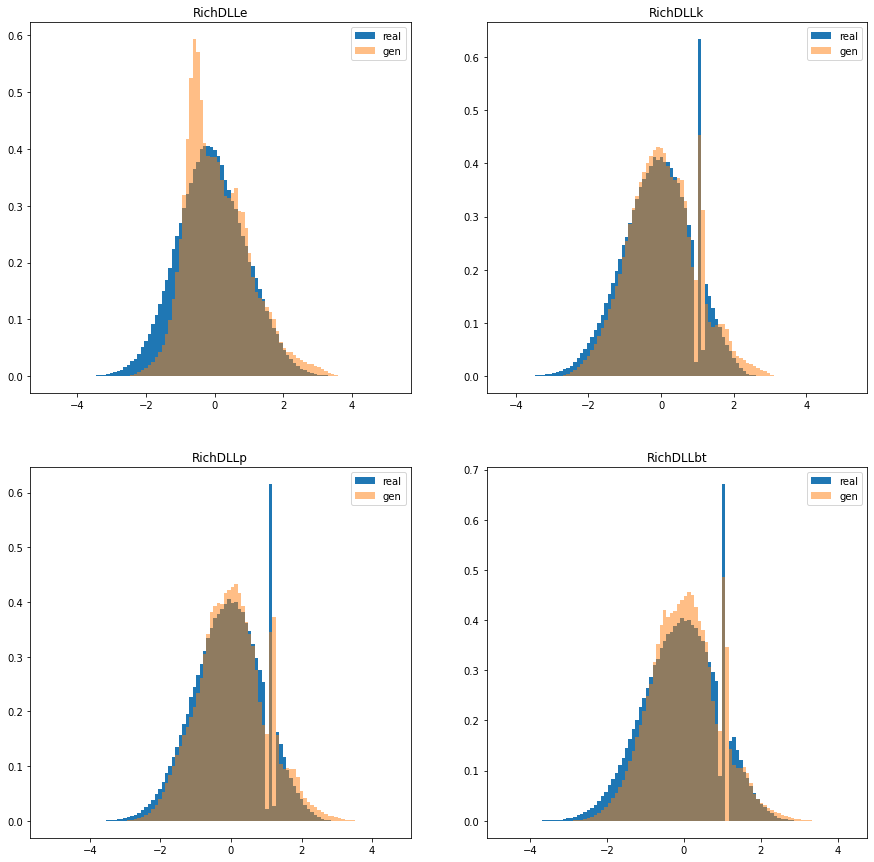

  0%|          | 1/489 [00:00<01:19,  6.18it/s]

(epoch 66)


100%|██████████| 123/123 [00:11<00:00, 10.74it/s]


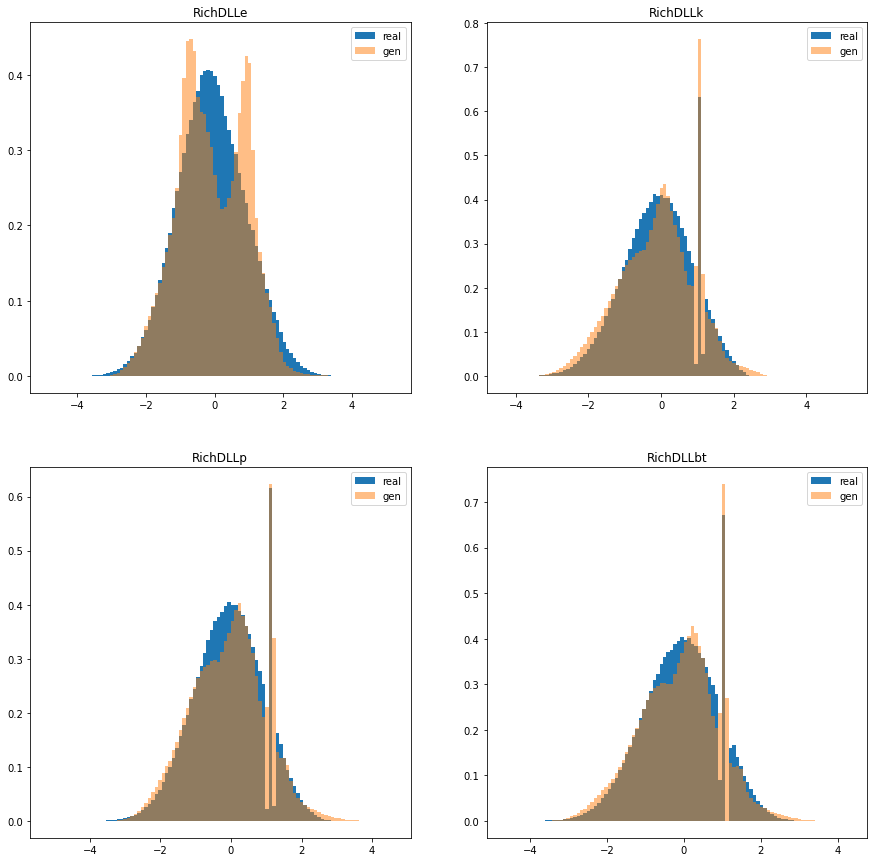

  0%|          | 1/489 [00:00<01:18,  6.18it/s]

(epoch 67)


100%|██████████| 123/123 [00:11<00:00, 10.75it/s]


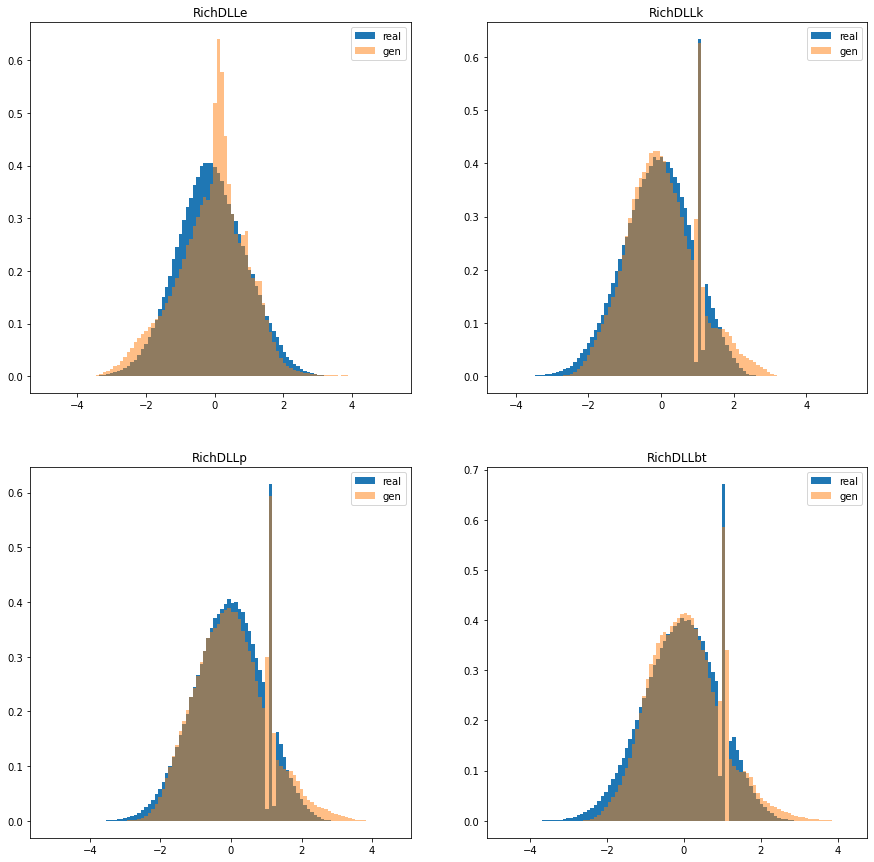

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 68)


100%|██████████| 123/123 [00:12<00:00,  9.91it/s]


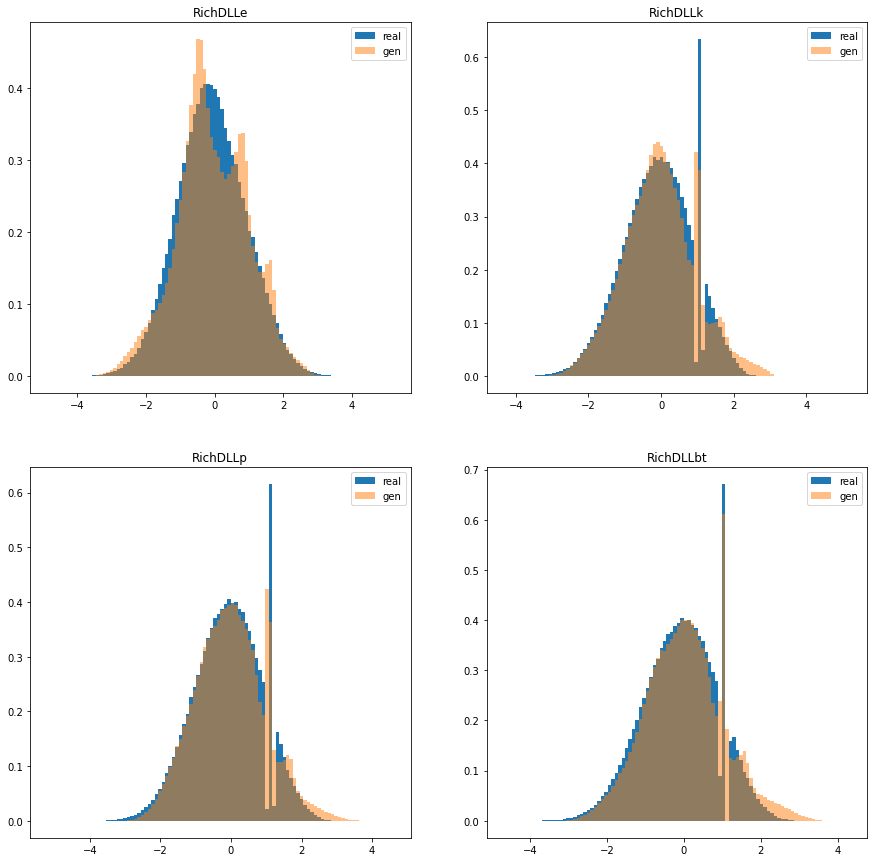

  0%|          | 1/489 [00:00<01:17,  6.26it/s]

(epoch 69)


100%|██████████| 123/123 [00:11<00:00, 10.62it/s]


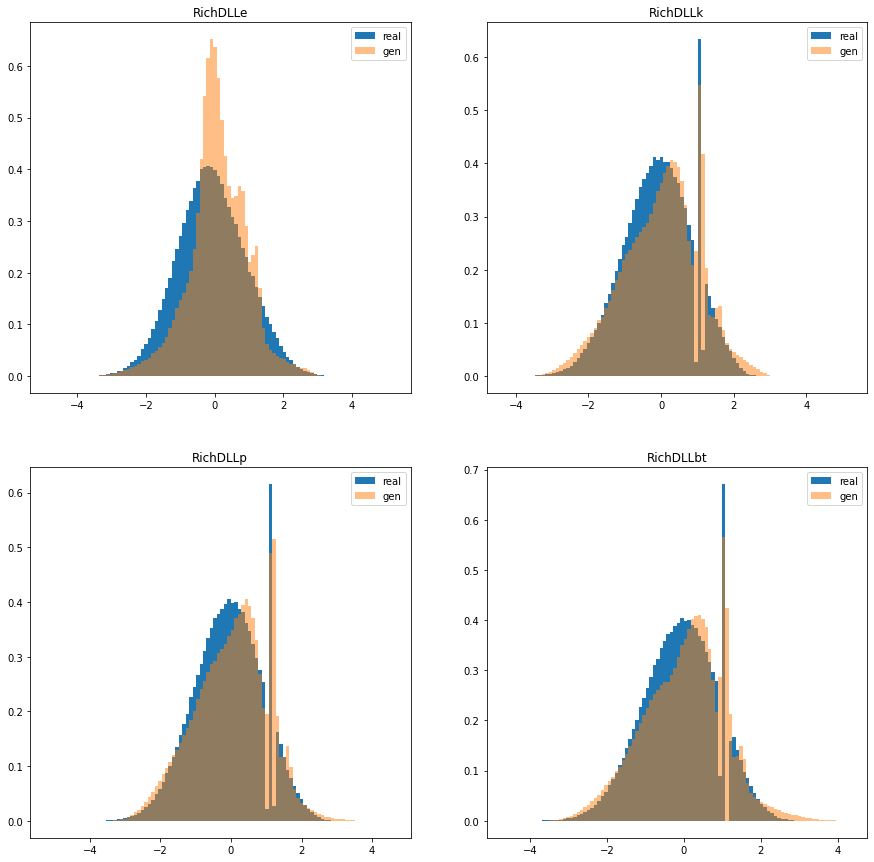

  0%|          | 1/489 [00:00<01:18,  6.24it/s]

(epoch 70)


100%|██████████| 123/123 [00:11<00:00, 10.86it/s]


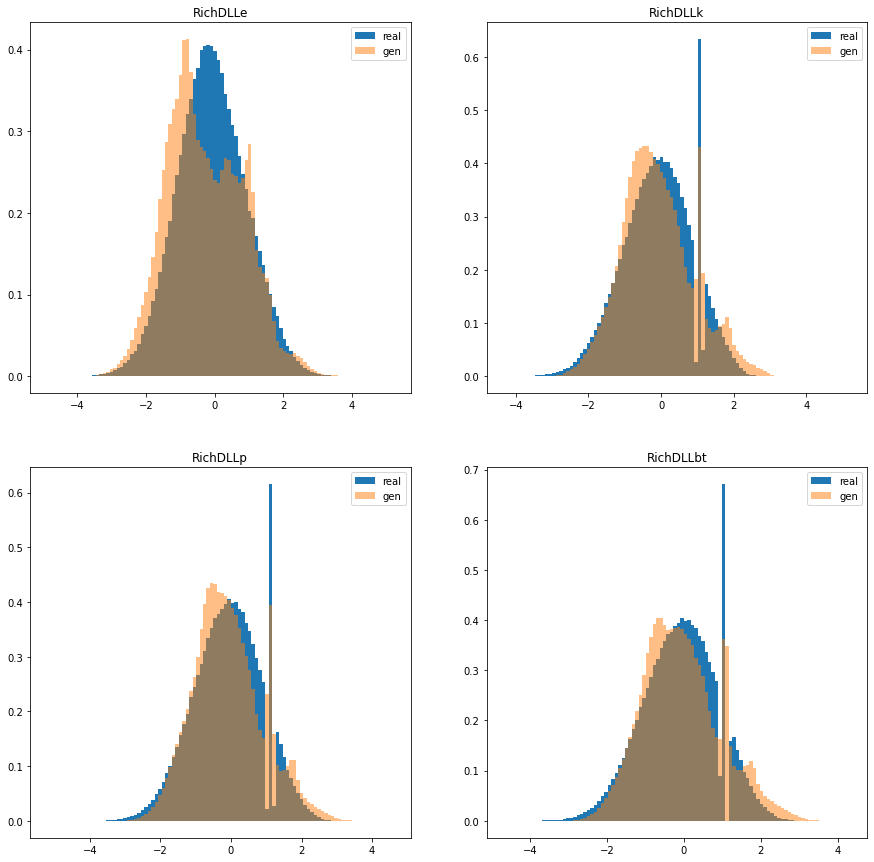

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 71)


100%|██████████| 123/123 [00:11<00:00, 10.65it/s]


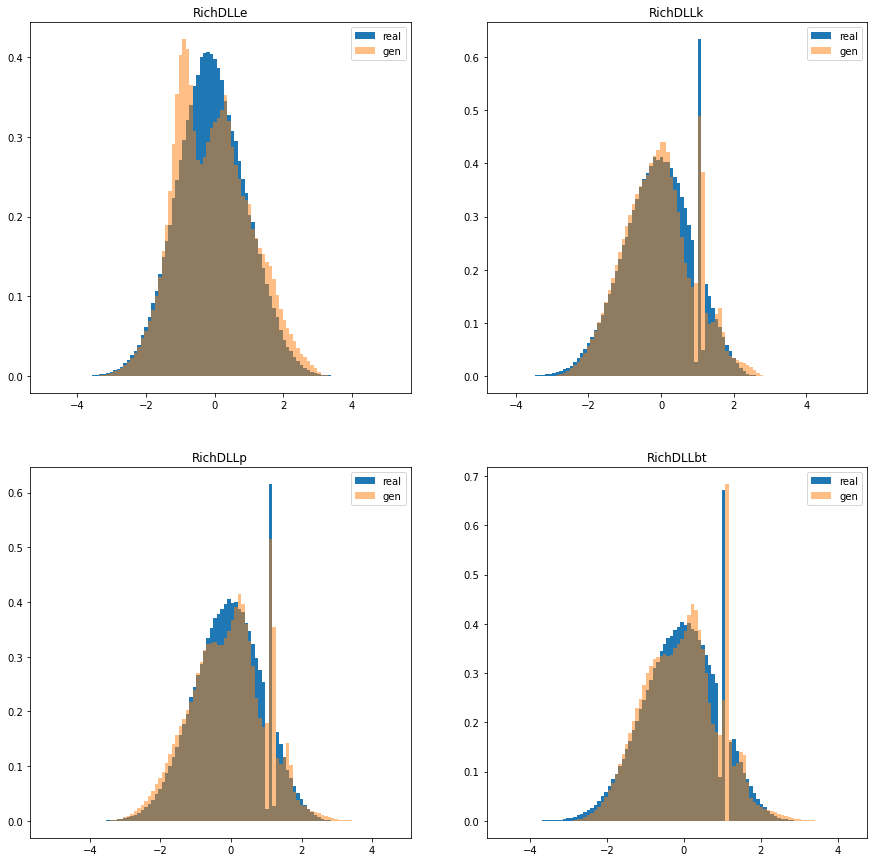

  0%|          | 1/489 [00:00<01:19,  6.16it/s]

(epoch 72)


100%|██████████| 123/123 [00:12<00:00, 10.18it/s]


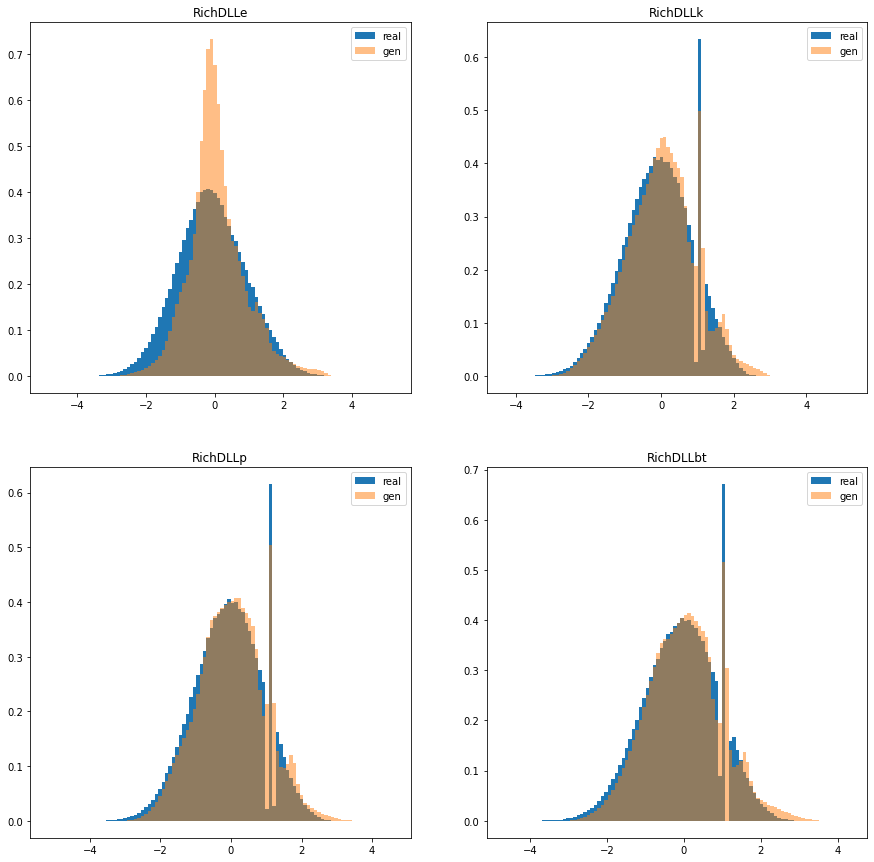

  0%|          | 1/489 [00:00<01:30,  5.37it/s]

(epoch 73)


100%|██████████| 123/123 [00:11<00:00, 10.75it/s]


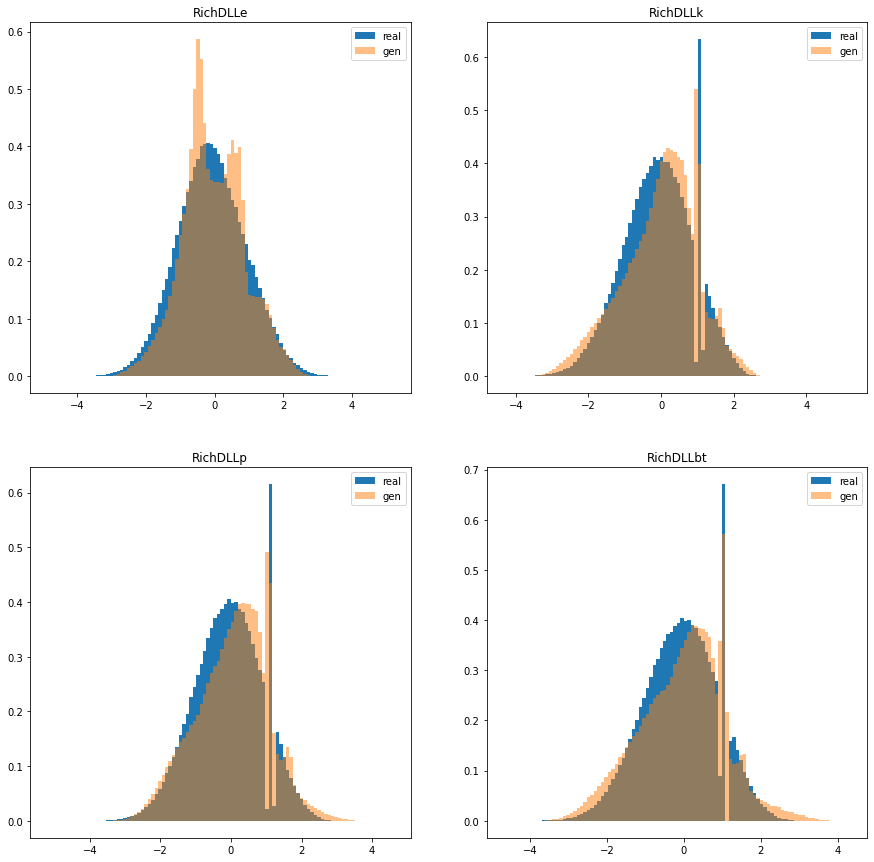

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 74)


100%|██████████| 123/123 [00:11<00:00, 10.67it/s]


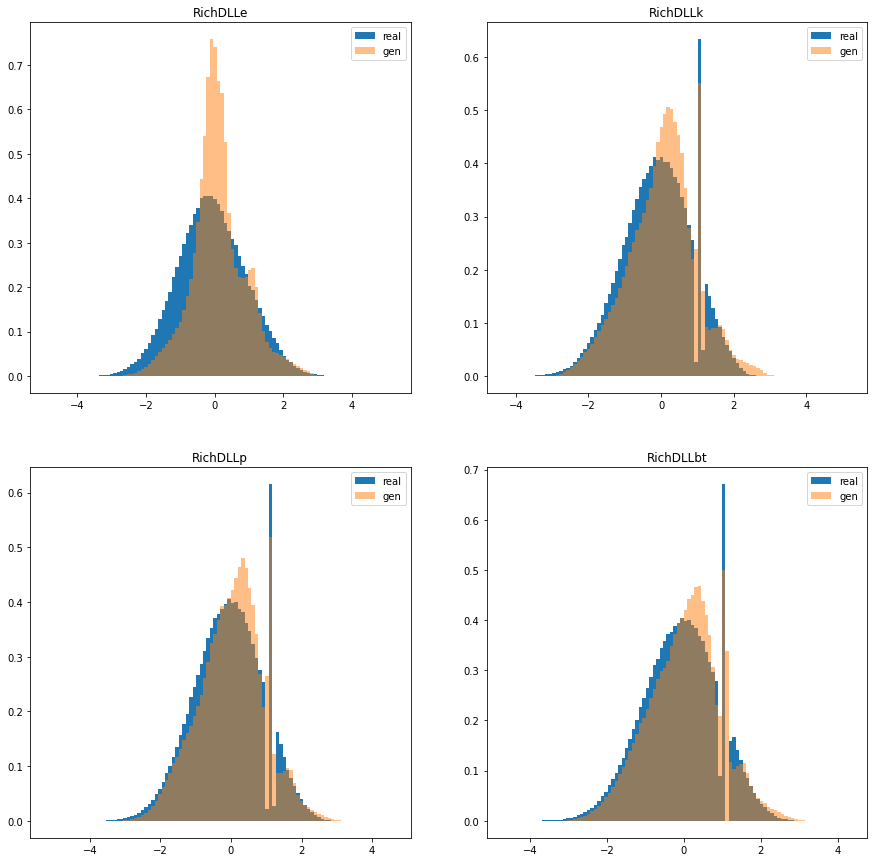

  0%|          | 1/489 [00:00<01:21,  5.98it/s]

(epoch 75)


100%|██████████| 123/123 [00:11<00:00, 10.78it/s]


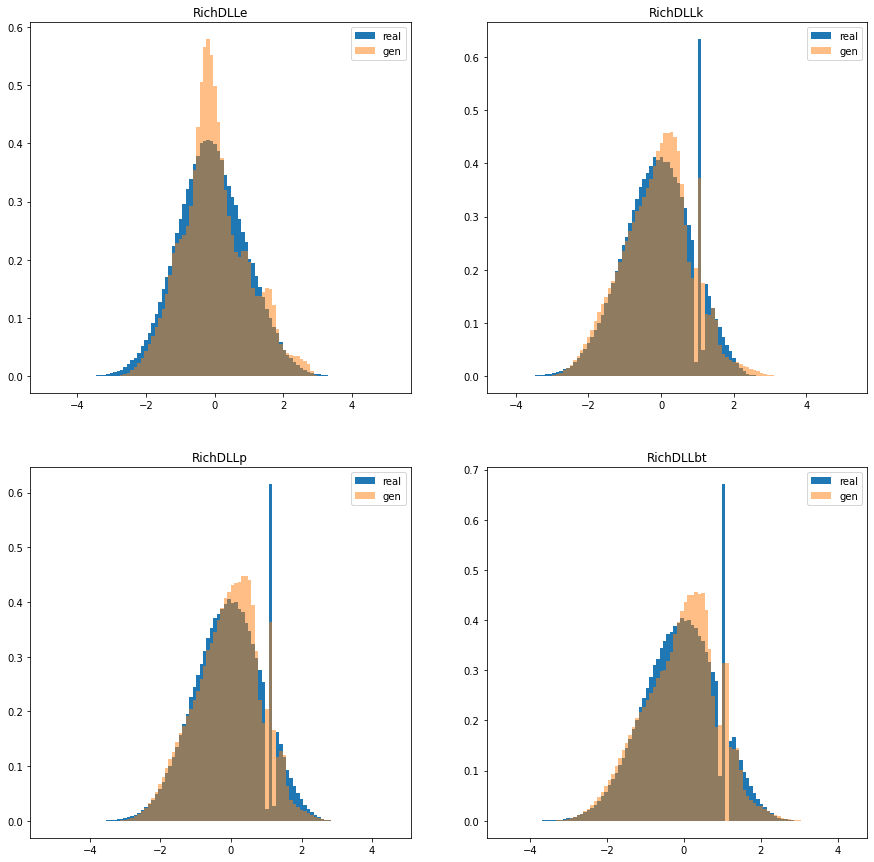

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 76)


100%|██████████| 123/123 [00:11<00:00, 10.68it/s]


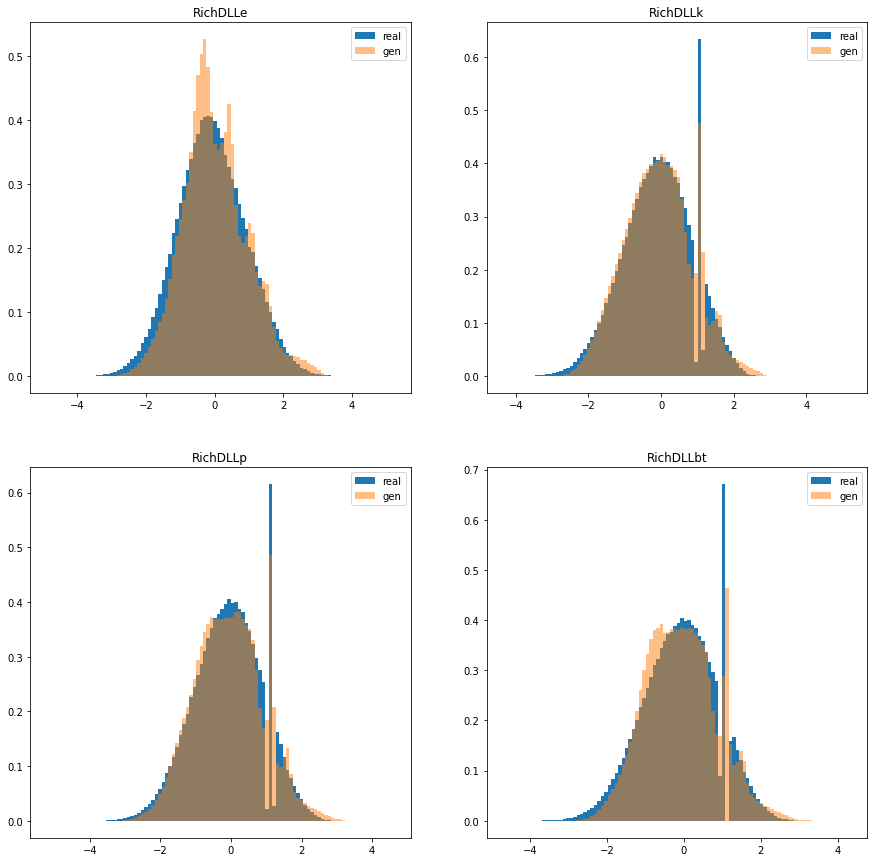

  0%|          | 1/489 [00:00<01:20,  6.08it/s]

(epoch 77)


100%|██████████| 123/123 [00:11<00:00, 10.87it/s]


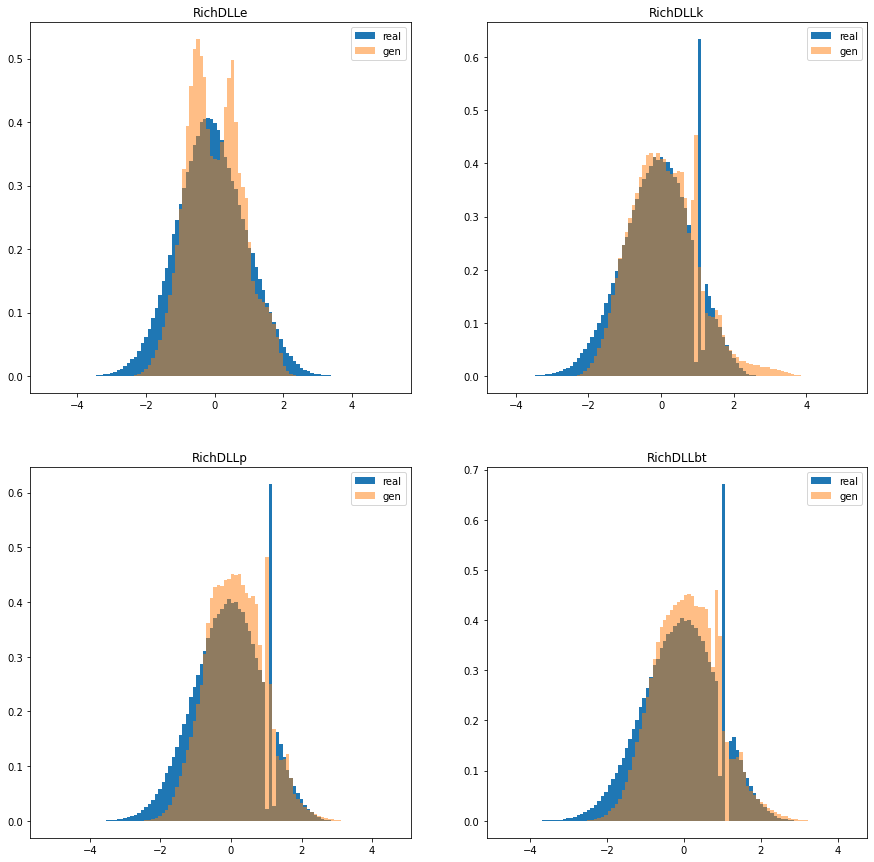

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 78)


100%|██████████| 123/123 [00:11<00:00, 10.87it/s]


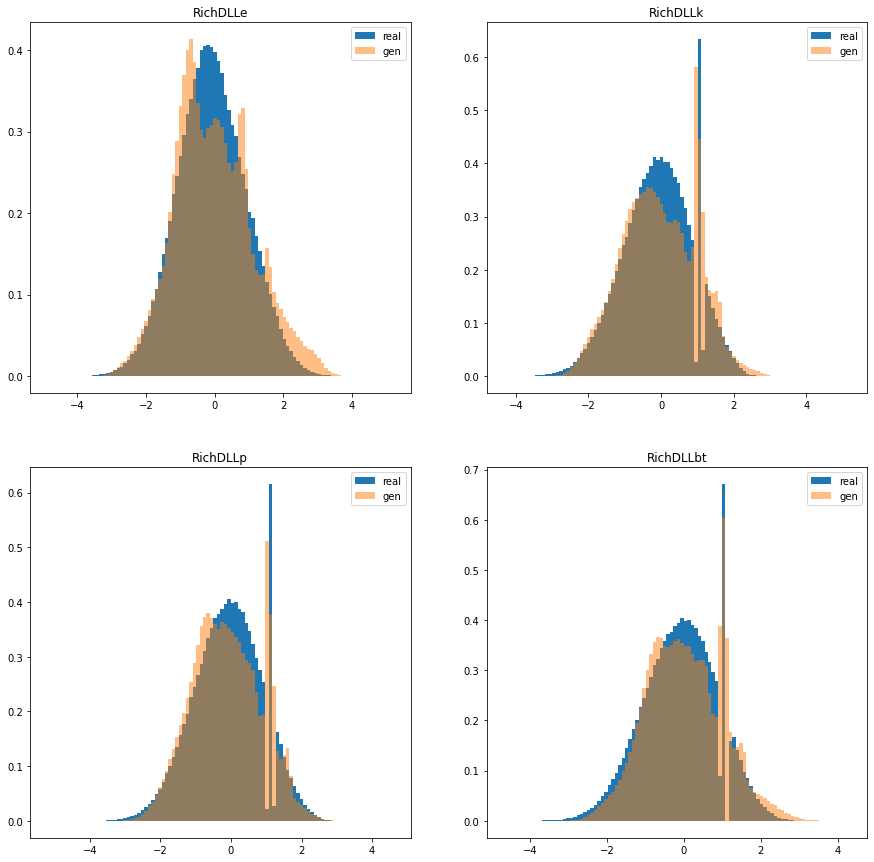

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 79)


100%|██████████| 123/123 [00:11<00:00, 10.63it/s]


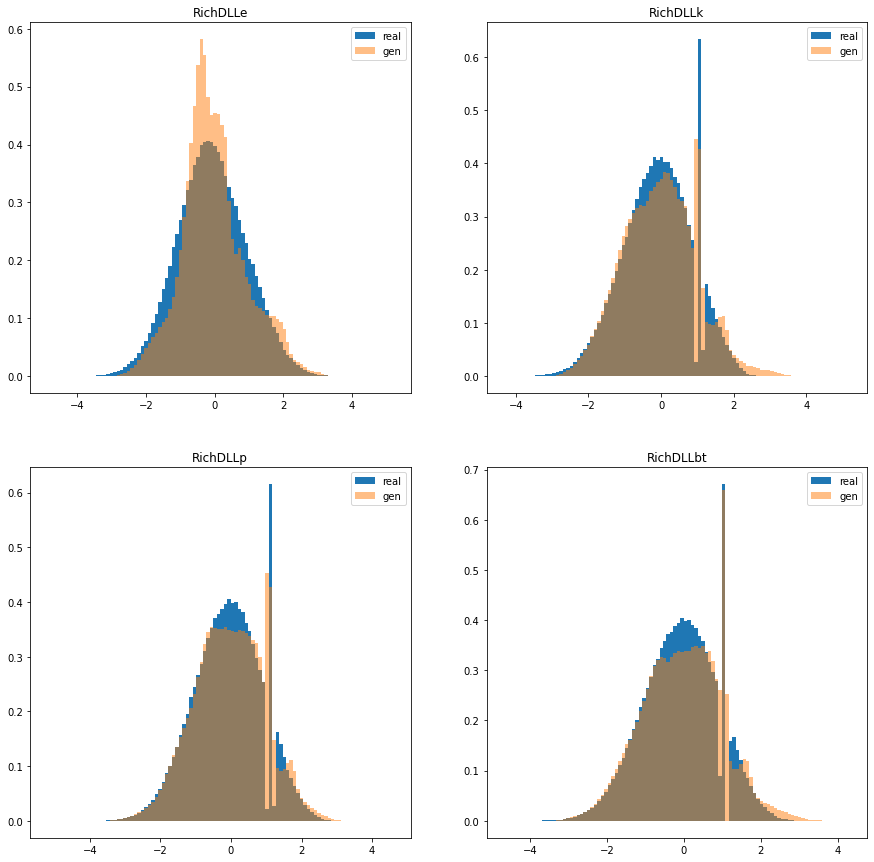

  0%|          | 1/489 [00:00<01:31,  5.31it/s]

(epoch 80)


100%|██████████| 123/123 [00:11<00:00, 10.73it/s]


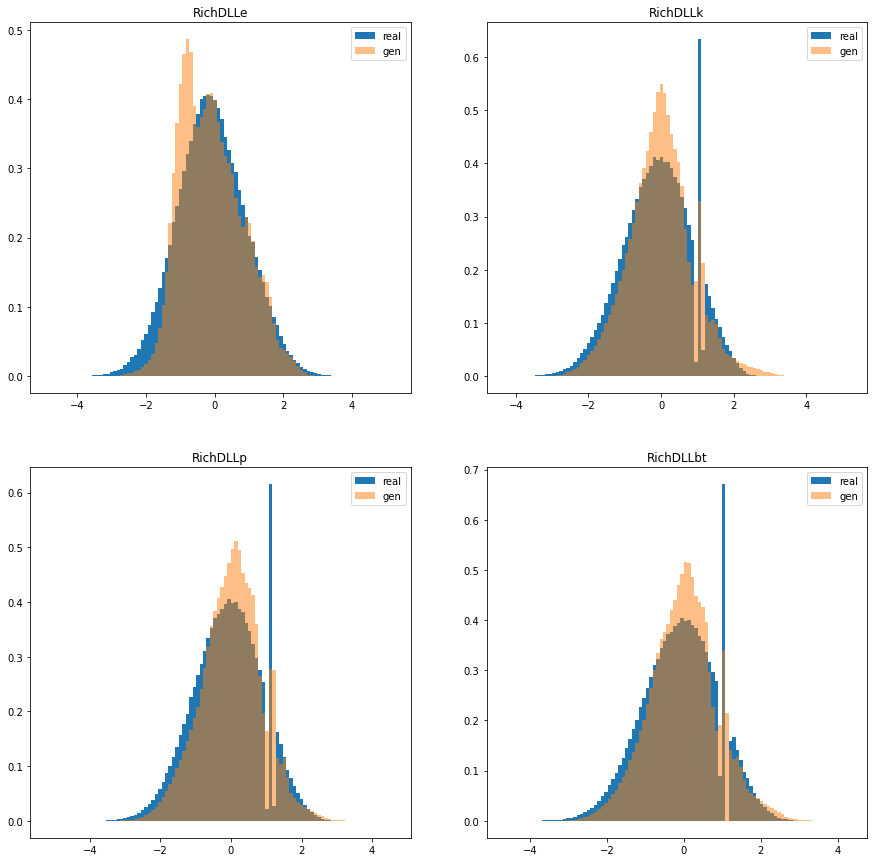

  0%|          | 1/489 [00:00<01:20,  6.08it/s]

(epoch 81)


100%|██████████| 123/123 [00:11<00:00, 10.71it/s]


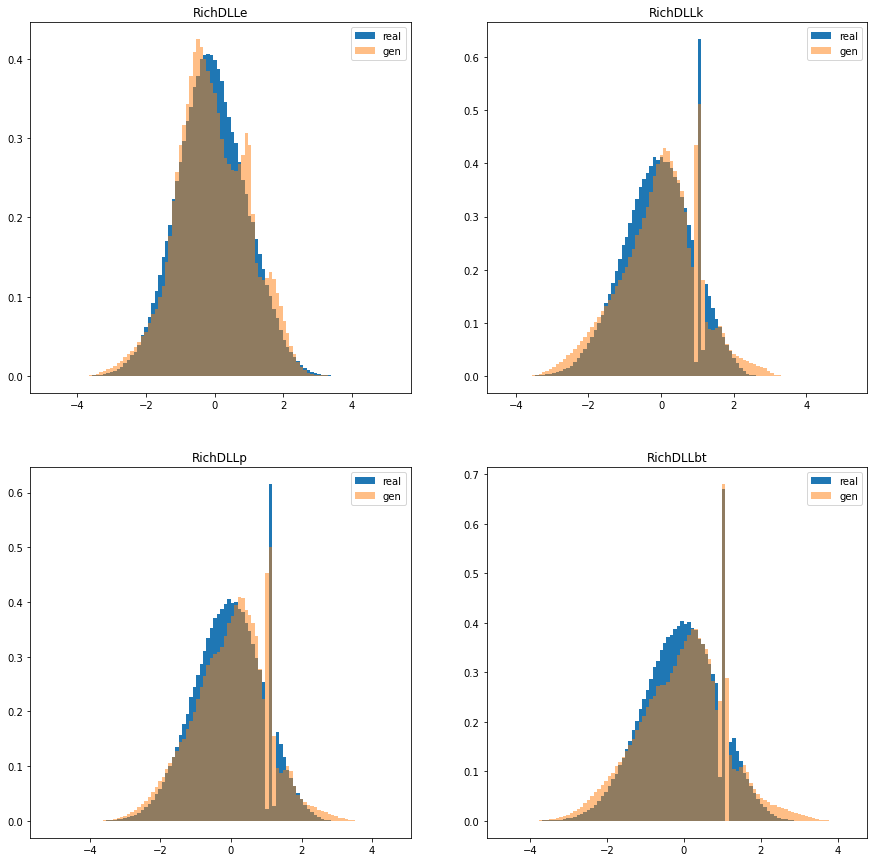

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 82)


100%|██████████| 123/123 [00:11<00:00, 10.86it/s]


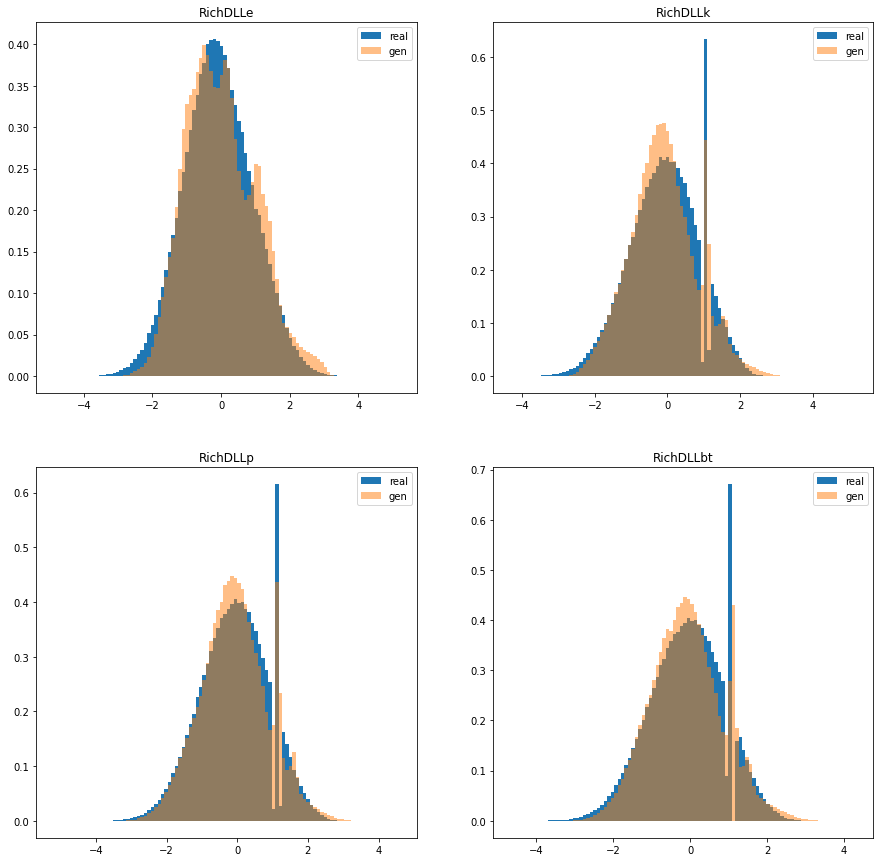

  0%|          | 1/489 [00:00<01:18,  6.18it/s]

(epoch 83)


100%|██████████| 123/123 [00:11<00:00, 10.71it/s]


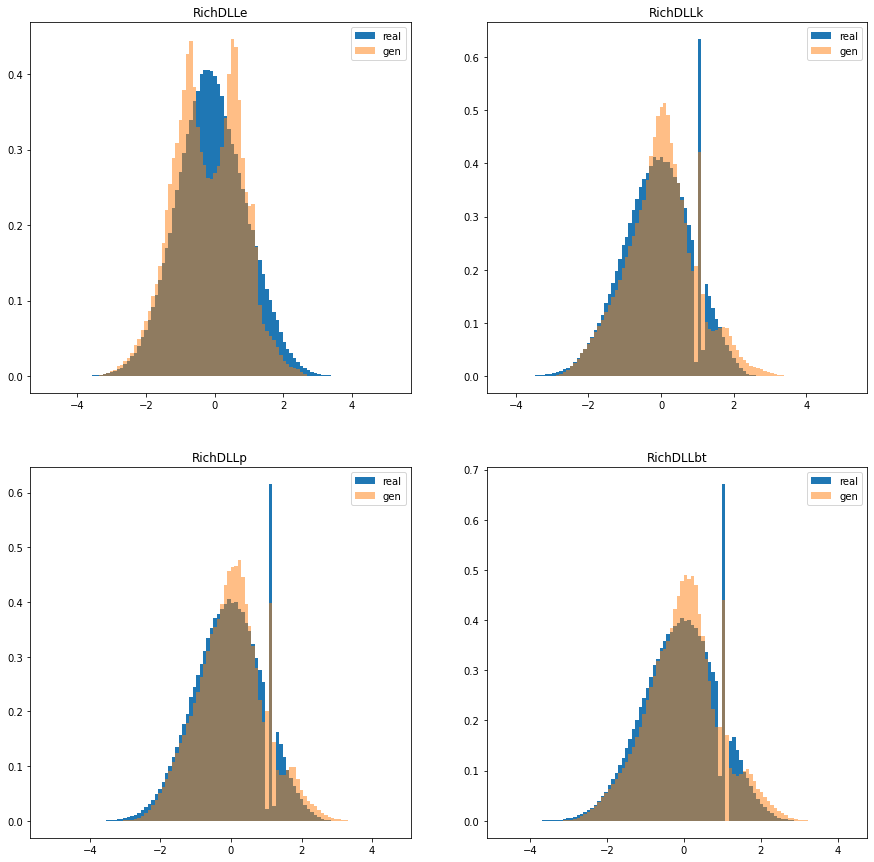

  0%|          | 1/489 [00:00<01:21,  6.00it/s]

(epoch 84)


100%|██████████| 123/123 [00:11<00:00, 10.61it/s]


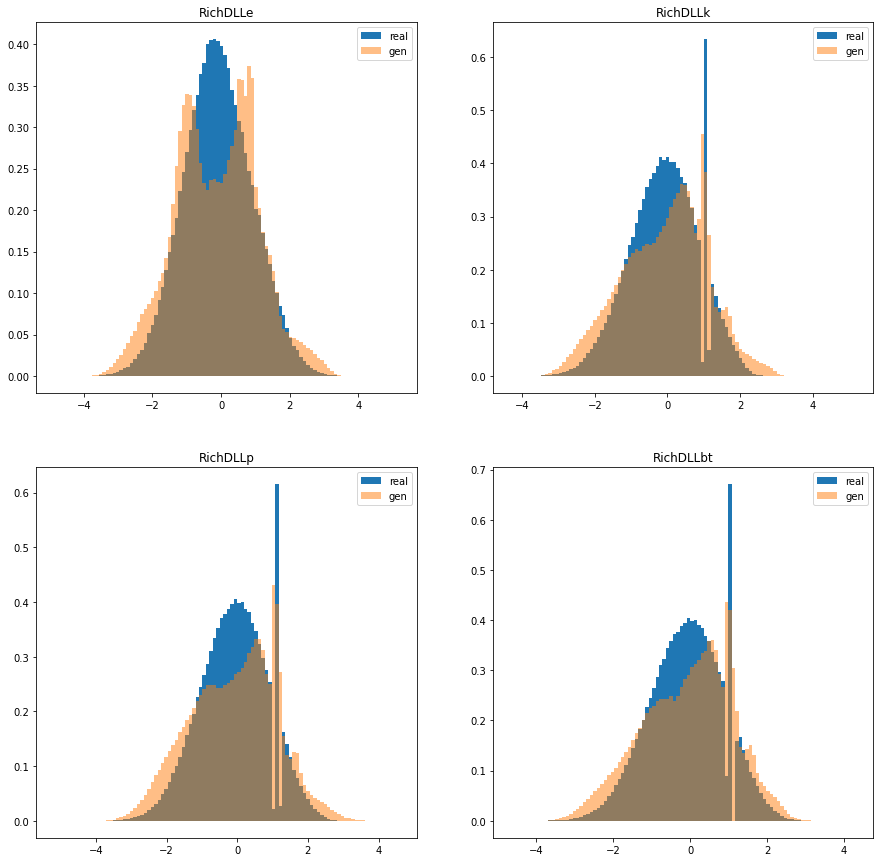

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 85)


100%|██████████| 123/123 [00:11<00:00, 10.47it/s]


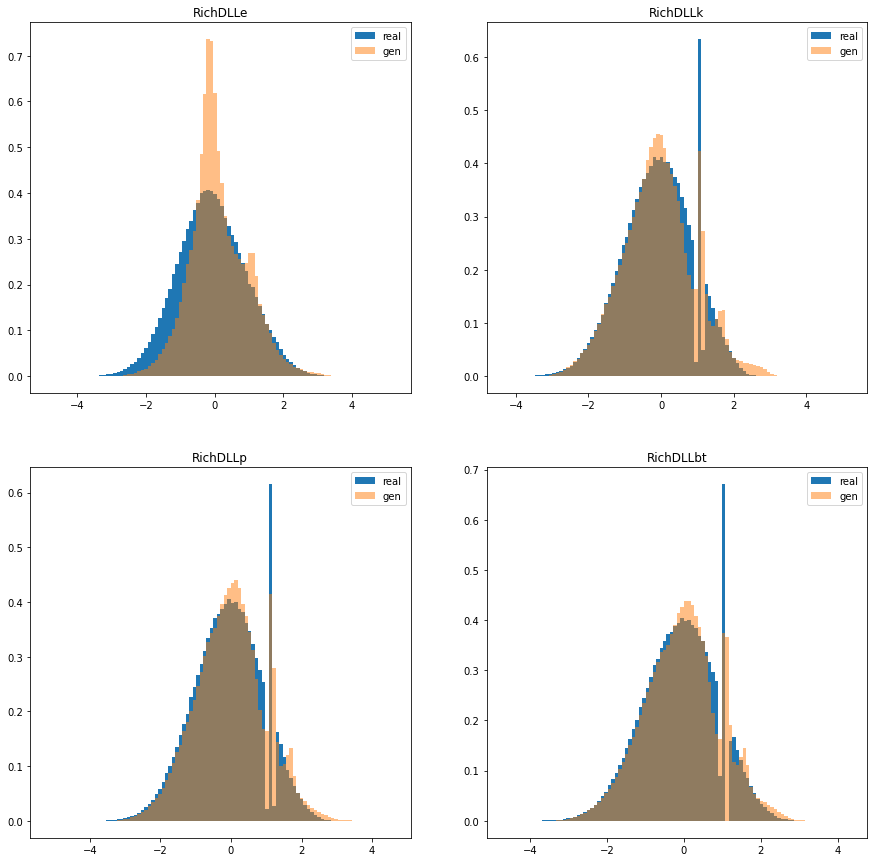

  0%|          | 1/489 [00:00<01:22,  5.92it/s]

(epoch 86)


100%|██████████| 123/123 [00:11<00:00, 10.77it/s]


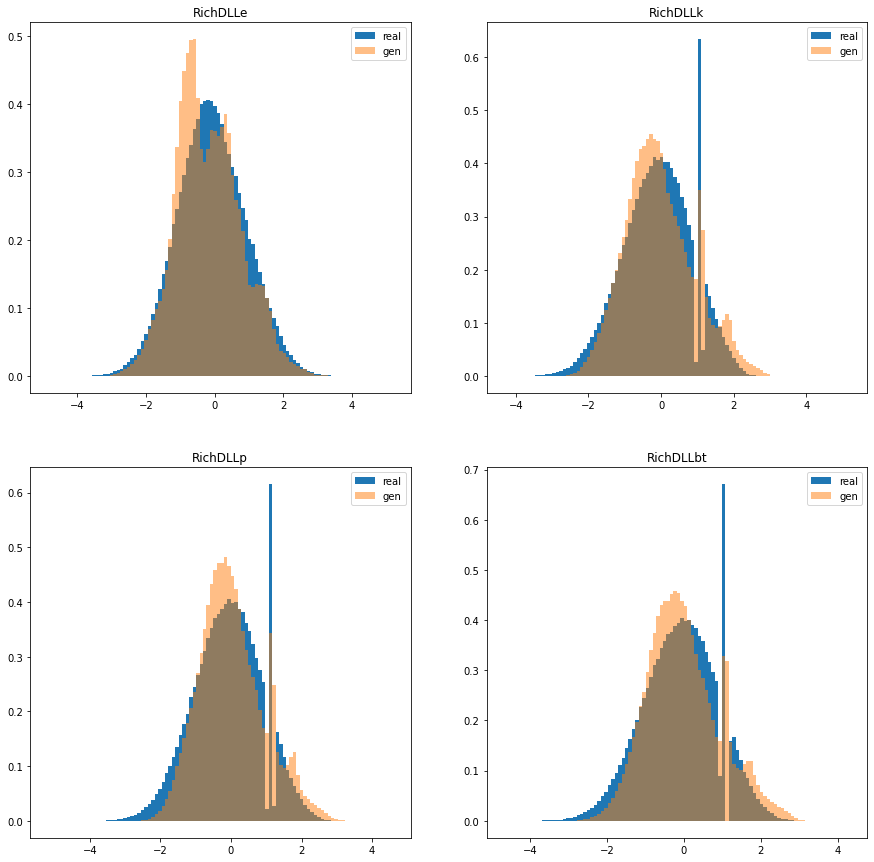

  0%|          | 1/489 [00:00<01:33,  5.22it/s]

(epoch 87)


100%|██████████| 123/123 [00:12<00:00,  9.84it/s]


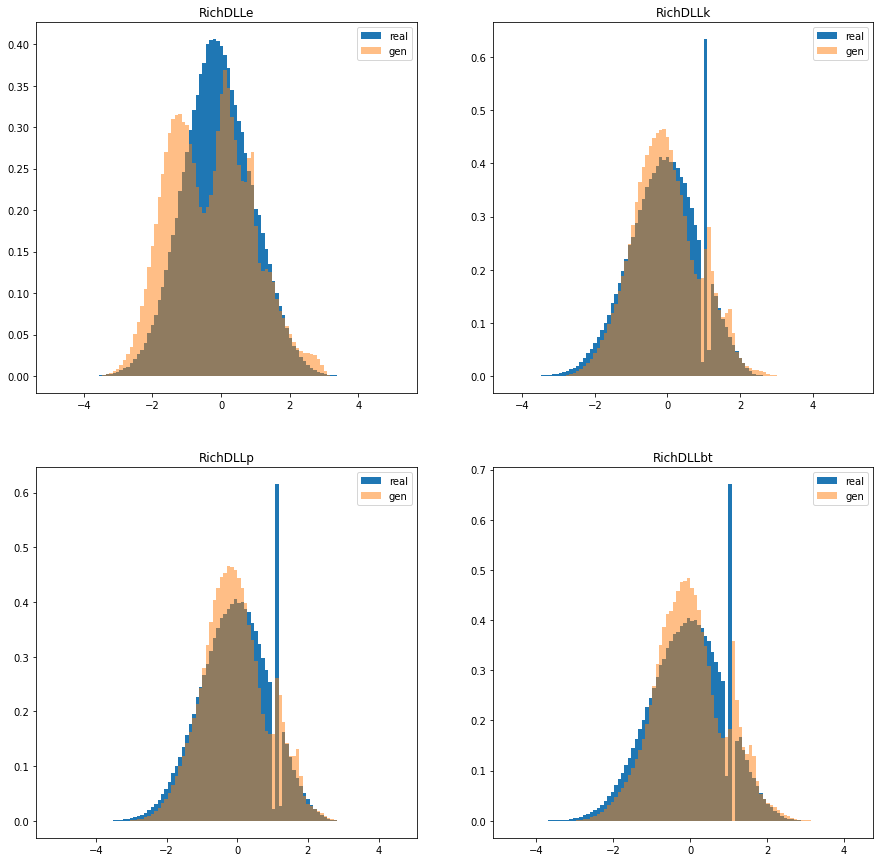

  0%|          | 0/489 [00:00<?, ?it/s]

(epoch 88)


 78%|███████▊  | 383/489 [01:08<00:19,  5.53it/s]

In [ ]:
teacher_trainer.train()

In [ ]:
torch.save(teacher_trainer.generator, "gen_100e.pt")
torch.save(teacher_trainer.critic, "cri_100e.pt")

In [9]:
# STUDENT

In [18]:
from data import *

train_dataset = RichStudentDataset(data_train.values)
val_dataset = RichStudentDataset(data_val.values)

In [19]:
from torch.utils.data import DataLoader

noise_size = 64

coll = collate_fn_rich_student(noise_size)

train_loader = DataLoader(train_dataset, batch_size=4096, collate_fn=coll)
val_loader = DataLoader(val_dataset, batch_size=1, collate_fn=coll)

In [20]:
from student_trainer import *

student_trainer = StudentTrainer(
    train_loader
    , val_loader
    , noise_size=noise_size
    , student_hidden_size=128
    , student_num_layers=5
    , epochs=20
    , lr=1e-3
    , teacher_generator = torch.load("gen_50e.pt")
)

  0%|          | 2/489 [00:00<00:29, 16.29it/s]

(epoch 1)


100%|██████████| 489/489 [00:31<00:00, 15.40it/s]


avg loss: 0.17033906280994415


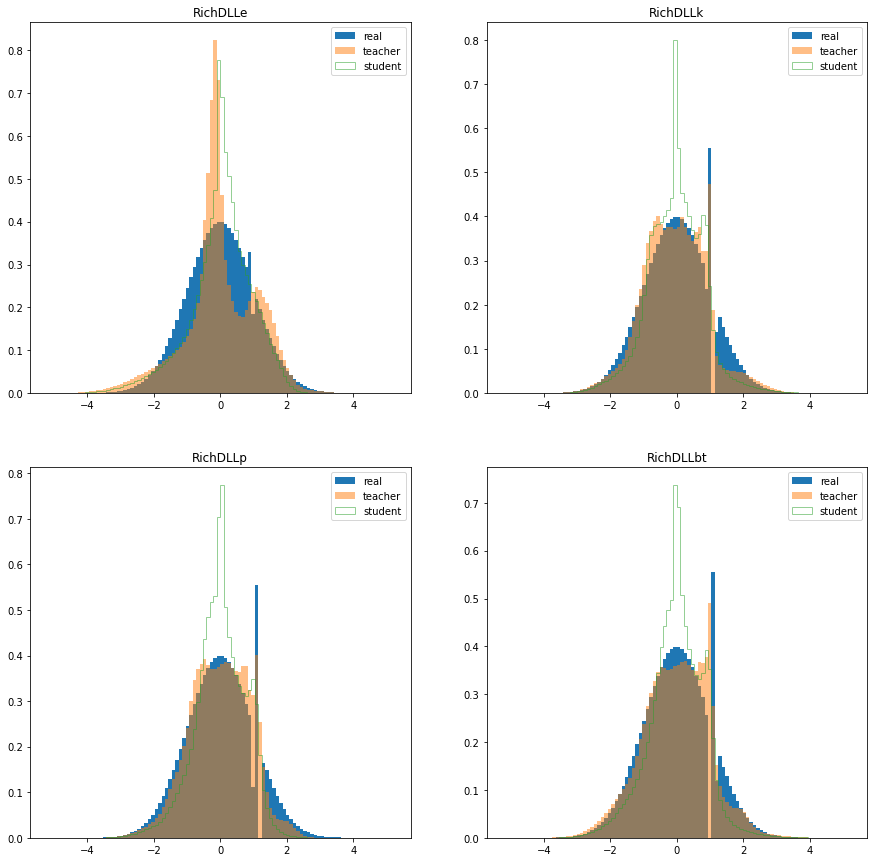

  0%|          | 2/489 [00:00<00:32, 14.90it/s]

(epoch 2)


100%|██████████| 489/489 [00:32<00:00, 15.14it/s]


avg loss: 0.04545581340789795


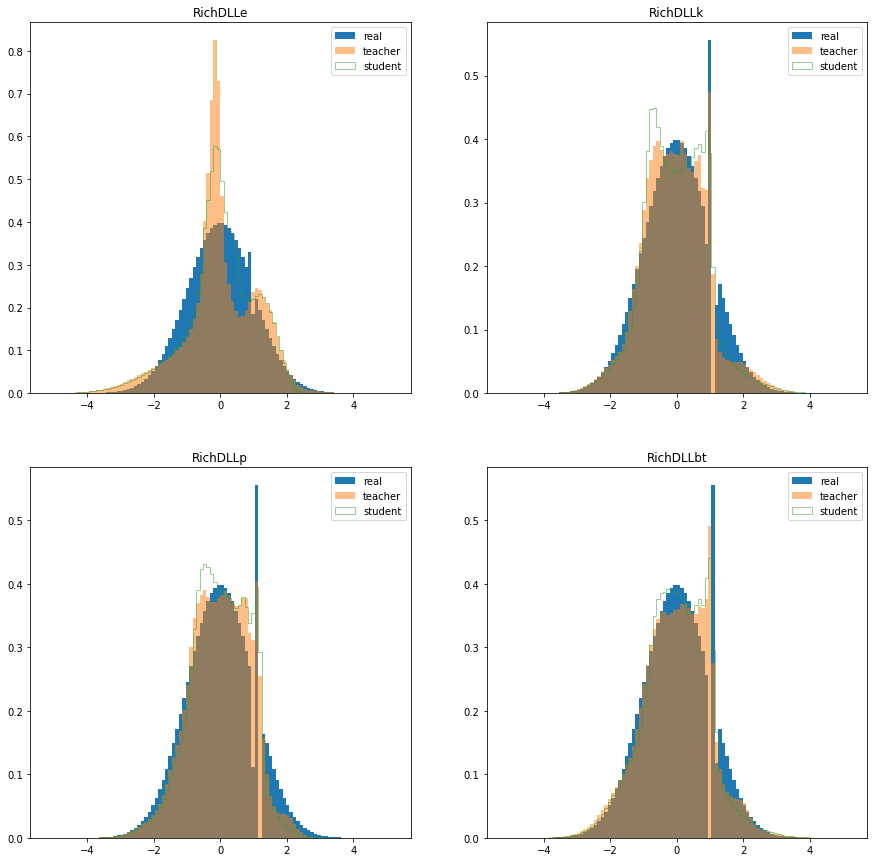

  0%|          | 2/489 [00:00<00:34, 14.27it/s]

(epoch 3)


100%|██████████| 489/489 [00:32<00:00, 15.02it/s]


avg loss: 0.033472124487161636


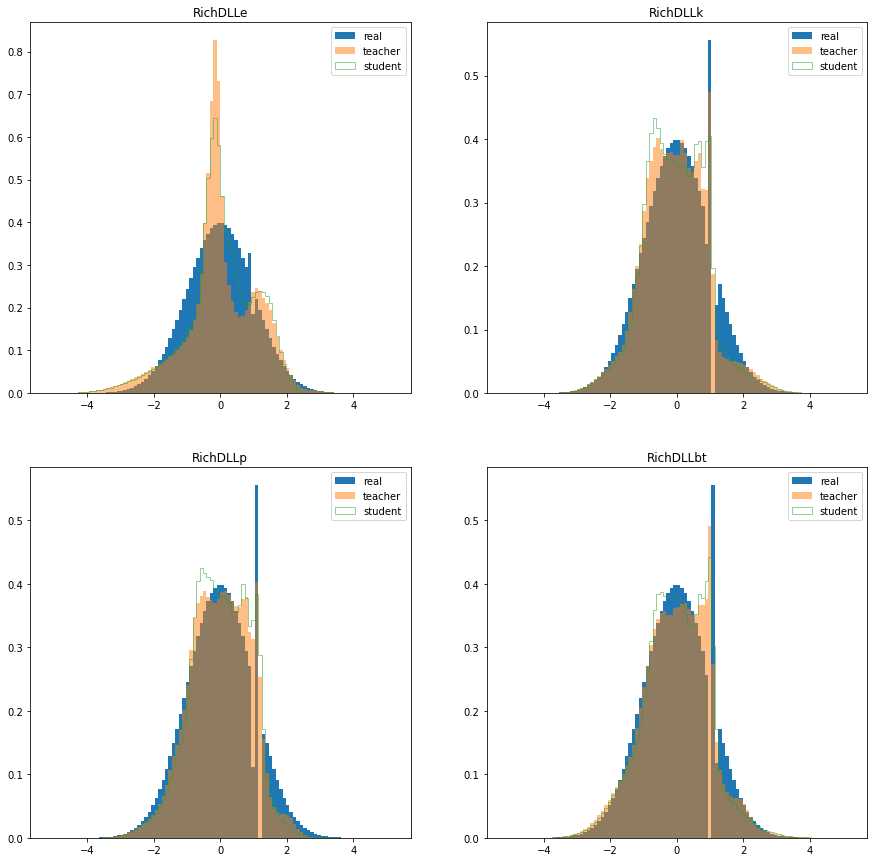

  0%|          | 2/489 [00:00<00:30, 15.90it/s]

(epoch 4)


100%|██████████| 489/489 [00:32<00:00, 15.06it/s]


avg loss: 0.028271853923797607


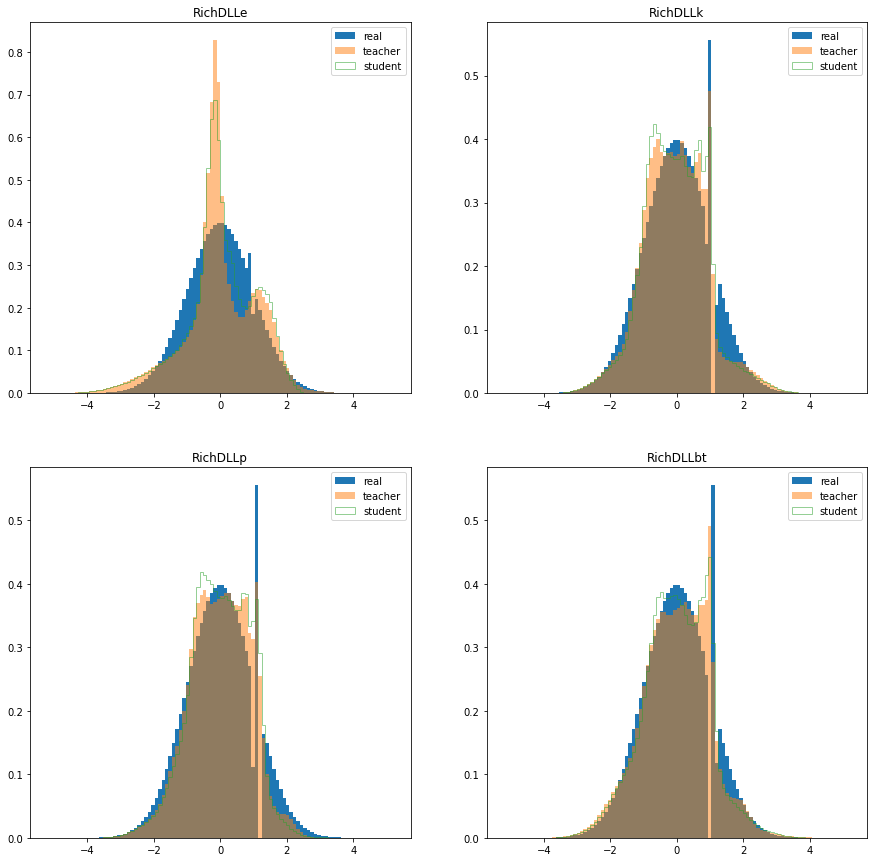

  0%|          | 2/489 [00:00<00:32, 14.88it/s]

(epoch 5)


100%|██████████| 489/489 [00:32<00:00, 15.16it/s]


avg loss: 0.02508152835071087


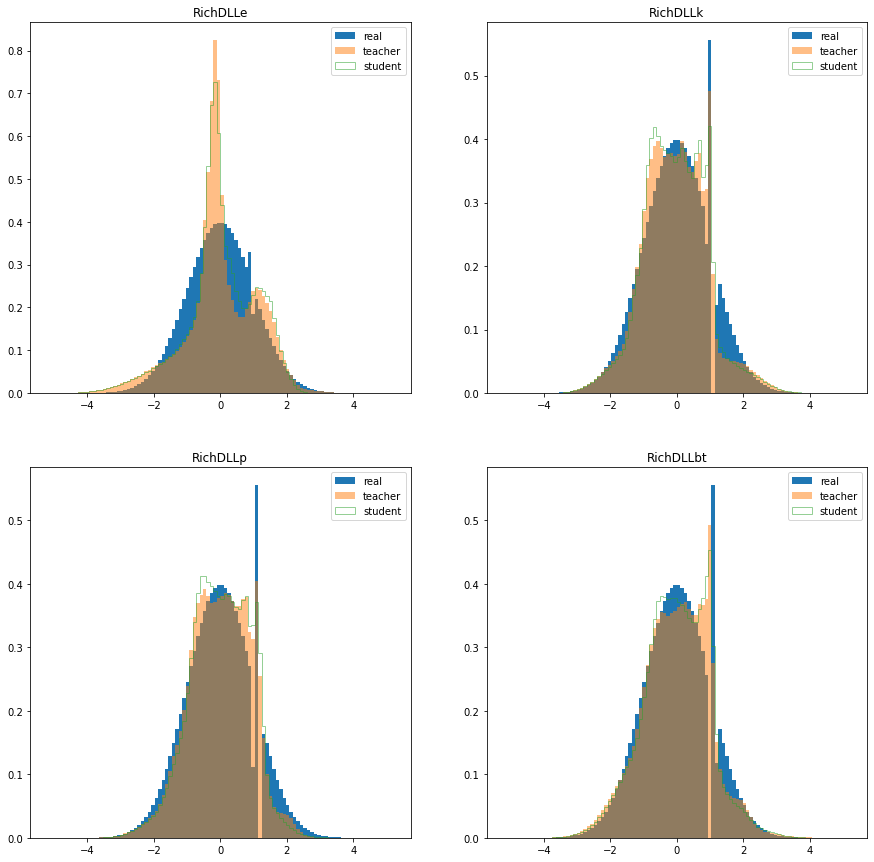

  0%|          | 2/489 [00:00<00:32, 15.20it/s]

(epoch 6)


100%|██████████| 489/489 [00:32<00:00, 15.24it/s]


avg loss: 0.02293650060892105


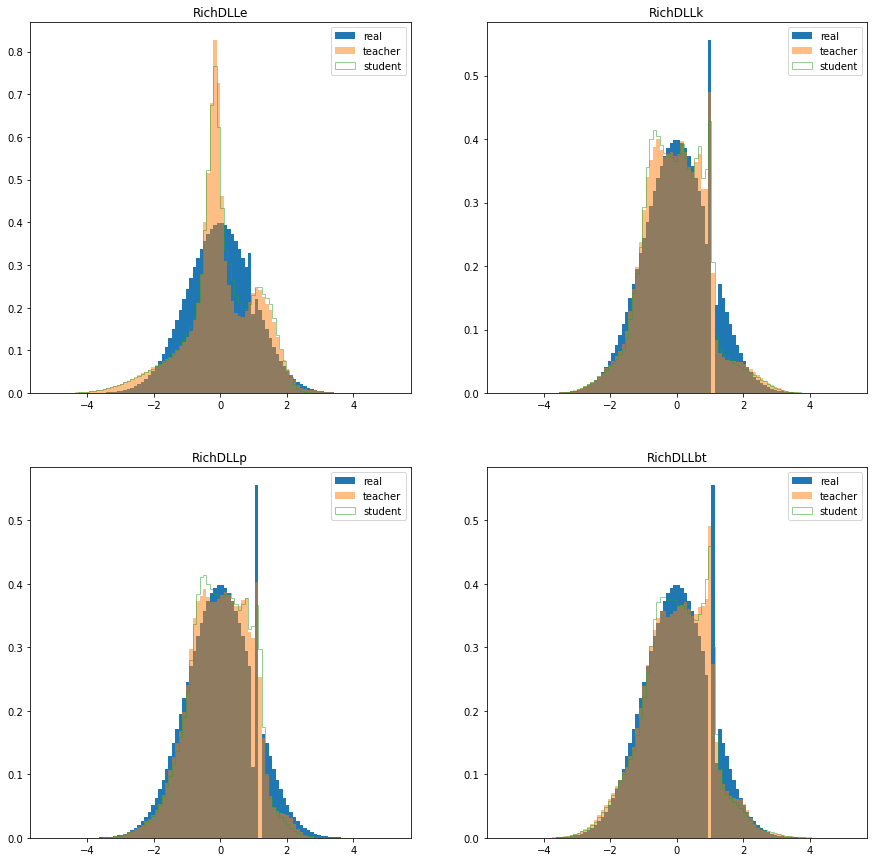

  0%|          | 2/489 [00:00<00:33, 14.41it/s]

(epoch 7)


100%|██████████| 489/489 [00:32<00:00, 14.92it/s]


avg loss: 0.021334411576390266


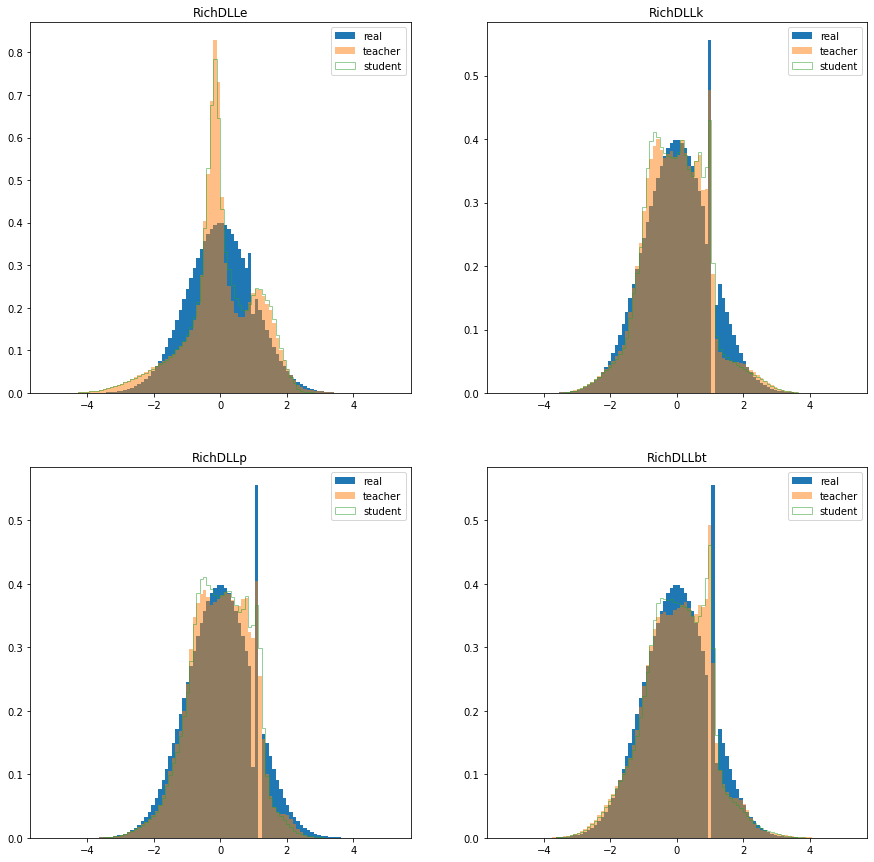

  0%|          | 2/489 [00:00<00:33, 14.44it/s]

(epoch 8)


100%|██████████| 489/489 [00:32<00:00, 15.17it/s]


avg loss: 0.020173877477645874


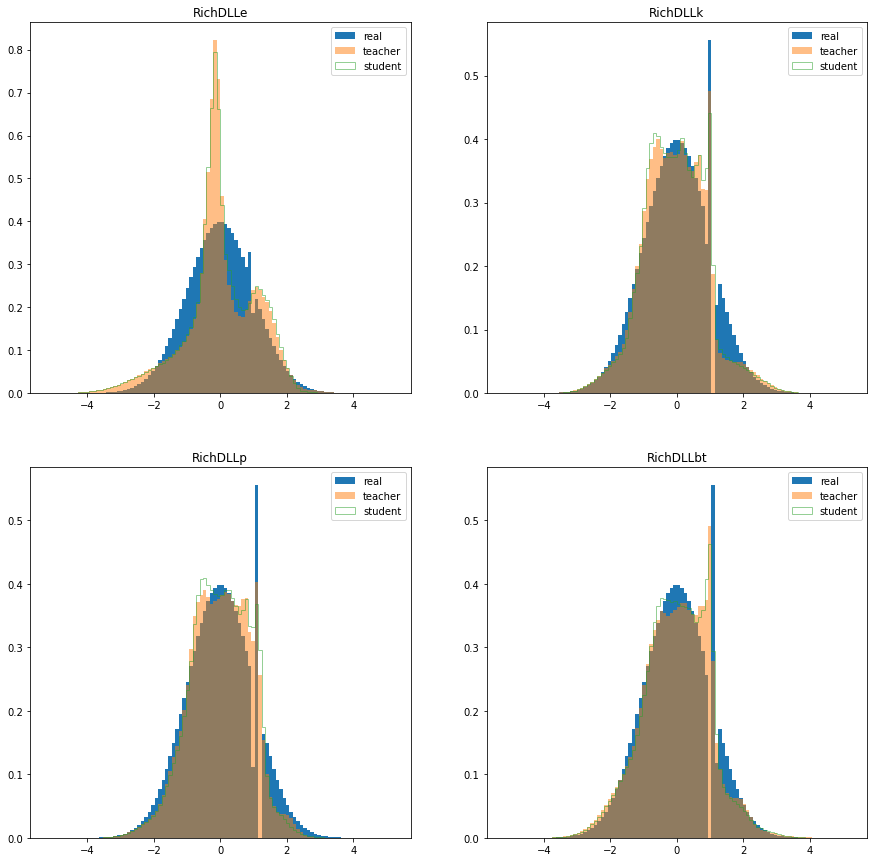

  0%|          | 2/489 [00:00<00:32, 15.16it/s]

(epoch 9)


100%|██████████| 489/489 [00:32<00:00, 15.00it/s]


avg loss: 0.019301224499940872


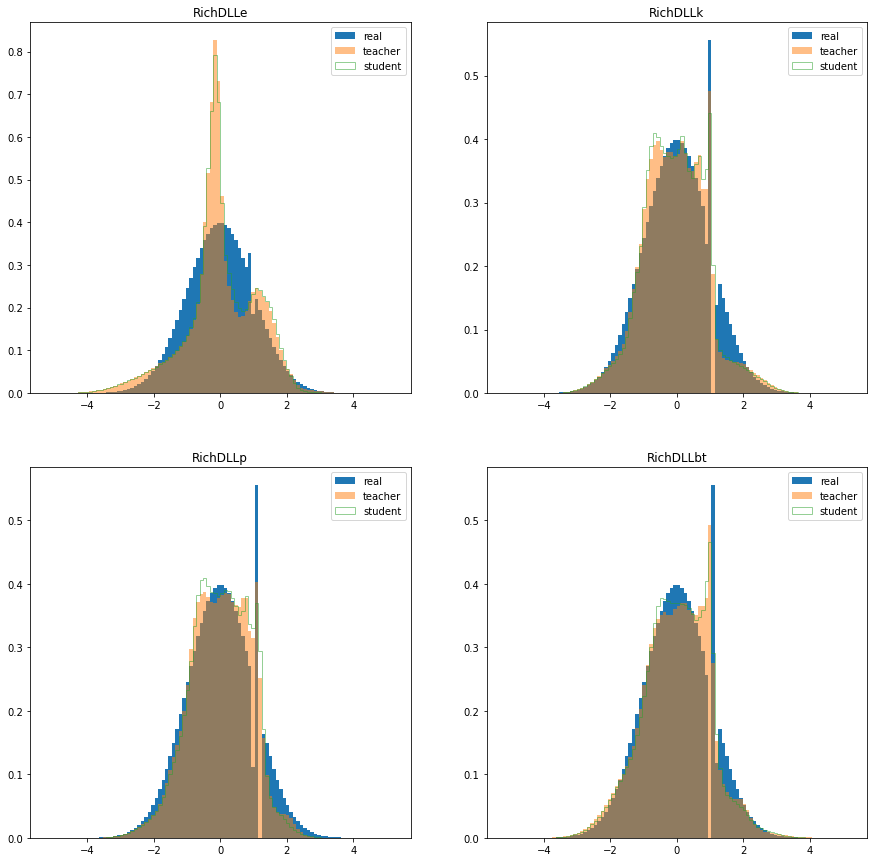

  0%|          | 2/489 [00:00<00:31, 15.28it/s]

(epoch 10)


100%|██████████| 489/489 [00:32<00:00, 15.19it/s]


avg loss: 0.018553992733359337


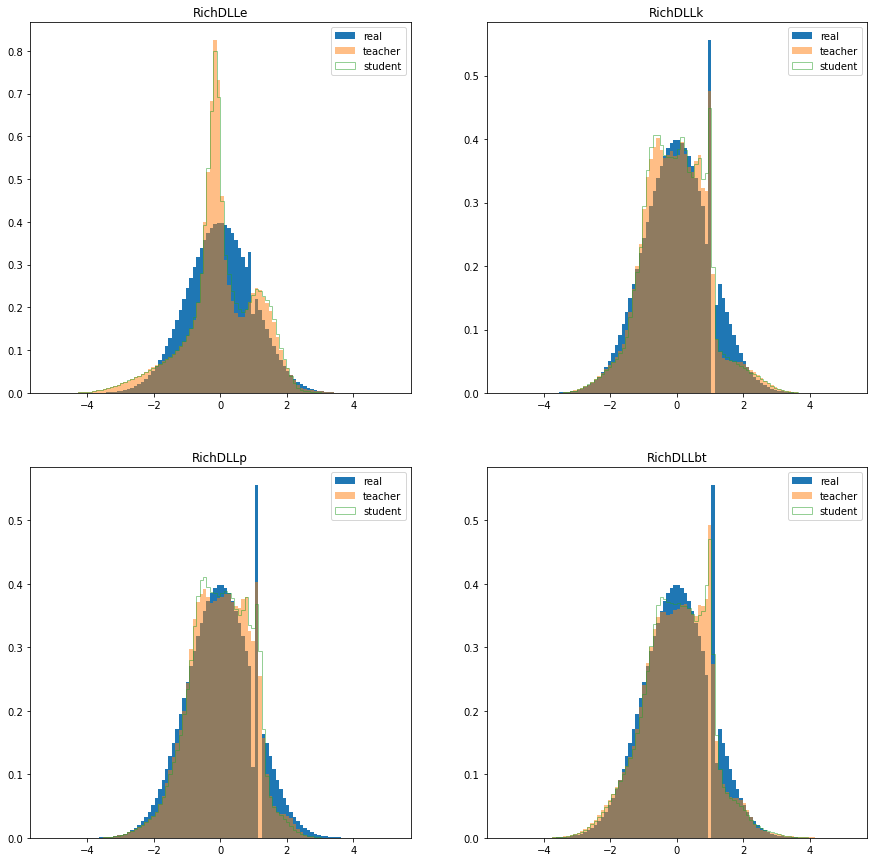

  0%|          | 2/489 [00:00<00:32, 15.12it/s]

(epoch 11)


100%|██████████| 489/489 [00:33<00:00, 14.70it/s]


avg loss: 0.01791892945766449


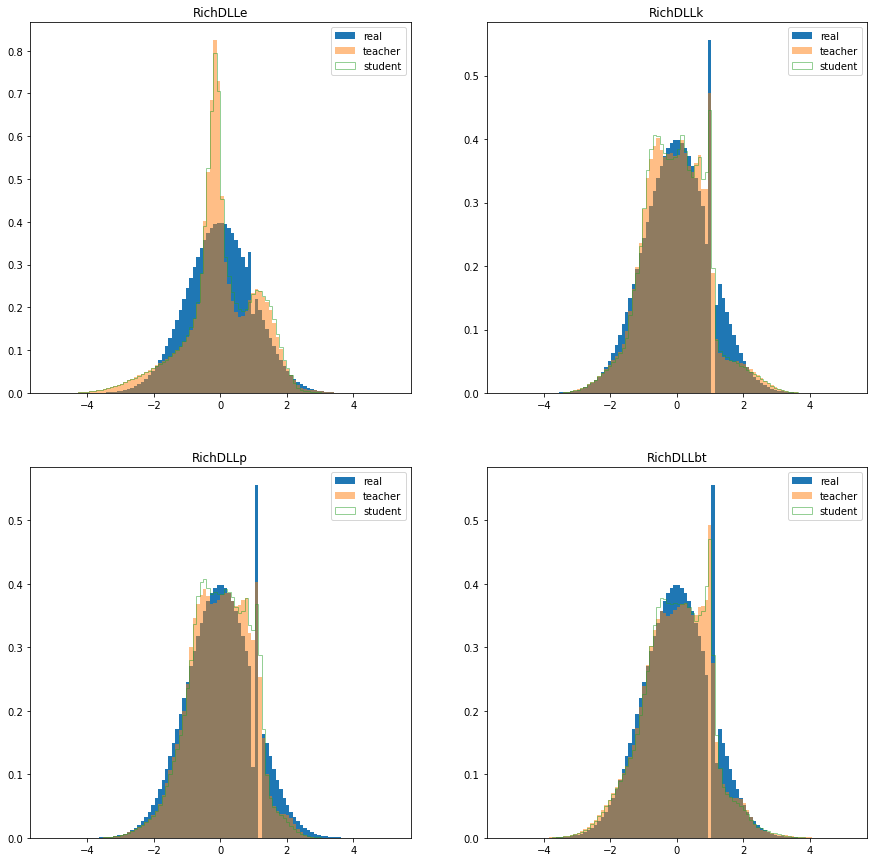

  0%|          | 2/489 [00:00<00:34, 14.25it/s]

(epoch 12)


100%|██████████| 489/489 [00:32<00:00, 15.07it/s]


avg loss: 0.017501680180430412


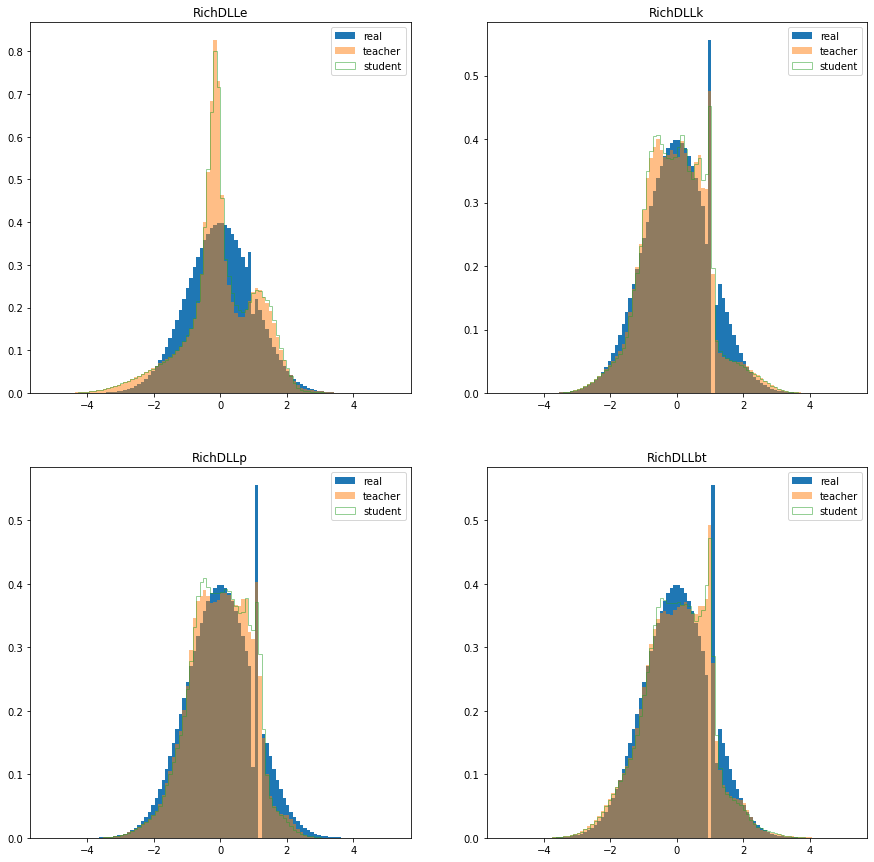

  0%|          | 2/489 [00:00<00:30, 15.99it/s]

(epoch 13)


100%|██████████| 489/489 [00:32<00:00, 14.87it/s]


avg loss: 0.01703878678381443


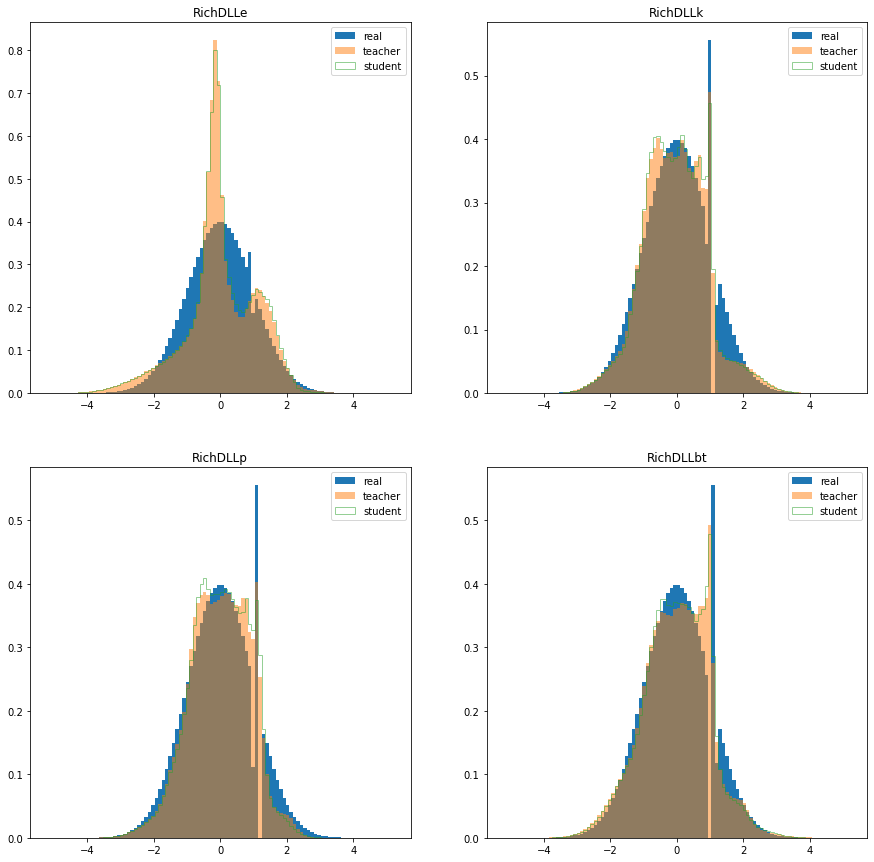

  0%|          | 2/489 [00:00<00:31, 15.66it/s]

(epoch 14)


100%|██████████| 489/489 [00:32<00:00, 15.21it/s]


avg loss: 0.016597198322415352


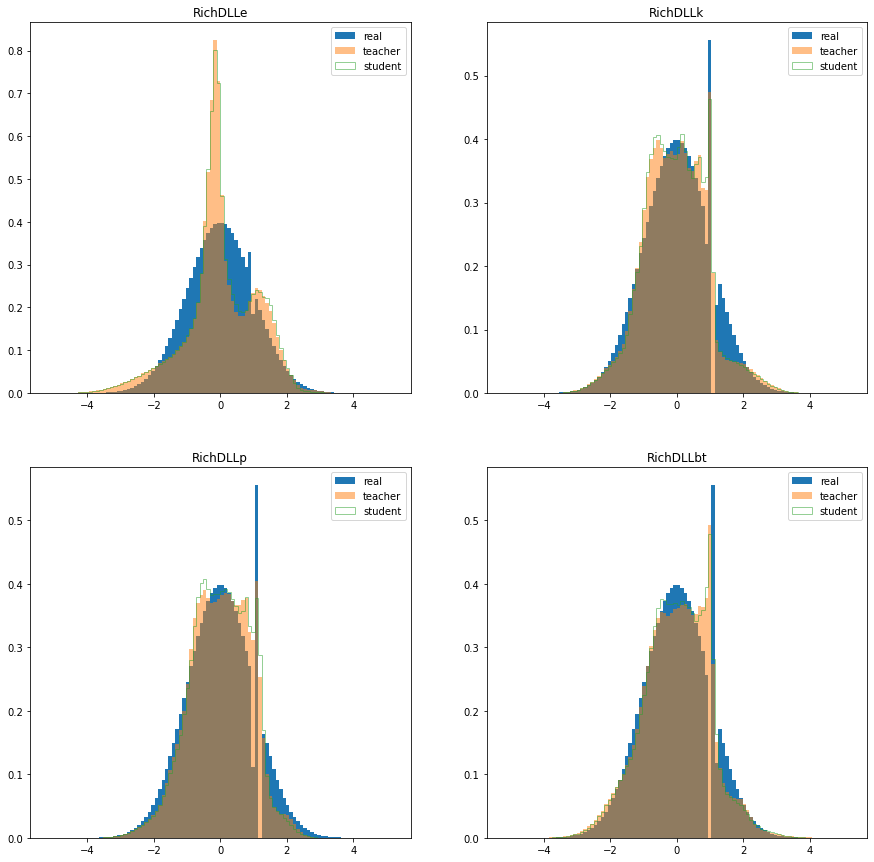

  0%|          | 2/489 [00:00<00:35, 13.85it/s]

(epoch 15)


100%|██████████| 489/489 [00:32<00:00, 15.22it/s]


avg loss: 0.016255060210824013


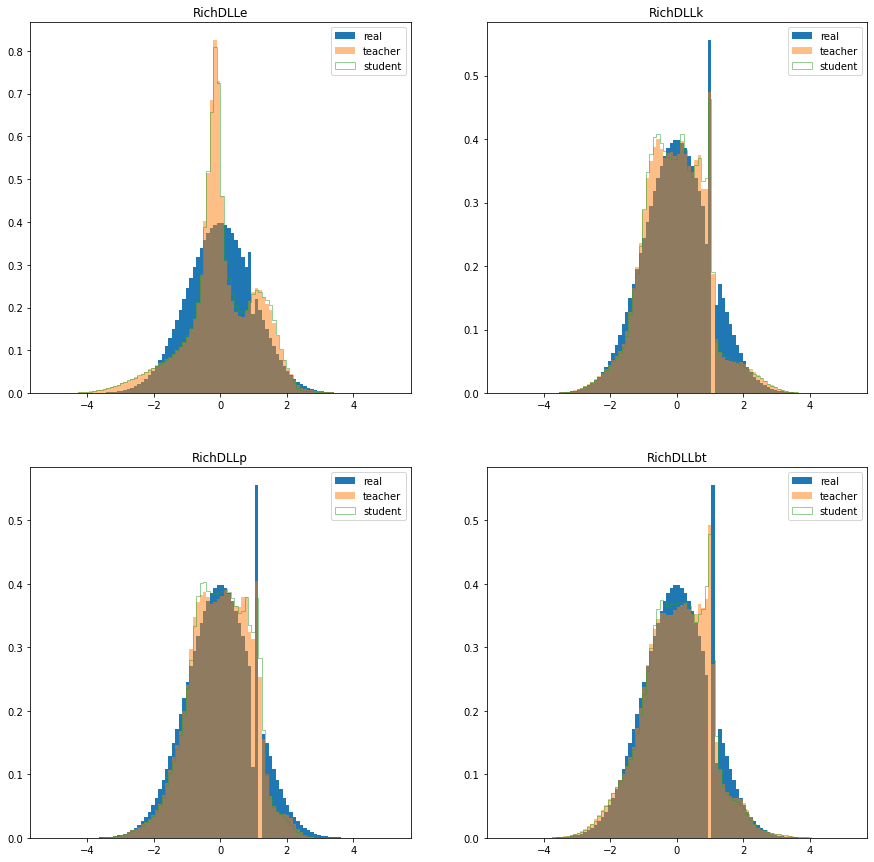

  0%|          | 2/489 [00:00<00:32, 15.22it/s]

(epoch 16)


100%|██████████| 489/489 [00:32<00:00, 15.12it/s]


avg loss: 0.015917280688881874


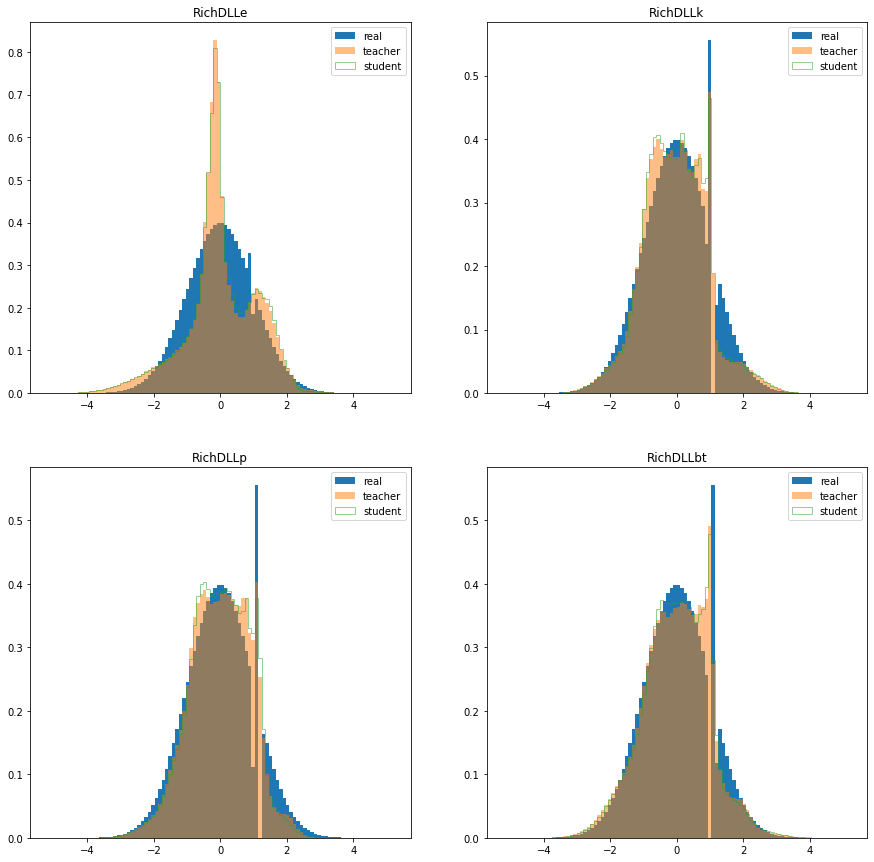

  0%|          | 2/489 [00:00<00:32, 15.13it/s]

(epoch 17)


100%|██████████| 489/489 [00:31<00:00, 15.38it/s]


avg loss: 0.015710238367319107


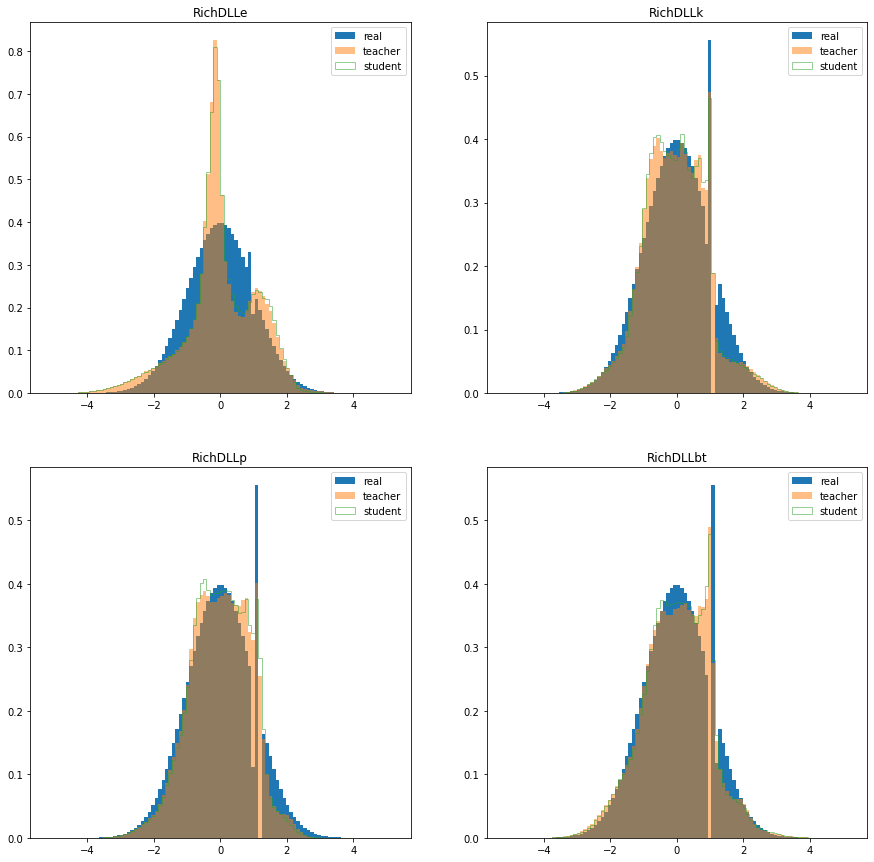

  0%|          | 2/489 [00:00<00:36, 13.27it/s]

(epoch 18)


100%|██████████| 489/489 [00:32<00:00, 15.22it/s]


avg loss: 0.015357443131506443


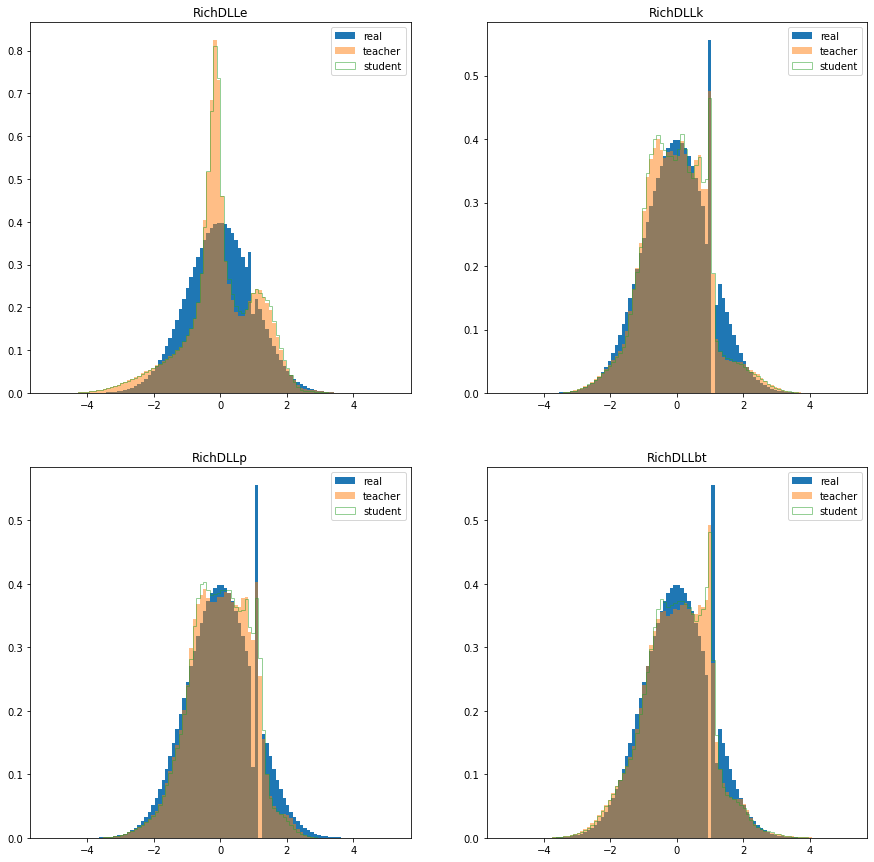

  0%|          | 2/489 [00:00<00:31, 15.25it/s]

(epoch 19)


100%|██████████| 489/489 [00:32<00:00, 15.06it/s]


avg loss: 0.015127277001738548


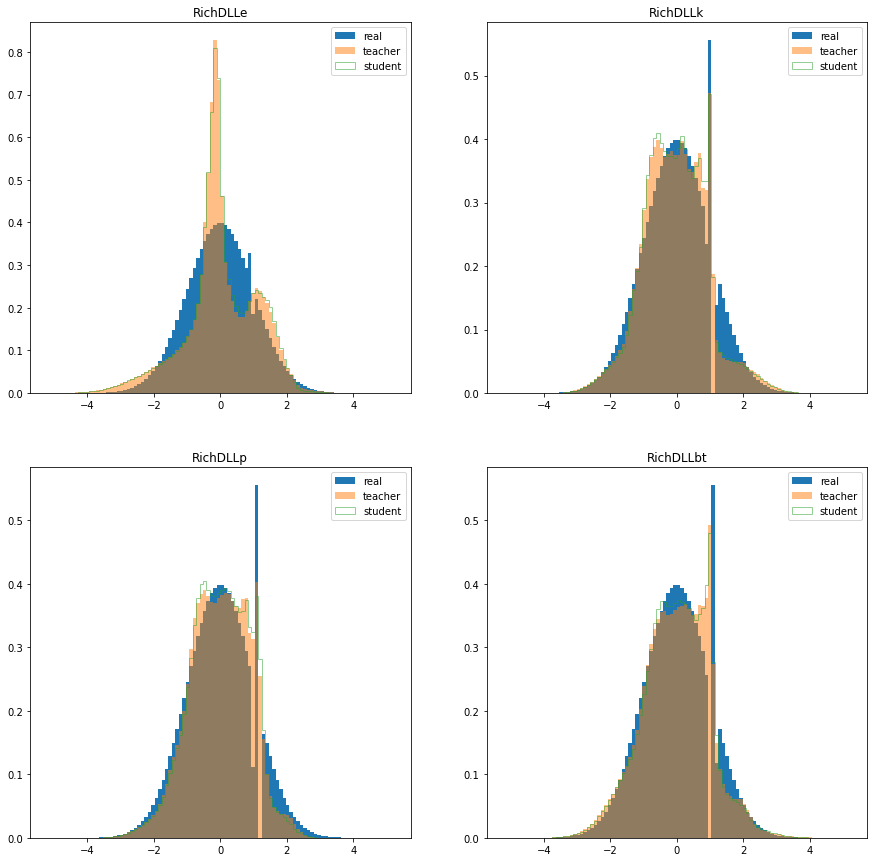

  0%|          | 2/489 [00:00<00:31, 15.69it/s]

(epoch 20)


100%|██████████| 489/489 [00:32<00:00, 15.15it/s]


avg loss: 0.014924055896699429


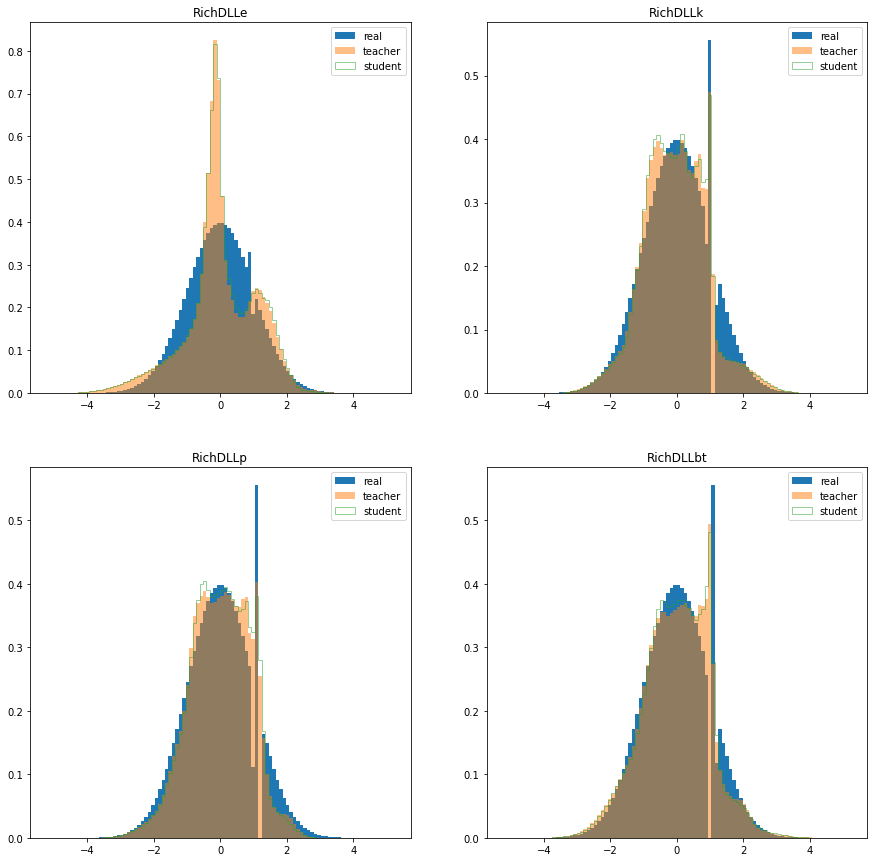

In [21]:
student_trainer.train()

In [22]:
torch.save(trainer.student_generator, "student_gen_20e.pt")

NameError: name 'trainer' is not defined